# Supply Chain Shipment Price Data Analysis


In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import os
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format


import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
%matplotlib inline 
import matplotlib.pyplot as plt
#import plotly.io as pi
#import plotly.graph_objects as go
import seaborn as sns
#from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
scm_df = pd.read_csv('supply-chain-shipment-pricing-data11.csv',  encoding='latin-1').fillna(0)
scm_df

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
2         69   102-NG-T01  Pre-PQ Process     SCMS-354    ASN-608   
3        262   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   
5        343   116-ZA-T01  Pre-PQ Process   SCMS-16600   ASN-1520   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
7        398   102-GY-T01  Pre-PQ Process   SCMS-18480   ASN-1502   
8        400   117-ET-T01  Pre-PQ Process   SCMS-18430   ASN-1465   
9        422   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
10       423   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
12       465   102-NG-T01  Pre-PQ Process   SCMS-21540   ASN-2011   
13       466   117-ET-T01  Pre-PQ Process   SCMS-21550   ASN-1741   
14       531   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2783   
15       532   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
16       533   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
17       598   116-ZA-T01  Pre-PQ Process   SCMS-25540   ASN-2295   
18       646   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
20       772   131-NG-T01  Pre-PQ Process   SCMS-30502   ASN-3653   
21       835   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
22       836   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3892   
23       837   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
24       838   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
25       839   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
27      1063   116-ZA-T01  Pre-PQ Process   SCMS-40810   ASN-3634   
28      1065   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
29      1066   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
...      ...          ...             ...          ...        ...   
10294  84539   151-NG-T30        FPQ-4537     SO-35041    DN-1701   
10295  84705   101-CD-T30        FPQ-8840     SO-41384    DN-2525   
10296  84707   101-CD-T30        FPQ-8840     SO-41386    DN-2527   
10297  84931   151-NG-T30       FPQ-13293     SO-47300    DN-3720   
10298  86236   154-NG-T30        FPQ-3815     SO-32271    DN-1312   
10299  86284   151-NG-T30        FPQ-4537     SO-35120    DN-1741   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10302  10576   104-CI-T01  Pre-PQ Process       SO-781     DN-245   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10304  11077   151-NG-T30  Pre-PQ Process     SO-35150    DN-1594   
10305  11079   151-NG-T30  Pre-PQ Process     SO-35330    DN-1615   
10306  11282   112-NG-T01  Pre-PQ Process     SO-19430    DN-1063   
10307  12543   114-UG-T01  Pre-PQ Process     SO-17911    DN-1094   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  55053   105-GY-T30       FPQ-12057  SCMS-189040  ASN-19842   
10314  55520   117-ET-T30        FPQ-9096  SCMS-133390  ASN-13875   
10315  61882   161-ZA-T30        FPQ-5303   SCMS-68950   ASN-7130   
10316  63296   144-BW-T30        FPQ-4487   SCMS-57521   ASN-8573   
10317  82447   101-CD-T30        FPQ-8840     SO-41382    DN-2530   
10318  82850   110-ZM-T30        FPQ-4029     SO-34620    DN-1566   
10319  84142   101-CD-T30        FPQ-8840     SO-41383    DN-2524   
10320  8

In [3]:
no_of_records = len(scm_df)
print("Total Number of Data Count :", no_of_records)

Total Number of Data Count : 10324


In [4]:
scm_df.shape

(10324, 34)

In [5]:
scm_df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [6]:
scm_df.sample(50)

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
6995   12550   131-NG-T01  Pre-PQ Process     SO-15051    DN-1057   
3590   72821   105-SS-T30       FPQ-15569  SCMS-272170  ASN-31958   
7746   11395   110-ZM-T01  Pre-PQ Process       SO-623     DN-204   
2379   84237   105-GY-T30       FPQ-11546     SO-44530    DN-3059   
764    37087   116-ZA-T30       FPQ-14942  SCMS-259076  ASN-32524   
3125   85119   106-HT-T30        FPQ-5523     SO-36740    DN-1847   
9997   23023   153-NA-T30        FPQ-9698  SCMS-144310  ASN-15069   
9593   86049   104-CI-T30       FPQ-12144     SO-45650    DN-3556   
5177   12632   110-ZM-T01  Pre-PQ Process       SO-309      DN-98   
2460   84780   113-ZW-T30       FPQ-10632     SO-43220    DN-2989   
1225   67634   116-ZA-T30       FPQ-13973  SCMS-238554  ASN-28629   
2098   86662   113-ZW-T30       FPQ-12950     SO-46620    DN-3588   
4804   85310   104-CI-T30        FPQ-9749     SO-42400    DN-2880   
4943   82975   111-MZ-T30        FPQ-7053     SO-38635    DN-2325   
7891   82886   104-CI-T30        FPQ-4378     SO-34413    DN-1836   
5553   85260   151-NG-T30        FPQ-9432     SO-41923    DN-2651   
5223   86093   111-MZ-T30       FPQ-13124     SO-47070    DN-3745   
4975   41184   161-ZA-T30        FPQ-5648   SCMS-75510   ASN-8495   
1082   56919   116-ZA-T30       FPQ-14942  SCMS-259076  ASN-32524   
2983   83474   106-HT-T30        FPQ-6484     SO-37760    DN-2073   
5107   83650   114-UG-T30       FPQ-11143     SO-43921    DN-2999   
5199   11527   100-ZW-T01  Pre-PQ Process       SO-711     DN-604   
5329   69767   108-VN-T30        FPQ-4265   SCMS-56280   ASN-5739   
6233   83539   900-SZ-T30        FPQ-8417     SO-40690    DN-2388   
8844   86272   106-HT-T30        FPQ-4384     SO-35670    DN-1664   
5686   48301   104-CI-T30        FPQ-9394  SCMS-141430  ASN-15398   
5612   83384   123-NG-T30        FPQ-4014     SO-32972    DN-1561   
1962   83256   111-MZ-T30       FPQ-14226     SO-48883    DN-3875   
7661   44808   109-TZ-T30        FPQ-9622  SCMS-143750  ASN-15399   
2875   83519   110-ZM-T30        FPQ-7085     SO-38720    DN-2299   
787    38949   161-ZA-T30        FPQ-6262   SCMS-83880  ASN-10012   
2144   86655   151-NG-T30       FPQ-12248     SO-45665    DN-3551   
766    37362   116-ZA-T30       FPQ-12522  SCMS-199289  ASN-28034   
361     9937   116-ZA-T01  Pre-PQ Process   SCMS-28830   ASN-2503   
9921   37152   114-UG-T30        FPQ-4320   SCMS-58160   ASN-5935   
3967   84468   110-ZM-T30       FPQ-14784     SO-49622    DN-4257   
1535   11937   106-HT-T01  Pre-PQ Process     SO-15930     DN-944   
5046   80665   900-SZ-T30        FPQ-8386  SCMS-122650  ASN-12532   
5180   83186   111-MZ-T30       FPQ-12416     SO-45893    DN-3428   
1137   60391   161-ZA-T30        FPQ-6262   SCMS-83770   ASN-9939   
8298   26410   119-NA-T30        FPQ-4186   SCMS-53270   ASN-5204   
8566   28601   106-HT-T30       FPQ-13494  SCMS-225424  ASN-30187   
8672   33232   114-UG-T30       FPQ-13696  SCMS-231380  ASN-26594   
7543   83598   111-MZ-T30        FPQ-9506     SO-41780    DN-2717   
2323   83140   114-UG-T30       FPQ-11133     SO-43873    DN-3153   
3060   84041   104-CI-T30        FPQ-5623     SO-36881    DN-2012   
10148  15804   102-ML-T30       FPQ-11783  SCMS-182801  ASN-19657   
538    21666   108-VN-T30       FPQ-16194  SCMS-285450  ASN-33290   
1258   69667   116-ZA-T30       FPQ-13035  SCMS-215370  ASN-24415   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   

             Country Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
6995         Nigeria   PMO - US     From RDC   N/A - From RDC           Air   
3590     South Sudan   PMO - US  Direct Drop              EXW           Air   
7746          Zambia   PMO - US     From RDC   N/A - From RDC             0   
2379          Guyana   PMO - US     From RDC   N/A - From RDC         Truck   
764     South Africa   PMO - US  Direct Drop              DDP         Truck   
3125           H

In [7]:
#to see first 10 rows
scm_df[:10]

ID Project Code            PQ #   PO / SO #  ASN/DN #       Country  \
0   62   102-NG-T01  Pre-PQ Process    SCMS-230   ASN-144       Nigeria   
1   68   113-ZW-T01  Pre-PQ Process    SCMS-308   ASN-285      Zimbabwe   
2   69   102-NG-T01  Pre-PQ Process    SCMS-354   ASN-608       Nigeria   
3  262   116-ZA-T01  Pre-PQ Process  SCMS-14050  ASN-1251  South Africa   
4  305   123-NG-T01  Pre-PQ Process  SCMS-15550  ASN-1269       Nigeria   
5  343   116-ZA-T01  Pre-PQ Process  SCMS-16600  ASN-1520  South Africa   
6  361   125-HT-T01  Pre-PQ Process  SCMS-14080  ASN-1318         Haiti   
7  398   102-GY-T01  Pre-PQ Process  SCMS-18480  ASN-1502        Guyana   
8  400   117-ET-T01  Pre-PQ Process  SCMS-18430  ASN-1465      Ethiopia   
9  422   116-ZA-T01  Pre-PQ Process  SCMS-19800  ASN-1665  South Africa   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              CIP           Air   
2   PMO - US  Direct Drop              CIP             0   
3   PMO - US  Direct Drop              DDP             0   
4   PMO - US  Direct Drop              EXW           Air   
5   PMO - US  Direct Drop              DDP             0   
6   PMO - US  Direct Drop              EXW           Air   
7   PMO - US  Direct Drop              EXW           Air   
8   PMO - US  Direct Drop              DDP             0   
9   PMO - US  Direct Drop              DDP         Truck   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                1-Oct-07   
1               Pre-PQ Process              1/10/2007               19-Mar-07   
2               Pre-PQ Process      Date Not Captured                5-Jul-07   
3               Pre-PQ Process             11/12/2007               29-Jan-08   
4               Pre-PQ Process      Date Not Captured                2-May-08   
5               Pre-PQ Process               1/4/2008               21-Jan-08   
6               Pre-PQ Process      Date Not Captured               18-Feb-08   
7               Pre-PQ Process              2/28/2008                4-Sep-08   
8               Pre-PQ Process              2/29/2008                3-Nov-08   
9               Pre-PQ Process              2/20/2008               24-Apr-08   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                10-Jan-07              10-Jan-07          HRDT   
1                19-Mar-07              19-Mar-07           ARV   
2                 7-May-07               7-May-07          HRDT   
3                29-Jan-08              29-Jan-08           ARV   
4                 5-Feb-08               5-Feb-08          HRDT   
5                 4-Jan-08               4-Jan-08           ARV   
6                18-Feb-08              18-Feb-08          HRDT   
7                 1-Apr-08               1-Apr-08          HRDT   
8                11-Mar-08              11-Mar-08          HRDT   
9                24-Apr-08              24-Apr-08           ARV   

     Sub Classification                                          Vendor  \
0              HIV test                                 EY Laboratories   
1             Pediatric                            BRISTOL-MYERS SQUIBB   
2              HIV test                          ACCOUN NIGERIA LIMITED   
3             Pediatric                         JSI R&T INSTITUTE, INC.   
4  HIV test - Ancillary                                   Orgenics, Ltd   
5             Pediatric                         JSI R&T INSTITUTE, INC.   
6              HIV test                            Trinity Biotech, Plc   
7  HIV test - Ancillary                                   Orgenics, Ltd   
8              HIV test  TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.   
9                 Adult                              S. BUYS WHOLESALER   

                                    Item Description  \
0    

In [8]:
#to see last all rows after 6000th
scm_df[6000:]

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
6000   83543   110-ZM-T30        FPQ-8383     SO-40730    DN-2398   
6001   86394   111-MZ-T30        FPQ-7053     SO-39830    DN-2264   
6002   83989   151-NG-T30        FPQ-4537     SO-35061    DN-1723   
6003   41260   108-VN-T30       FPQ-15040  SCMS-263650  ASN-30553   
6004   44068   108-VN-T30       FPQ-15040  SCMS-263650  ASN-30554   
6005   58202   108-VN-T30       FPQ-15040  SCMS-263630  ASN-31647   
6006   83445   151-NG-T30        FPQ-5023     SO-36432    DN-1883   
6007   22728   108-VN-T30        FPQ-4265   SCMS-56320   ASN-6060   
6008   75534   107-RW-T30       FPQ-13851  SCMS-239010  ASN-26755   
6009   79597   133-NG-T30       FPQ-14305  SCMS-240830  ASN-27470   
6010   20274   108-VN-T30       FPQ-13976  SCMS-236060  ASN-27814   
6011   82532   114-UG-T30       FPQ-10556     SO-43190    DN-2951   
6012   16848   104-CI-T30       FPQ-13125  SCMS-215051  ASN-24722   
6013   53371   110-ZM-T30        FPQ-8315  SCMS-120582  ASN-15743   
6014   82414   151-NG-T30        FPQ-7812     SO-40722    DN-2394   
6015   85075   123-NG-T30        FPQ-4071     SO-33280    DN-1533   
6016   82773   114-UG-T30       FPQ-14396     SO-48994    DN-4101   
6017   68680   108-VN-T30       FPQ-13976  SCMS-236120  ASN-27810   
6018   29125   107-RW-T30        FPQ-6185   SCMS-84410   ASN-9123   
6019   61271   114-UG-T30       FPQ-12777  SCMS-202560  ASN-22983   
6020   73507   111-MZ-T30        FPQ-9671  SCMS-145150  ASN-15699   
6021   46228   103-ZW-T30       FPQ-13969  SCMS-239220  ASN-27095   
6022   10714   111-MZ-T01  Pre-PQ Process     SO-15082    DN-1036   
6023   85492   111-MZ-T30       FPQ-13124     SO-47055    DN-3873   
6024    6451   110-ZM-T01  Pre-PQ Process   SCMS-42620   ASN-4357   
6025   86455   151-NG-T30        FPQ-8952     SO-41450    DN-2565   
6026   86156   103-ZW-T30       FPQ-14459     SO-49180    DN-4072   
6027   21147   133-NG-T30        FPQ-5815   SCMS-77240   ASN-7561   
6028   30784   200-DO-T30        FPQ-6615   SCMS-93360   ASN-9857   
6029   66690   161-ZA-T30        FPQ-5303   SCMS-69030   ASN-7772   
...      ...          ...             ...          ...        ...   
10294  84539   151-NG-T30        FPQ-4537     SO-35041    DN-1701   
10295  84705   101-CD-T30        FPQ-8840     SO-41384    DN-2525   
10296  84707   101-CD-T30        FPQ-8840     SO-41386    DN-2527   
10297  84931   151-NG-T30       FPQ-13293     SO-47300    DN-3720   
10298  86236   154-NG-T30        FPQ-3815     SO-32271    DN-1312   
10299  86284   151-NG-T30        FPQ-4537     SO-35120    DN-1741   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10302  10576   104-CI-T01  Pre-PQ Process       SO-781     DN-245   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10304  11077   151-NG-T30  Pre-PQ Process     SO-35150    DN-1594   
10305  11079   151-NG-T30  Pre-PQ Process     SO-35330    DN-1615   
10306  11282   112-NG-T01  Pre-PQ Process     SO-19430    DN-1063   
10307  12543   114-UG-T01  Pre-PQ Process     SO-17911    DN-1094   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  55053   105-GY-T30       FPQ-12057  SCMS-189040  ASN-19842   
10314  55520   117-ET-T30        FPQ-9096  SCMS-133390  ASN-13875   
10315  61882   161-ZA-T30        FPQ-5303   SCMS-68950   ASN-7130   
10316  63296   144-BW-T30        FPQ-4487   SCMS-57521   ASN-8573   
10317  82447   101-CD-T30        FPQ-8840     SO-41382    DN-2530   
10318  82850   110-ZM-T30        FPQ-4029     SO-34620    DN-1566   
10319  84142   101-CD-T30        FPQ-8840     SO-41383    DN-2524   
10320  8

In [9]:
#to display rows from index 11 to 20
scm_df[11:20]


ID Project Code            PQ #   PO / SO #  ASN/DN #       Country  \
11  459   116-ZA-T01  Pre-PQ Process  SCMS-21460  ASN-1667  South Africa   
12  465   102-NG-T01  Pre-PQ Process  SCMS-21540  ASN-2011       Nigeria   
13  466   117-ET-T01  Pre-PQ Process  SCMS-21550  ASN-1741      Ethiopia   
14  531   116-ZA-T01  Pre-PQ Process  SCMS-23500  ASN-2783  South Africa   
15  532   116-ZA-T01  Pre-PQ Process  SCMS-23500  ASN-2293  South Africa   
16  533   116-ZA-T01  Pre-PQ Process  SCMS-23500  ASN-2293  South Africa   
17  598   116-ZA-T01  Pre-PQ Process  SCMS-25540  ASN-2295  South Africa   
18  646   116-ZA-T01  Pre-PQ Process  SCMS-26820  ASN-2488  South Africa   
19  712   119-NA-T01  Pre-PQ Process  SCMS-28840  ASN-2450       Namibia   

   Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
11   PMO - US  Direct Drop              DDP             0   
12   PMO - US  Direct Drop              EXW           Air   
13   PMO - US  Direct Drop              DDP           Air   
14   PMO - US  Direct Drop              DDP         Truck   
15   PMO - US  Direct Drop              DDP         Truck   
16   PMO - US  Direct Drop              DDP         Truck   
17   PMO - US  Direct Drop              DDP         Truck   
18   PMO - US  Direct Drop              DDP         Truck   
19   PMO - US  Direct Drop              EXW           Air   

   PQ First Sent to Client Date PO Sent to Vendor Date  \
11               Pre-PQ Process               4/4/2008   
12               Pre-PQ Process      Date Not Captured   
13               Pre-PQ Process      Date Not Captured   
14               Pre-PQ Process      Date Not Captured   
15               Pre-PQ Process      Date Not Captured   
16               Pre-PQ Process      Date Not Captured   
17               Pre-PQ Process      Date Not Captured   
18               Pre-PQ Process      Date Not Captured   
19               Pre-PQ Process              8/26/2008   

   Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
11               25-Apr-08                 7-Apr-08               7-Apr-08   
12                7-Sep-08                 4-Jul-08               4-Jul-08   
13                5-Sep-08                 9-May-08               9-May-08   
14               20-Aug-08                20-Aug-08              20-Aug-08   
15               20-Aug-08                 8-May-08               8-May-08   
16               20-Aug-08                 8-May-08               8-May-08   
17                6-Dec-08                 9-Jun-08               9-Jun-08   
18                7-Oct-08                 8-Jul-08               8-Jul-08   
19               18-Sep-08                18-Sep-08              18-Sep-08   

   Product Group    Sub Classification  \
11           ARV             Pediatric   
12          HRDT  HIV test - Ancillary   
13          HRDT              HIV test   
14           ARV                 Adult   
15           ARV                 Adult   
16           ARV             Pediatric   
17           ARV                 Adult   
18           ARV             Pediatric   
19          HRDT              HIV test   

                                            Vendor  \
11                              S. BUYS WHOLESALER   
12                                   Orgenics, Ltd   
13  TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.   
14                              S. BUYS WHOLESALER   
15                              S. BUYS WHOLESALER   
16                              S. BUYS WHOLESALER   
17                              S. BUYS WHOLESALER   
18                              S. BUYS WHOLESALER   
19                            Trinity Biotech, Plc   

                                     Item Description  \
11  Didanosine 25mg [Videx], chewable tablets, 60 ...   
12    HIV, Lancet, Safety, for HIV Test kits, 100 Pcs   
13                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
14          Stavudine 20mg [Zerit], capsules, 60 Caps   
15  Didanosine EC 250mg 

In [10]:
# change datatype from Object to Category for ''Delivered to Client Date'
scm_df['First Line Designation'] = scm_df['First Line Designation'].astype('category')

In [11]:
# change datatype from Object to datetime for 'First Line Designation'
scm_df['Delivered to Client Date'] = scm_df['Delivered to Client Date'].astype('datetime64[ns]')


In [12]:
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 34 columns):
ID                              10324 non-null int64
Project Code                    10324 non-null object
PQ #                            10324 non-null object
PO / SO #                       10324 non-null object
ASN/DN #                        10324 non-null object
Country                         10324 non-null object
Managed By                      10324 non-null object
Fulfill Via                     10324 non-null object
Vendor INCO Term                10324 non-null object
Shipment Mode                   10324 non-null object
PQ First Sent to Client Date    10324 non-null object
PO Sent to Vendor Date          10324 non-null object
Scheduled Delivery Date         10324 non-null object
Delivered to Client Date        10324 non-null datetime64[ns]
Delivery Recorded Date          10324 non-null object
Product Group                   10324 non-null object
Sub Classification  

In [13]:
po_count = scm_df["PO / SO #"].value_counts()
po_count


SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
SCMS-259079    33
SCMS-215410    26
SCMS-23500     26
SCMS-162440    20
SCMS-259078    20
SCMS-19800     18
SCMS-16600     18
SCMS-259074    17
SCMS-272160    17
SCMS-238550    17
SCMS-259072    17
SO-298         17
SCMS-238555    17
SCMS-71370     17
SCMS-196561    16
SCMS-14050     16
SCMS-267020    16
SCMS-259077    16
SCMS-238554    16
SCMS-295800    16
SCMS-41190     15
SCMS-199280    15
SCMS-280210    15
SCMS-259071    15
SCMS-238552    15
               ..
SO-22525        1
SO-40665        1
SCMS-113611     1
SCMS-71600      1
SO-48491        1
SCMS-570        1
SO-45670        1
SO-45740        1
SO-49934        1
SO-292          1
SO-39700        1
SO-45991        1
SO-15051        1
SCMS-98052      1
SCMS-34430      1
SO-40760        1
SO-44930        1
SO-36861        1
SCMS-155780     1
SO-48853        1
SO-206          1
SO-41370        1
SCMS-205010     1
SO-47591        1
SO-36370  

In [14]:
print(type(po_count))

<class 'pandas.core.series.Series'>


# There are 6233 total number of Purchase Orders /  Shipment Orders in the data

In [15]:
print("There are ", len(po_count) , "Purchase Orders /  Shipment Orders in the data")

There are  6233 Purchase Orders /  Shipment Orders in the data


# Top 10 Active Products

In [16]:
print('Top 10 Active Products')
print((po_count.head(10)))

Top 10 Active Products
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
SCMS-259079    33
SCMS-215410    26
SCMS-23500     26
SCMS-162440    20
SCMS-259078    20
Name: PO / SO #, dtype: int64


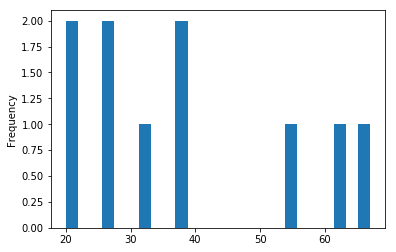

In [17]:
po_count.head(10).plot.hist(bins=25)

In [18]:
ms_count = scm_df["Manufacturing Site"].value_counts().head(10)
ms_count


Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
Name: Manufacturing Site, dtype: int64

# Total number of Manufacturing Sites in the data

In [19]:
print("There are ", len(ms_count) , "Manufacturing Sites in the data")

There are  10 Manufacturing Sites in the data


# What are Top 20 Active Products

In [20]:
print('Top 10 Active Products')
print((ms_count.head(10)))

Top 10 Active Products
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
Name: Manufacturing Site, dtype: int64


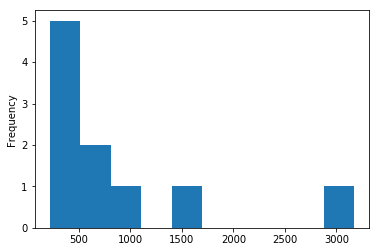

In [21]:
ms_count.head(10).plot.hist(bins=10)

In [22]:
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 34 columns):
ID                              10324 non-null int64
Project Code                    10324 non-null object
PQ #                            10324 non-null object
PO / SO #                       10324 non-null object
ASN/DN #                        10324 non-null object
Country                         10324 non-null object
Managed By                      10324 non-null object
Fulfill Via                     10324 non-null object
Vendor INCO Term                10324 non-null object
Shipment Mode                   10324 non-null object
PQ First Sent to Client Date    10324 non-null object
PO Sent to Vendor Date          10324 non-null object
Scheduled Delivery Date         10324 non-null object
Delivered to Client Date        10324 non-null datetime64[ns]
Delivery Recorded Date          10324 non-null object
Product Group                   10324 non-null object
Sub Classification  

# Check Numeric & Non-Numeric Values in the dataframe

In [23]:
non_numeric = scm_df.applymap(np.isreal)
non_numeric

ID  Project Code   PQ #  PO / SO #  ASN/DN #  Country  Managed By  \
0      True         False  False      False     False    False       False   
1      True         False  False      False     False    False       False   
2      True         False  False      False     False    False       False   
3      True         False  False      False     False    False       False   
4      True         False  False      False     False    False       False   
5      True         False  False      False     False    False       False   
6      True         False  False      False     False    False       False   
7      True         False  False      False     False    False       False   
8      True         False  False      False     False    False       False   
9      True         False  False      False     False    False       False   
10     True         False  False      False     False    False       False   
11     True         False  False      False     False    False       False   
12     True         False  False      False     False    False       False   
13     True         False  False      False     False    False       False   
14     True         False  False      False     False    False       False   
15     True         False  False      False     False    False       False   
16     True         False  False      False     False    False       False   
17     True         False  False      False     False    False       False   
18     True         False  False      False     False    False       False   
19     True         False  False      False     False    False       False   
20     True         False  False      False     False    False       False   
21     True         False  False      False     False    False       False   
22     True         False  False      False     False    False       False   
23     True         False  False      False     False    False       False   
24     True         False  False      False     False    False       False   
25     True         False  False      False     False    False       False   
26     True         False  False      False     False    False       False   
27     True         False  False      False     False    False       False   
28     True         False  False      False     False    False       False   
29     True         False  False      False     False    False       False   
...     ...           ...    ...        ...       ...      ...         ...   
10294  True         False  False      False     False    False       False   
10295  True         False  False      False     False    False       False   
10296  True         False  False      False     False    False       False   
10297  True         False  False      False     False    False       False   
10298  True         False  False      False     False    False       False   
10299  True         False  False      False     False    False       False   
10300  True         False  False      False     False    False       False   
10301  True         False  False      False     False    False       False   
10302  True         False  False      False     False    False       False   
10303  True         False  False      False     False    False       False   
10304  True         False  False      False     False    False       False   
10305  True         False  False      False     False    False       False   
10306  True         False  False      False     False    False       False   
10307  True         False  False      False     False    False       False   
10308  True         False  False      False     False    False       False   
10309  True         False  False      False     False    False       False   
10310  True         False  False      False     False    False       False   
10311  True         False  False      False     False    False       False   
10312  True         False  False      False     False    False       False   
10313  True         False  Fals

In [24]:
KG_columns = scm_df['WeightKG']
KG_columns

0        Weight Captured Separately
1        Weight Captured Separately
2        Weight Captured Separately
3        Weight Captured Separately
4        Weight Captured Separately
5        Weight Captured Separately
6        Weight Captured Separately
7        Weight Captured Separately
8        Weight Captured Separately
9        Weight Captured Separately
10       Weight Captured Separately
11       Weight Captured Separately
12       Weight Captured Separately
13       Weight Captured Separately
14       Weight Captured Separately
15       Weight Captured Separately
16       Weight Captured Separately
17       Weight Captured Separately
18       Weight Captured Separately
19       Weight Captured Separately
20       Weight Captured Separately
21       Weight Captured Separately
22       Weight Captured Separately
23       Weight Captured Separately
24       Weight Captured Separately
25       Weight Captured Separately
26       Weight Captured Separately
27       Weight Captured Sep

In [25]:
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 34 columns):
ID                              10324 non-null int64
Project Code                    10324 non-null object
PQ #                            10324 non-null object
PO / SO #                       10324 non-null object
ASN/DN #                        10324 non-null object
Country                         10324 non-null object
Managed By                      10324 non-null object
Fulfill Via                     10324 non-null object
Vendor INCO Term                10324 non-null object
Shipment Mode                   10324 non-null object
PQ First Sent to Client Date    10324 non-null object
PO Sent to Vendor Date          10324 non-null object
Scheduled Delivery Date         10324 non-null object
Delivered to Client Date        10324 non-null datetime64[ns]
Delivery Recorded Date          10324 non-null object
Product Group                   10324 non-null object
Sub Classification  

In [26]:
#To change ID column to integer
scm_df['ID'] = scm_df['ID'].astype(int)


In [27]:
scm_df.head()

ID Project Code            PQ #   PO / SO #  ASN/DN #       Country  \
0   62   102-NG-T01  Pre-PQ Process    SCMS-230   ASN-144       Nigeria   
1   68   113-ZW-T01  Pre-PQ Process    SCMS-308   ASN-285      Zimbabwe   
2   69   102-NG-T01  Pre-PQ Process    SCMS-354   ASN-608       Nigeria   
3  262   116-ZA-T01  Pre-PQ Process  SCMS-14050  ASN-1251  South Africa   
4  305   123-NG-T01  Pre-PQ Process  SCMS-15550  ASN-1269       Nigeria   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              CIP           Air   
2   PMO - US  Direct Drop              CIP             0   
3   PMO - US  Direct Drop              DDP             0   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                1-Oct-07   
1               Pre-PQ Process              1/10/2007               19-Mar-07   
2               Pre-PQ Process      Date Not Captured                5-Jul-07   
3               Pre-PQ Process             11/12/2007               29-Jan-08   
4               Pre-PQ Process      Date Not Captured                2-May-08   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0               2007-01-10              10-Jan-07          HRDT   
1               2007-03-19              19-Mar-07           ARV   
2               2007-05-07               7-May-07          HRDT   
3               2008-01-29              29-Jan-08           ARV   
4               2008-02-05               5-Feb-08          HRDT   

     Sub Classification                   Vendor  \
0              HIV test          EY Laboratories   
1             Pediatric     BRISTOL-MYERS SQUIBB   
2              HIV test   ACCOUN NIGERIA LIMITED   
3             Pediatric  JSI R&T INSTITUTE, INC.   
4  HIV test - Ancillary            Orgenics, Ltd   

                                    Item Description  \
0        HIV 1/2, InstantChek HIV 1+2 Kit, 100 Tests   
1  #102198**Didanosine 200mg [Videx], tablets, 60...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3  Zidovudine 10mg/ml [Retrovir], oral solution, ...   
4    HIV, Lancet, Safety, for HIV Test kits, 100 Pcs   

                                Molecule/Test Type        Brand   Dosage  \
0                 HIV 1/2, InstantChek HIV 1+2 Kit  InstantCHEK        0   
1                                       Didanosine        Videx    200mg   
2              HIV 1/2, Determine Complete HIV Kit    Determine        0   
3                                       Zidovudine     Retrovir  10mg/ml   
4  HIV, Lancet, Safety, for HIV Test kits, 100 Pcs      Generic        0   

            Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0              Test kit                         100                  10   
1                Tablet                          60                 579   
2              Test kit                         100                1500   
3         Oral solution                         200                  40   
4  Test kit - Ancillary                         100                 650   

       Line Item Value           Pack Price           Unit Price  \
0               850.00                85.00                 0.85   
1            14,764.50                25.50                 0.42   
2           120,000.00                80.00                 0.80   
3               317.60                 7.94                 0.04   
4                 6.50                 0.01                 0.00   

           Unnamed: 28             Manufacturing Site First Line Designation  \
0                 0.00           EY Laboratories, USA                    Yes   
1                 0.00             BMS Meymac, France                    Yes   
2                 0.00  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3              

# Shipmets to Rwanda sorted by "Line Item Value"

In [28]:
scm_df[scm_df['Country'] == 'Rwanda'].sort_values(['Line Item Value'], ascending = False )

ID Project Code            PQ #    PO / SO #   ASN/DN # Country  \
4015   85599   107-RW-T30       FPQ-15622     SO-50720    DN-4286  Rwanda   
3457   61281   107-RW-T30        FPQ-6341   SCMS-84980   ASN-9370  Rwanda   
4281   84213   107-RW-T30        FPQ-9969     SO-42431    DN-2976  Rwanda   
4255   86652   107-RW-T30       FPQ-12190     SO-45380    DN-3518  Rwanda   
4263   13302   107-RW-T30        FPQ-6185   SCMS-84420   ASN-8578  Rwanda   
3764    1299   107-RW-T01  Pre-PQ Process     SCMS-268    ASN-242  Rwanda   
4401   15879   107-RW-T30        FPQ-6341   SCMS-84940  ASN-10070  Rwanda   
4749    9836   107-RW-T01  Pre-PQ Process   SCMS-25910   ASN-2390  Rwanda   
4363   83751   107-RW-T30       FPQ-12766     SO-46482    DN-3479  Rwanda   
4670   82518   107-RW-T30        FPQ-9969     SO-42430    DN-2885  Rwanda   
4732   79232   107-RW-T30        FPQ-4011   SCMS-50270   ASN-7216  Rwanda   
1858   82784   107-RW-T30       FPQ-14811     SO-49940    DN-4162  Rwanda   
4752   51990   107-RW-T30        FPQ-6341   SCMS-84970  ASN-10317  Rwanda   
4729   16398   107-RW-T30        FPQ-6341   SCMS-84930  ASN-12601  Rwanda   
4407   84303   107-RW-T30       FPQ-12190     SO-45400    DN-3399  Rwanda   
4742    1889   107-RW-T01  Pre-PQ Process   SCMS-25520   ASN-2080  Rwanda   
4669   84873   107-RW-T30       FPQ-12190     SO-45381    DN-3453  Rwanda   
4272   20735   107-RW-T30        FPQ-8932  SCMS-129780  ASN-13341  Rwanda   
4405    8192   107-RW-T01  Pre-PQ Process   SCMS-14220   ASN-1305  Rwanda   
4580   31694   107-RW-T30        FPQ-5228   SCMS-66060   ASN-8011  Rwanda   
4354   86703   107-RW-T30       FPQ-14111     SO-48800    DN-3788  Rwanda   
4136   37835   107-RW-T30       FPQ-12518  SCMS-198220  ASN-21423  Rwanda   
4417   68367   107-RW-T30        FPQ-9168  SCMS-137550  ASN-15880  Rwanda   
4374   54828   107-RW-T30        FPQ-9168  SCMS-137551  ASN-15765  Rwanda   
4867   13841   107-RW-T30        FPQ-4011   SCMS-50290   ASN-6267  Rwanda   
5080   82791   107-RW-T30       FPQ-15622     SO-50710    DN-4213  Rwanda   
1919   86747   107-RW-T30       FPQ-14111     SO-48790    DN-4012  Rwanda   
4557   84926   107-RW-T30       FPQ-12901     SO-46560    DN-3689  Rwanda   
4665    3828   107-RW-T01  Pre-PQ Process   SCMS-43870   ASN-4687  Rwanda   
4971   32738   107-RW-T30        FPQ-8742  SCMS-137530  ASN-15140  Rwanda   
...      ...          ...             ...          ...        ...     ...   
10184  83585   107-RW-T30        FPQ-8372     SO-40970    DN-2627  Rwanda   
9908   26171   107-RW-T30        FPQ-3859   SCMS-48831   ASN-5800  Rwanda   
9636   12665   107-RW-T01  Pre-PQ Process       SO-489     DN-248  Rwanda   
9123   10823   107-RW-T01  Pre-PQ Process       SO-481     DN-100  Rwanda   
1015   52228   107-RW-T30       FPQ-12409  SCMS-193930  ASN-22289  Rwanda   
9701   53108   107-RW-T30       FPQ-13651  SCMS-227730  ASN-24931  Rwanda   
9743    6705   107-RW-T01  Pre-PQ Process     SCMS-800    ASN-719  Rwanda   
9694   82991   107-RW-T30        FPQ-8204     SO-41040    DN-2439  Rwanda   
9927   86211   107-RW-T30       FPQ-16284     SO-51530    DN-4323  Rwanda   
9873   82990   107-RW-T30        FPQ-8372     SO-40960    DN-2429  Rwanda   
8815   83806   107-RW-T30       FPQ-12190     SO-45402    DN-3748  Rwanda   
9888   11626   107-RW-T01  Pre-PQ Process     SO-17230     DN-961  Rwanda   
1920   86746   107-RW-T30       FPQ-14811     SO-49941    DN-4011  Rwanda   
9877   11225   107-RW-T01  Pre-PQ Process      SO-1682     DN-580  Rwanda   
9721   49837   107-RW-T30        FPQ-8365  SCMS-126450  ASN-13722  Rwanda   
10084  86073   107-RW-T30       FPQ-13728     SO-47970    DN-3637  Rwanda   
10051  86113   107-RW-T30       FPQ-13728     SO-47980    DN-3810  Rwanda   
10116  86787   107-RW-T30       FPQ-15622     SO-50690    DN-4176  Rwanda   
10064  82761   107-RW-T30       FPQ-14893     SO-49990    DN-4055  Rwanda   
3442   11385   107-RW-T01  Pre-PQ Process       SO-481     DN-100  Rwanda   
2823  

# Distribution of Product Groups In the Data

In [29]:
scm_df['Product Group'].value_counts()

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

# The Top 5 Vendors

In [30]:
scm_df['Vendor'].value_counts().head(10)

SCMS from RDC                                            5404
Orgenics, Ltd                                             754
S. BUYS WHOLESALER                                        715
Aurobindo Pharma Limited                                  668
Trinity Biotech, Plc                                      356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)           347
PHARMACY DIRECT                                           326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)     317
HETERO LABS LIMITED                                       277
CIPLA LIMITED                                             175
Name: Vendor, dtype: int64

In [31]:
#To display ONE row in the form of datafram / USE DOUBLE SQUARE BRACKETS

scm_df.loc[[199]]

ID Project Code            PQ # PO / SO # ASN/DN #   Country  \
199  5303   113-ZW-T01  Pre-PQ Process  SCMS-348  ASN-286  Zimbabwe   

    Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
199   PMO - US  Direct Drop              CIP           Air   

    PQ First Sent to Client Date PO Sent to Vendor Date  \
199               Pre-PQ Process              1/19/2007   

    Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
199               19-Mar-07               2007-03-19              19-Mar-07   

    Product Group Sub Classification                Vendor  \
199           ARV          Pediatric  BRISTOL-MYERS SQUIBB   

                                      Item Description Molecule/Test Type  \
199  Didanosine 50mg [Videx], chewable tablets, 60 ...         Didanosine   

     Brand Dosage                  Dosage Form  Unit of Measure (Per Pack)  \
199  Videx   50mg  Chewable/dispersible tablet                          60   

     Line Item Quantity      Line Item Value           Pack Price  \
199                  54               513.00                 9.50   

              Unit Price          Unnamed: 28  Manufacturing Site  \
199                 0.16                 0.00  BMS Meymac, France   

    First Line Designation                    WeightKG  \
199                    Yes  Weight Captured Separately   

                           FreightCost   LineItemInsurance    
199  Freight Included in Commodity Cost                 0.00

In [32]:
scm_df.loc[[199, 2555]]

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
199    5303   113-ZW-T01  Pre-PQ Process  SCMS-348  ASN-286       Zimbabwe   
2555  85301   104-CI-T30        FPQ-9749  SO-42382  DN-2837  Côte d'Ivoire   

     Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
199    PMO - US  Direct Drop              CIP           Air   
2555   PMO - US     From RDC   N/A - From RDC         Truck   

     PQ First Sent to Client Date PO Sent to Vendor Date  \
199                Pre-PQ Process              1/19/2007   
2555                    4/19/2012         N/A - From RDC   

     Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
199                19-Mar-07               2007-03-19              19-Mar-07   
2555               13-Nov-12               2012-09-05               5-Sep-12   

     Product Group Sub Classification                Vendor  \
199            ARV          Pediatric  BRISTOL-MYERS SQUIBB   
2555           ARV          Pediatric         SCMS from RDC   

                                       Item Description Molecule/Test Type  \
199   Didanosine 50mg [Videx], chewable tablets, 60 ...         Didanosine   
2555                  Efavirenz 200mg, capsule, 90 Caps          Efavirenz   

        Brand Dosage                  Dosage Form  Unit of Measure (Per Pack)  \
199     Videx   50mg  Chewable/dispersible tablet                          60   
2555  Generic  200mg                      Capsule                          90   

      Line Item Quantity      Line Item Value           Pack Price  \
199                   54               513.00                 9.50   
2555                3400            28,084.00                 8.26   

               Unit Price          Unnamed: 28         Manufacturing Site  \
199                  0.16                 0.00         BMS Meymac, France   
2555                 0.09                 0.00  Aurobindo Unit III, India   

     First Line Designation                    WeightKG  \
199                     Yes  Weight Captured Separately   
2555                     No     See DN-2837 (ID#:82507)   

                            FreightCost   LineItemInsurance    
199   Freight Included in Commodity Cost                 0.00  
2555             See DN-2837 (ID#:82507)                39.37

In [33]:
#To display ONE row in non-tabular form

scm_df.iloc[6002]

ID                                                                          83989
Project Code                                                           151-NG-T30
PQ #                                                                     FPQ-4537
PO / SO #                                                                SO-35061
ASN/DN #                                                                  DN-1723
Country                                                                   Nigeria
Managed By                                                               PMO - US
Fulfill Via                                                              From RDC
Vendor INCO Term                                                   N/A - From RDC
Shipment Mode                                                         Air Charter
PQ First Sent to Client Date                                            11/6/2009
PO Sent to Vendor Date                                             N/A - From RDC
Scheduled Delive

In [34]:
#To display ONE row in ntabular form/USE SQUARE BRACKETS

scm_df.iloc[[6002]]

ID Project Code      PQ # PO / SO # ASN/DN #  Country Managed By  \
6002  83989   151-NG-T30  FPQ-4537  SO-35061  DN-1723  Nigeria   PMO - US   

     Fulfill Via Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
6002    From RDC   N/A - From RDC   Air Charter                    11/6/2009   

     PO Sent to Vendor Date Scheduled Delivery Date Delivered to Client Date  \
6002         N/A - From RDC               19-Apr-10               2010-03-30   

     Delivery Recorded Date Product Group Sub Classification         Vendor  \
6002              30-Mar-10           ARV              Adult  SCMS from RDC   

                                       Item Description  \
6002  Lamivudine/Nevirapine/Zidovudine 150/200/300mg...   

                    Molecule/Test Type    Brand         Dosage   Dosage Form  \
6002  Lamivudine/Nevirapine/Zidovudine  Generic  150/300/200mg  Tablet - FDC   

      Unit of Measure (Per Pack)  Line Item Quantity      Line Item Value  \
6002                          60               20518           230,211.96   

               Pack Price           Unit Price          Unnamed: 28  \
6002                11.22                 0.19                 0.00   

             Manufacturing Site First Line Designation WeightKG  \
6002  Aurobindo Unit III, India                    Yes  2407.00   

                            FreightCost   LineItemInsurance    
6002  Freight Included in Commodity Cost               496.34

In [35]:
#to see more rows 
scm_df.iloc[[6002,199]]

ID Project Code            PQ # PO / SO # ASN/DN #   Country  \
6002  83989   151-NG-T30        FPQ-4537  SO-35061  DN-1723   Nigeria   
199    5303   113-ZW-T01  Pre-PQ Process  SCMS-348  ASN-286  Zimbabwe   

     Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
6002   PMO - US     From RDC   N/A - From RDC   Air Charter   
199    PMO - US  Direct Drop              CIP           Air   

     PQ First Sent to Client Date PO Sent to Vendor Date  \
6002                    11/6/2009         N/A - From RDC   
199                Pre-PQ Process              1/19/2007   

     Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
6002               19-Apr-10               2010-03-30              30-Mar-10   
199                19-Mar-07               2007-03-19              19-Mar-07   

     Product Group Sub Classification                Vendor  \
6002           ARV              Adult         SCMS from RDC   
199            ARV          Pediatric  BRISTOL-MYERS SQUIBB   

                                       Item Description  \
6002  Lamivudine/Nevirapine/Zidovudine 150/200/300mg...   
199   Didanosine 50mg [Videx], chewable tablets, 60 ...   

                    Molecule/Test Type    Brand         Dosage  \
6002  Lamivudine/Nevirapine/Zidovudine  Generic  150/300/200mg   
199                         Didanosine    Videx           50mg   

                      Dosage Form  Unit of Measure (Per Pack)  \
6002                 Tablet - FDC                          60   
199   Chewable/dispersible tablet                          60   

      Line Item Quantity      Line Item Value           Pack Price  \
6002               20518           230,211.96                11.22   
199                   54               513.00                 9.50   

               Unit Price          Unnamed: 28         Manufacturing Site  \
6002                 0.19                 0.00  Aurobindo Unit III, India   
199                  0.16                 0.00         BMS Meymac, France   

     First Line Designation                    WeightKG  \
6002                    Yes                     2407.00   
199                     Yes  Weight Captured Separately   

                            FreightCost   LineItemInsurance    
6002  Freight Included in Commodity Cost               496.34  
199   Freight Included in Commodity Cost                 0.00

In [36]:
#To dislay 3 columns and three specific rows USING LOC

scm_df.loc[[6002, 199, 10220], ['Country', 'Air' , 'Line Item Value']]

Country                  Air      Line Item Value
6002    Nigeria                  nan           230,211.96
199    Zimbabwe                  nan               513.00
10220    Uganda                  nan             2,361.42

In [37]:
#To dislay 3 columns and three specific rows USING ILOC

scm_df.iloc[[6002, 199, 10220], [5,9,25]]


Country Shipment Mode      Line Item Value
6002    Nigeria   Air Charter           230,211.96
199    Zimbabwe           Air               513.00
10220    Uganda           Air             2,361.42

In [38]:
#To dislay 3 columns and all rows USING ILOC

scm_df.iloc[:, [5,9,25]]

Country Shipment Mode      Line Item Value
0            Nigeria           Air               850.00
1           Zimbabwe           Air            14,764.50
2            Nigeria             0           120,000.00
3       South Africa             0               317.60
4            Nigeria           Air                 6.50
5       South Africa             0               340.00
6              Haiti           Air               278.00
7             Guyana           Air                 2.40
8           Ethiopia             0            13,399.25
9       South Africa         Truck               405.06
10      South Africa         Truck               870.00
11      South Africa             0                77.10
12           Nigeria           Air                54.98
13          Ethiopia           Air               691.42
14      South Africa         Truck               103.40
15      South Africa         Truck             1,906.00
16      South Africa         Truck             1,025.10
17      South Africa         Truck             1,049.40
18      South Africa         Truck               696.50
19           Namibia           Air               320.00
20           Nigeria           Air               453.60
21      South Africa         Truck             1,830.40
22      South Africa         Truck             2,745.60
23      South Africa         Truck               858.00
24      South Africa         Truck                91.35
25      South Africa         Truck             1,375.60
26            Guyana           Air             4,050.00
27      South Africa           Air            47,522.75
28      South Africa           Air            49,840.00
29      South Africa           Air             3,588.48
...              ...           ...                  ...
10294        Nigeria   Air Charter               122.20
10295     Congo, DRC           Air               100.19
10296     Congo, DRC           Air                55.92
10297        Nigeria   Air Charter            97,966.20
10298        Nigeria           Air               114.54
10299        Nigeria   Air Charter                95.20
10300       Botswana           Air               450.00
10301          Haiti           Air               278.00
10302  Côte d'Ivoire             0               160.00
10303        Nigeria           Air               105.00
10304        Nigeria   Air Charter                34.20
10305        Nigeria           Air                58.75
10306        Nigeria           Air               105.20
10307         Uganda           Air                99.00
10308          Haiti           Air                49.50
10309       Botswana           Air               465.00
10310       Tanzania           Air             9,952.00
10311          Sudan           Air                11.70
10312         Guyana           Air               135.00
10313         Guyana           Air                13.00
10314       Ethiopia           Air             4,287.50
10315   South Africa           Air                 5.06
10316       Botswana           Air               465.00
10317     Congo, DRC           Air                46.60
10318         Zambia         Truck                51.24
10319     Congo, DRC           Air                53.59
10320     Congo, DRC           Air                53.59
10321         Rwanda           Air             8,534.00
10322         Uganda         Truck               169.00
10323       Tanzania           Air                96.00

[10324 rows x 3 columns]

In [39]:
#To dislay all columns and 3 specific rows USING LOC

scm_df.loc[[4000, 5000, 6000], :]

ID Project Code            PQ # PO / SO # ASN/DN #     Country  \
4000  83060   151-NG-T30        FPQ-9432  SO-42802  DN-2767     Nigeria   
5000  10651   111-MZ-T01  Pre-PQ Process   SO-1039   DN-601  Mozambique   
6000  83543   110-ZM-T30        FPQ-8383  SO-40730  DN-2398      Zambia   

     Managed By Fulfill Via Vendor INCO Term Shipment Mode  \
4000   PMO - US    From RDC   N/A - From RDC   Air Charter   
5000   PMO - US    From RDC   N/A - From RDC           Air   
6000   PMO - US    From RDC   N/A - From RDC         Truck   

     PQ First Sent to Client Date PO Sent to Vendor Date  \
4000                     3/1/2012         N/A - From RDC   
5000               Pre-PQ Process         N/A - From RDC   
6000                    9/11/2011         N/A - From RDC   

     Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
4000                8-Feb-12               2012-07-24              24-Jul-12   
5000                4-Aug-08               2008-04-05               5-Apr-08   
6000               11-Mar-11               2011-11-15              15-Nov-11   

     Product Group Sub Classification         Vendor  \
4000           ARV              Adult  SCMS from RDC   
5000           ARV              Adult  SCMS from RDC   
6000           ARV              Adult  SCMS from RDC   

                                       Item Description  \
4000  Lamivudine/Nevirapine/Zidovudine 150/200/300mg...   
5000                  Stavudine 30mg, capsules, 60 Caps   
6000  Emtricitabine/Tenofovir Disoproxil Fumarate 20...   

                               Molecule/Test Type    Brand         Dosage  \
4000             Lamivudine/Nevirapine/Zidovudine  Generic  150/300/200mg   
5000                                    Stavudine  Generic           30mg   
6000  Emtricitabine/Tenofovir Disoproxil Fumarate  Generic      200/300mg   

       Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
4000  Tablet - FDC                          60              159964   
5000       Capsule                          60                 120   
6000  Tablet - FDC                          30               26060   

          Line Item Value           Pack Price           Unit Price  \
4000         1,569,246.84                 9.81                 0.16   
5000               182.40                 1.52                 0.03   
6000           233,758.20                 8.97                 0.30   

              Unnamed: 28         Manufacturing Site First Line Designation  \
4000                 0.00  Aurobindo Unit III, India                    Yes   
5000                 0.00  Aurobindo Unit III, India                    Yes   
6000                 0.00  Aurobindo Unit III, India                    Yes   

      WeightKG FreightCost   LineItemInsurance    
4000  37944.00     16532.50             2,200.08  
5000   5092.00      8118.64                 0.29  
6000   2409.00      9346.80               385.70

# Lets see if the shipment is First Line Designation or not... 

In [40]:
#So we will try 
is_firstline = scm_df['First Line Designation'] == "Yes"
print(type(is_firstline))
is_firstline

<class 'pandas.core.series.Series'>


0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10       False
11        True
12        True
13        True
14        True
15        True
16       False
17        True
18        True
19        True
20        True
21        True
22        True
23       False
24       False
25       False
26        True
27        True
28        True
29       False
         ...  
10294     True
10295     True
10296     True
10297     True
10298     True
10299     True
10300     True
10301     True
10302     True
10303     True
10304     True
10305     True
10306     True
10307     True
10308     True
10309     True
10310     True
10311     True
10312     True
10313     True
10314     True
10315     True
10316     True
10317     True
10318     True
10319     True
10320     True
10321     True
10322     True
10323     True
Name: First Line Designation, Length: 10324, dtype: bool

# First Line Shipments Details

In [41]:
print("There are " ,  len(scm_df[is_firstline]) , "First Line Shipments" )

There are  7030 First Line Shipments


In [42]:
scm_df[is_firstline]

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
2         69   102-NG-T01  Pre-PQ Process     SCMS-354    ASN-608   
3        262   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   
5        343   116-ZA-T01  Pre-PQ Process   SCMS-16600   ASN-1520   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
7        398   102-GY-T01  Pre-PQ Process   SCMS-18480   ASN-1502   
8        400   117-ET-T01  Pre-PQ Process   SCMS-18430   ASN-1465   
9        422   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
12       465   102-NG-T01  Pre-PQ Process   SCMS-21540   ASN-2011   
13       466   117-ET-T01  Pre-PQ Process   SCMS-21550   ASN-1741   
14       531   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2783   
15       532   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
17       598   116-ZA-T01  Pre-PQ Process   SCMS-25540   ASN-2295   
18       646   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
20       772   131-NG-T01  Pre-PQ Process   SCMS-30502   ASN-3653   
21       835   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
22       836   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3892   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
27      1063   116-ZA-T01  Pre-PQ Process   SCMS-40810   ASN-3634   
28      1065   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
30      1067   116-ZA-T01  Pre-PQ Process   SCMS-41060   ASN-3624   
31      1068   116-ZA-T01  Pre-PQ Process   SCMS-41070   ASN-3625   
32      1070   116-ZA-T01  Pre-PQ Process   SCMS-41140   ASN-3752   
33      1077   116-ZA-T01  Pre-PQ Process   SCMS-41462   ASN-4361   
34      1078   116-ZA-T01  Pre-PQ Process   SCMS-41460   ASN-4502   
35      1079   116-ZA-T01  Pre-PQ Process   SCMS-41464   ASN-4634   
...      ...          ...             ...          ...        ...   
10294  84539   151-NG-T30        FPQ-4537     SO-35041    DN-1701   
10295  84705   101-CD-T30        FPQ-8840     SO-41384    DN-2525   
10296  84707   101-CD-T30        FPQ-8840     SO-41386    DN-2527   
10297  84931   151-NG-T30       FPQ-13293     SO-47300    DN-3720   
10298  86236   154-NG-T30        FPQ-3815     SO-32271    DN-1312   
10299  86284   151-NG-T30        FPQ-4537     SO-35120    DN-1741   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10302  10576   104-CI-T01  Pre-PQ Process       SO-781     DN-245   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10304  11077   151-NG-T30  Pre-PQ Process     SO-35150    DN-1594   
10305  11079   151-NG-T30  Pre-PQ Process     SO-35330    DN-1615   
10306  11282   112-NG-T01  Pre-PQ Process     SO-19430    DN-1063   
10307  12543   114-UG-T01  Pre-PQ Process     SO-17911    DN-1094   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  55053   105-GY-T30       FPQ-12057  SCMS-189040  ASN-19842   
10314  55520   117-ET-T30        FPQ-9096  SCMS-133390  ASN-13875   
10315  61882   161-ZA-T30        FPQ-5303   SCMS-68950   ASN-7130   
10316  63296   144-BW-T30        FPQ-4487   SCMS-57521   ASN-8573   
10317  82447   101-CD-T30        FPQ-8840     SO-41382    DN-2530   
10318  82850   110-ZM-T30        FPQ-4029     SO-34620    DN-1566   
10319  84142   101-CD-T30        FPQ-8840     SO-41383    DN-2524   
10320  8

# Total 2778 Shiments With EXW  as Vendor INCO Term  

In [43]:
is_exw = scm_df['Vendor INCO Term'] ==  'EXW'
scm_df[is_exw]

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
7        398   102-GY-T01  Pre-PQ Process   SCMS-18480   ASN-1502   
12       465   102-NG-T01  Pre-PQ Process   SCMS-21540   ASN-2011   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
52      1643   104-CI-T01  Pre-PQ Process   SCMS-18420   ASN-1469   
53      1660   113-ZW-T01  Pre-PQ Process   SCMS-18870   ASN-2435   
60      1730   102-NG-T01  Pre-PQ Process   SCMS-21580   ASN-1797   
94      2796   119-NA-T01  Pre-PQ Process   SCMS-10360    ASN-658   
98      2960   100-HT-T01  Pre-PQ Process   SCMS-15460   ASN-2258   
99      2965   100-HT-T01  Pre-PQ Process   SCMS-15880   ASN-1301   
106     3039   111-MZ-T01  Pre-PQ Process   SCMS-18060   ASN-1651   
109     3153   102-BW-T01  Pre-PQ Process   SCMS-22730   ASN-1939   
118     3360   119-NA-T01  Pre-PQ Process   SCMS-28850   ASN-2513   
151     4023   102-GY-T01  Pre-PQ Process     SCMS-767    ASN-607   
153     4085   102-GY-T01  Pre-PQ Process   SCMS-11650    ASN-834   
160     4321   102-BW-T01  Pre-PQ Process   SCMS-18730   ASN-1609   
162     4333   119-NA-T01  Pre-PQ Process   SCMS-19130   ASN-1787   
198     5295   102-NG-T01  Pre-PQ Process     SCMS-229    ASN-155   
200     5365   100-HT-T01  Pre-PQ Process   SCMS-10080    ASN-664   
206     5595   128-BJ-T01  Pre-PQ Process   SCMS-17280   ASN-1412   
207     5622   110-ZM-T01  Pre-PQ Process   SCMS-18070   ASN-1577   
208     5646   123-NG-T01  Pre-PQ Process   SCMS-18740   ASN-1553   
214     5769   102-BW-T01  Pre-PQ Process   SCMS-22770   ASN-2235   
268     7260   133-NG-T01  Pre-PQ Process   SCMS-27070   ASN-2353   
305     8264   102-NG-T01  Pre-PQ Process   SCMS-16900   ASN-1410   
306     8317   111-MZ-T01  Pre-PQ Process   SCMS-18340   ASN-1747   
308     8438   102-BW-T01  Pre-PQ Process   SCMS-22700   ASN-1909   
344     9536   100-HT-T01  Pre-PQ Process   SCMS-15870   ASN-1319   
...      ...          ...             ...          ...        ...   
10267  71012   144-BW-T30        FPQ-4167   SCMS-54010   ASN-5830   
10271   2502   102-KE-T01  Pre-PQ Process   SCMS-42970   ASN-4098   
10274   9530   100-HT-T01  Pre-PQ Process   SCMS-15490   ASN-4374   
10275  19335   102-SD-T30        FPQ-8264  SCMS-121850  ASN-13536   
10276  27675   102-SD-T30        FPQ-7321  SCMS-107770  ASN-10900   
10277  32316   102-SD-T30        FPQ-8264  SCMS-121842  ASN-12830   
10278  39133   109-TZ-T30       FPQ-11919  SCMS-205480  ASN-22109   
10279  39769   102-SD-T30        FPQ-8264  SCMS-121852  ASN-13538   
10280  42851   102-SD-T30        FPQ-8264  SCMS-121843  ASN-12831   
10281  44092   102-GY-T30        FPQ-6501   SCMS-89530   ASN-9004   
10283  49085   102-SD-T30        FPQ-8264  SCMS-121840  ASN-12828   
10284  60994   102-SD-T30        FPQ-8264  SCMS-121853  ASN-13539   
10285  64367   102-SD-T30        FPQ-8264  SCMS-121851  ASN-13537   
10286  65120   105-GY-T30       FPQ-12235  SCMS-190770  ASN-20330   
10287  67372   144-BW-T30        FPQ-4167   SCMS-54120   ASN-8574   
10288  69198   144-BW-T30        FPQ-4167   SCMS-54100   ASN-7209   
10289  70212   144-BW-T30        FPQ-4167   SCMS-54070   ASN-7749   
10290  73089   105-GY-T30       FPQ-10249  SCMS-153870  ASN-17103   
10291  75595   122-HT-T30        FPQ-8671  SCMS-131030  ASN-13447   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  5

In [44]:
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 34 columns):
ID                              10324 non-null int32
Project Code                    10324 non-null object
PQ #                            10324 non-null object
PO / SO #                       10324 non-null object
ASN/DN #                        10324 non-null object
Country                         10324 non-null object
Managed By                      10324 non-null object
Fulfill Via                     10324 non-null object
Vendor INCO Term                10324 non-null object
Shipment Mode                   10324 non-null object
PQ First Sent to Client Date    10324 non-null object
PO Sent to Vendor Date          10324 non-null object
Scheduled Delivery Date         10324 non-null object
Delivered to Client Date        10324 non-null datetime64[ns]
Delivery Recorded Date          10324 non-null object
Product Group                   10324 non-null object
Sub Classification  

In [45]:
scm_df['Delivered to Client Date'].dtype

dtype('<M8[ns]')

# Subsetting By Multiple Conditions
# Display rows having Line Item Value greater than 1000 and less than 20000


In [46]:

LIV_greater_than_1000 = scm_df['Line Item Value'] > 1000

LIV_lower_than_20000 = scm_df['Line Item Value'] < 20000

all_LIV_filters = LIV_greater_than_1000 & LIV_lower_than_20000
scm_df[all_LIV_filters]

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
8        400   117-ET-T01  Pre-PQ Process   SCMS-18430   ASN-1465   
15       532   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
16       533   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
17       598   116-ZA-T01  Pre-PQ Process   SCMS-25540   ASN-2295   
21       835   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
22       836   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3892   
25       839   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
29      1066   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
30      1067   116-ZA-T01  Pre-PQ Process   SCMS-41060   ASN-3624   
31      1068   116-ZA-T01  Pre-PQ Process   SCMS-41070   ASN-3625   
32      1070   116-ZA-T01  Pre-PQ Process   SCMS-41140   ASN-3752   
33      1077   116-ZA-T01  Pre-PQ Process   SCMS-41462   ASN-4361   
34      1078   116-ZA-T01  Pre-PQ Process   SCMS-41460   ASN-4502   
35      1079   116-ZA-T01  Pre-PQ Process   SCMS-41464   ASN-4634   
36      1080   116-ZA-T01  Pre-PQ Process   SCMS-41480   ASN-5055   
40      1111   116-ZA-T01  Pre-PQ Process   SCMS-47390   ASN-4402   
41      1114   116-ZA-T01  Pre-PQ Process   SCMS-47430   ASN-4244   
42      1115   116-ZA-T01  Pre-PQ Process   SCMS-47500   ASN-4332   
45      1223   116-ZA-T01  Pre-PQ Process   SCMS-47051   ASN-4836   
46      1303   117-ET-T01  Pre-PQ Process     SCMS-284    ASN-168   
48      1512   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
49      1513   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
50      1531   100-KZ-T01  Pre-PQ Process   SCMS-14770   ASN-1061   
54      1673   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
56      1675   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
57      1722   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
58      1723   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-2291   
59      1724   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
...      ...          ...             ...          ...        ...   
10160  85753   151-NG-T30        FPQ-6800     SO-39220    DN-2172   
10161  27670   114-UG-T30       FPQ-12273  SCMS-198550  ASN-21516   
10164  58652   152-HT-T30        FPQ-6823   SCMS-98550  ASN-10063   
10169  82390   200-ZW-T30        FPQ-6483     SO-38901    DN-2288   
10171  86663   109-TZ-T30       FPQ-12015     SO-44994    DN-3594   
10174   9804   117-ET-T01  Pre-PQ Process   SCMS-24890   ASN-2218   
10175  10976   106-HT-T01  Pre-PQ Process      SO-1565     DN-657   
10176  11579   112-NG-T01  Pre-PQ Process     SO-12780     DN-911   
10177  29036   114-UG-T30        FPQ-5772   SCMS-79750   ASN-7957   
10178  63648   106-HT-T30        FPQ-6489   SCMS-90451  ASN-10748   
10180  64709   106-HT-T30        FPQ-7649  SCMS-108910  ASN-13616   
10184  83585   107-RW-T30        FPQ-8372     SO-40970    DN-2627   
10188   2892   114-UG-T01  Pre-PQ Process   SCMS-13510   ASN-1483   
10190   6884   106-HT-T01  Pre-PQ Process   SCMS-15590   ASN-1328   
10191   7894   119-NA-T01  Pre-PQ Process   SCMS-47130   ASN-4416   
10195  21037   114-UG-T30        FPQ-6918   SCMS-96930  ASN-10455   
10197  28031   108-VN-T30        FPQ-5066   SCMS-65040   ASN-6209   
10198  32729   108-VN-T30       FPQ-12539  SCMS-199700  ASN-23138   
10203  54536   151-NG-T30        FPQ-4574   SCMS-59990   ASN-6679   
10216  11206   110-ZM-T01  Pre-PQ Process      SO-1084     DN-453   
10217  11629   112-NG-T01  Pre-PQ Process     SO-20961    DN-1165   
10220  36654   114-UG-T30        FPQ-7268  SCMS-104120  ASN-11026   
10235   7849   114-UG-T01  Pre-PQ Process   SCMS-45660   ASN-4378   
10236   7857   102-BW-T01  Pre-PQ Process   SCMS-46080   ASN-4216   
10261  23283   161-ZA-T30        FPQ-5303   SCMS-68980   ASN-8251   
10263  44045   114-UG-T30        FPQ-3891   SCMS-52580   ASN-5101   
10272   

# Total shipmens for brands "Videx" and "OraQuick"

In [47]:
#Using | for OR Operator find out 
brand_videx = scm_df['Brand'] == 'Videx'
brand_OraQuick= scm_df['Brand'] == 'OraQuick'


all_brand_filters = brand_videx | brand_OraQuick
scm_df[all_brand_filters]

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
24       838   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
47      1350   104-CI-T01  Pre-PQ Process     SCMS-698    ASN-727   
50      1531   100-KZ-T01  Pre-PQ Process   SCMS-14770   ASN-1061   
68      1929   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
87      2451   116-ZA-T01  Pre-PQ Process   SCMS-41584   ASN-4385   
91      2588   108-VN-T01  Pre-PQ Process   SCMS-46560   ASN-4709   
144     3880   108-VN-T01  Pre-PQ Process   SCMS-46540   ASN-4487   
165     4461   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
169     4794   110-ZM-T01  Pre-PQ Process   SCMS-33150   ASN-3308   
198     5295   102-NG-T01  Pre-PQ Process     SCMS-229    ASN-155   
199     5303   113-ZW-T01  Pre-PQ Process     SCMS-348    ASN-286   
216     5800   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
218     5802   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
219     5821   106-HT-T01  Pre-PQ Process   SCMS-24010   ASN-3087   
243     6544   108-VN-T01  Pre-PQ Process   SCMS-46490   ASN-4179   
255     6972   102-LS-T01  Pre-PQ Process   SCMS-18360   ASN-1430   
259     7055   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
274     7477   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
282     7732   116-ZA-T01  Pre-PQ Process   SCMS-41140   ASN-3752   
296     7983   113-ZW-T01  Pre-PQ Process     SCMS-231    ASN-139   
297     8100   113-ZW-T01  Pre-PQ Process   SCMS-11690    ASN-871   
300     8204   102-BW-T01  Pre-PQ Process   SCMS-14600   ASN-1154   
301     8209   100-KZ-T01  Pre-PQ Process   SCMS-14780   ASN-1139   
303     8218   109-TZ-T01  Pre-PQ Process   SCMS-15220   ASN-1696   
312     8475   106-HT-T01  Pre-PQ Process   SCMS-23790   ASN-2146   
333     9053   116-ZA-T01  Pre-PQ Process   SCMS-41588   ASN-4359   
336     9056   116-ZA-T01  Pre-PQ Process   SCMS-41587   ASN-4602   
339     9187   108-VN-T01  Pre-PQ Process   SCMS-46540   ASN-4487   
...      ...          ...             ...          ...        ...   
9663   65132   144-BW-T30        FPQ-4207   SCMS-41840   ASN-6012   
9664   78087   103-CM-T30        FPQ-8396  SCMS-122250  ASN-12401   
9711    1046   106-HT-T01  Pre-PQ Process   SCMS-40000   ASN-3675   
9716   23194   106-HT-T30        FPQ-7066  SCMS-100140  ASN-10007   
9743    6705   107-RW-T01  Pre-PQ Process     SCMS-800    ASN-719   
9758    1648   102-BW-T01  Pre-PQ Process   SCMS-18550   ASN-1448   
9794    1262   106-HT-T01  Pre-PQ Process      SCMS-74     ASN-46   
9879   33962   106-HT-T30        FPQ-4337   SCMS-56120   ASN-5630   
9910   50730   106-HT-T30        FPQ-9066  SCMS-138600  ASN-15150   
9930    9353   102-BW-T01  Pre-PQ Process   SCMS-10390    ASN-644   
9931    9390   113-ZW-T01  Pre-PQ Process   SCMS-11680    ASN-746   
9932   11711   100-HT-T01  Pre-PQ Process       SO-419     DN-111   
9958   25749   106-HT-T30        FPQ-6834   SCMS-96430   ASN-9759   
9962   33263   106-HT-T30        FPQ-9621  SCMS-147160  ASN-16866   
9965   82203   106-HT-T30       FPQ-11285  SCMS-176250  ASN-18844   
10022   5635   102-LS-T01  Pre-PQ Process   SCMS-18370   ASN-1660   
10053   1246   104-CI-T01  Pre-PQ Process       SCMS-5      ASN-7   
10100   1196   102-BW-T01  Pre-PQ Process   SCMS-46071   ASN-4324   
10103   8909   144-BW-T01  Pre-PQ Process   SCMS-38050   ASN-3424   
10108  17701   102-ML-T30       FPQ-10104  SCMS-153770  ASN-15931   
10122  26505   102-ML-T30       FPQ-13391  SCMS-221920  ASN-24156   
10172   8713   102-BW-T01  Pre-PQ Process   SCMS-31360   ASN-2737   
10182  71308   144-BW-T30        FPQ-4167   SCMS-54190   ASN-6563   
10196  26571   144-BW-T30        FPQ-4167   SCMS-54170   ASN-5725   
10199  32959   144-BW-T30        FPQ-4167   SCMS-54200   ASN-7797   
10201  44694   144-BW-T30        FPQ-4167   SCMS-54210   ASN-5491   
10205  6

In [48]:
# Complex Conditions -  Complex filtering based on very specific conditions
#To display all shipments in the year 2010 where destination country is Haiti 



#print("\nYear:")
#print(df.Date_time.dt.year.head())


scm_df['Delivered to Client Date 2010'] = scm_df['Delivered to Client Date'].astype('datetime64[ns]')
scm_df['Delivered to Client Date 2010']


print("\nYear:")
print(scm_df['Delivered to Client Date 2010'].dt.year.head())



#pd.to_datetime(scm_df['Delivered to Client Date']).year

#df['date_col'] =  pd.to_datetime(df['date_col'], format='%d/%m/%Y')

#is_2010 = scm_df['Delivered to Client Date'.year] == '2010'

#purchase_amount_filter = (salesdata['CC Provider'] == 'American Express') | (salesdata['CC Provider'] == 'Discover')
#all_filters =  is_may & purchase_amount_filter
#salesdata[all_filters]



Year:
0    2007
1    2007
2    2007
3    2008
4    2008
Name: Delivered to Client Date 2010, dtype: int64


# Complex Conditions -  Complex filtering based on very specific conditions
# 98 Shipments in the year 2010 to Haiti 

In [49]:
is_2010 = scm_df['Delivered to Client Date 2010'].dt.year == 2010
is_2010
country_filter = (scm_df['Country'] == 'Haiti') | (scm_df['Country'] == 'Botswana')
all_filters =  is_2010 & country_filter
scm_df[all_filters]

ID Project Code      PQ #   PO / SO #  ASN/DN #   Country  \
455    14970   106-HT-T30  FPQ-5526  SCMS-74010  ASN-7683     Haiti   
651    29608   106-HT-T30  FPQ-4389  SCMS-58010  ASN-5820     Haiti   
653    29727   106-HT-T30  FPQ-5725  SCMS-74760  ASN-7496     Haiti   
818    40942   106-HT-T30  FPQ-4389  SCMS-58040  ASN-7322     Haiti   
1198   65574   106-HT-T30  FPQ-4389  SCMS-58010  ASN-5820     Haiti   
3001   84606   106-HT-T30  FPQ-5523    SO-36730   DN-2059     Haiti   
3002   84607   106-HT-T30  FPQ-5523    SO-36730   DN-2059     Haiti   
3044   85710   106-HT-T30  FPQ-5523    SO-36780   DN-2021     Haiti   
3055   83458   106-HT-T30  FPQ-5523    SO-36741   DN-2015     Haiti   
3056   84042   106-HT-T30  FPQ-5523    SO-36741   DN-2015     Haiti   
3057   85150   106-HT-T30  FPQ-5523    SO-36741   DN-2015     Haiti   
3058   86337   106-HT-T30  FPQ-5523    SO-36741   DN-2015     Haiti   
3095   82909   106-HT-T30  FPQ-5523    SO-36760   DN-1964     Haiti   
3096   84581   106-HT-T30  FPQ-5523    SO-36760   DN-1964     Haiti   
3097   85695   106-HT-T30  FPQ-5523    SO-36760   DN-1964     Haiti   
3098   86321   106-HT-T30  FPQ-5523    SO-36760   DN-1964     Haiti   
3119   82894   106-HT-T30  FPQ-5523    SO-36800   DN-1871     Haiti   
3125   85119   106-HT-T30  FPQ-5523    SO-36740   DN-1847     Haiti   
3126   85120   106-HT-T30  FPQ-5523    SO-36740   DN-1847     Haiti   
3127   84568   106-HT-T30  FPQ-4384    SO-34640   DN-1842     Haiti   
3128   85118   106-HT-T30  FPQ-4384    SO-34640   DN-1842     Haiti   
3129   85674   106-HT-T30  FPQ-4384    SO-34640   DN-1842     Haiti   
3130   85675   106-HT-T30  FPQ-4384    SO-34640   DN-1842     Haiti   
3134   84566   106-HT-T30  FPQ-4384    SO-34660   DN-1837     Haiti   
3135   85673   106-HT-T30  FPQ-4384    SO-34650   DN-1833     Haiti   
3170   83984   106-HT-T30  FPQ-4384    SO-34690   DN-1673     Haiti   
3171   85660   106-HT-T30  FPQ-4384    SO-34690   DN-1673     Haiti   
3176   84534   106-HT-T30  FPQ-4384    SO-35930   DN-1668     Haiti   
3177   85657   106-HT-T30  FPQ-4384    SO-35930   DN-1668     Haiti   
3178   83982   106-HT-T30  FPQ-4384    SO-35920   DN-1667     Haiti   
...      ...          ...       ...         ...       ...       ...   
9004   83432   106-HT-T30  FPQ-5523    SO-36750   DN-1849     Haiti   
9108   84028   106-HT-T30  FPQ-5523    SO-36770   DN-1965     Haiti   
9204   69208   106-HT-T30  FPQ-5526  SCMS-74050  ASN-7805     Haiti   
9251   85658   106-HT-T30  FPQ-5152    SO-35950   DN-1669     Haiti   
9257   41368   106-HT-T30  FPQ-4389  SCMS-58050  ASN-7024     Haiti   
9458   85153   106-HT-T30  FPQ-6391    SO-37440   DN-2020     Haiti   
9662   28545   144-BW-T30  FPQ-4207  SCMS-41860  ASN-5606  Botswana   
9663   65132   144-BW-T30  FPQ-4207  SCMS-41840  ASN-6012  Botswana   
9676   72625   106-HT-T30  FPQ-4337  SCMS-56130  ASN-5752     Haiti   
9706   52206   106-HT-T30  FPQ-4389  SCMS-58030  ASN-7025     Haiti   
9756   86262   106-HT-T30  FPQ-4384    SO-34710   DN-1635     Haiti   
9787   63502   106-HT-T30  FPQ-4389  SCMS-58020  ASN-5746     Haiti   
9871   81495   106-HT-T30  FPQ-6194  SCMS-85980  ASN-8600     Haiti   
9912   51452   102-BW-T30  FPQ-5353  SCMS-77130  ASN-7693  Botswana   
10135  30998   102-BW-T30  FPQ-4903  SCMS-64790  ASN-6121  Botswana   
10182  71308   144-BW-T30  FPQ-4167  SCMS-54190  ASN-6563  Botswana   
10196  26571   144-BW-T30  FPQ-4167  SCMS-54170  ASN-5725  Botswana   
10199  32959   144-BW-T30  FPQ-4167  SCMS-54200  ASN-7797  Botswana   
10205  65601   144-BW-T30  FPQ-4167  SCMS-54130  ASN-6032  Botswana   
10206  77782   144-BW-T30  FPQ-4167  SCMS-54180  ASN-7168  Botswana   
10219  30475   102-BW-T30  FPQ-5352  SCMS-75630  ASN-7750  Botswana   
10221  43628   144-BW-T30  FPQ-4487  SCMS-57520  ASN-7210  Botswana   
10262  23787   144-BW-T30  FPQ-4167  SCMS-54110  ASN-5951  Botswana   
10264  49301   102-BW-T30  FPQ-4904  SCMS-64791  ASN-6296  Botswana   
10266  57727   144-BW-T30  FPQ-416

# To compare equality of a single column to multiple values - Using the ISIN Method

# Here we see 1656 shipments to three countries; Rwanda, Vietnam and Zimbabwe

In [50]:
#An example of the alternate to ISIN method / repetitive codes
country_filter =     ((scm_df['Country'] == 'Rwanda') | 
                    (scm_df['Country'] == 'Vietnam') |
                    (scm_df['Country'] == 'Zimbabwe')) 
scm_df[country_filter]

ID Project Code            PQ #    PO / SO #   ASN/DN #   Country  \
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285  Zimbabwe   
53      1660   113-ZW-T01  Pre-PQ Process   SCMS-18870   ASN-2435  Zimbabwe   
71      2148   113-ZW-T01  Pre-PQ Process   SCMS-32660   ASN-3228  Zimbabwe   
91      2588   108-VN-T01  Pre-PQ Process   SCMS-46560   ASN-4709   Vietnam   
144     3880   108-VN-T01  Pre-PQ Process   SCMS-46540   ASN-4487   Vietnam   
199     5303   113-ZW-T01  Pre-PQ Process     SCMS-348    ASN-286  Zimbabwe   
243     6544   108-VN-T01  Pre-PQ Process   SCMS-46490   ASN-4179   Vietnam   
256     7007   108-VN-T01  Pre-PQ Process   SCMS-19630   ASN-1718   Vietnam   
296     7983   113-ZW-T01  Pre-PQ Process     SCMS-231    ASN-139  Zimbabwe   
297     8100   113-ZW-T01  Pre-PQ Process   SCMS-11690    ASN-871  Zimbabwe   
339     9187   108-VN-T01  Pre-PQ Process   SCMS-46540   ASN-4487   Vietnam   
362    10063   113-ZW-T01  Pre-PQ Process   SCMS-31850   ASN-2711  Zimbabwe   
385    10476   108-VN-T01  Pre-PQ Process   SCMS-46570   ASN-4710   Vietnam   
408    11401   107-RW-T01  Pre-PQ Process       SO-240     DN-150    Rwanda   
437    13766   108-VN-T30       FPQ-14516  SCMS-249050  ASN-29376   Vietnam   
457    15011   107-RW-T30        FPQ-6186   SCMS-83350   ASN-9219    Rwanda   
462    15405   107-RW-T30        FPQ-6186   SCMS-83330   ASN-9332    Rwanda   
494    18673   108-VN-T30       FPQ-15087  SCMS-261420  ASN-30164   Vietnam   
538    21666   108-VN-T30       FPQ-16194  SCMS-285450  ASN-33290   Vietnam   
554    22812   108-VN-T30       FPQ-15823  SCMS-277320  ASN-33209   Vietnam   
555    22843   108-VN-T30       FPQ-14516  SCMS-249141  ASN-29593   Vietnam   
557    22876   108-VN-T30       FPQ-15692  SCMS-274390  ASN-32269   Vietnam   
564    23452   200-ZW-T30        FPQ-6488   SCMS-90690  ASN-13957  Zimbabwe   
593    25323   108-VN-T30       FPQ-16194  SCMS-285500  ASN-33269   Vietnam   
633    28192   107-RW-T30        FPQ-6185   SCMS-84411   ASN-9660    Rwanda   
652    29616   108-VN-T30       FPQ-16194  SCMS-285500  ASN-33267   Vietnam   
669    30915   107-RW-T30       FPQ-14813  SCMS-261782  ASN-33340    Rwanda   
674    31430   108-VN-T30       FPQ-13034  SCMS-210020  ASN-24765   Vietnam   
675    31462   107-RW-T30        FPQ-6185   SCMS-84390   ASN-9365    Rwanda   
684    32150   108-VN-T30       FPQ-15823  SCMS-277270  ASN-33526   Vietnam   
...      ...          ...             ...          ...        ...       ...   
10014  39971   108-VN-T30       FPQ-10286  SCMS-155700  ASN-17019   Vietnam   
10019  83114   102-ZW-T30       FPQ-10674     SO-43240    DN-3037  Zimbabwe   
10030  71293   107-RW-T30       FPQ-13853  SCMS-244220  ASN-27693    Rwanda   
10032  78071   108-VN-T30        FPQ-5065   SCMS-65030   ASN-6208   Vietnam   
10035  83210   103-ZW-T30       FPQ-12086     SO-45123    DN-3549  Zimbabwe   
10045  47677   108-VN-T30       FPQ-10811  SCMS-164520  ASN-18693   Vietnam   
10048  80526   107-RW-T30       FPQ-13853  SCMS-235970  ASN-26932    Rwanda   
10049  83090   103-ZW-T30        FPQ-9907     SO-42221    DN-2924  Zimbabwe   
10051  86113   107-RW-T30       FPQ-13728     SO-47980    DN-3810    Rwanda   
10059  40934   108-VN-T30       FPQ-12051  SCMS-188570  ASN-21378   Vietnam   
10064  82761   107-RW-T30       FPQ-14893     SO-49990    DN-4055    Rwanda   
10084  86073   107-RW-T30       FPQ-13728     SO-47970    DN-3637    Rwanda   
10116  86787   107-RW-T30       FPQ-15622     SO-50690    DN-4176    Rwanda   
10120  22817   107-RW-T30        FPQ-4854   SCMS-63650   ASN-6167    Rwanda   
10125  75043   107-RW-T30       FPQ-14813  SCMS-268600  ASN-31454    Rwanda   
10139  55297   108-VN-T30        FPQ-5899   SCMS-77280   ASN-8060   Vietnam   
10143  84080   200-ZW-T30        FPQ-6483     SO-39270    DN-2178  Zimbabwe   
10144   5935   108-VN-T01  Pre-PQ Process   SCMS-27290   ASN-2853   Vietnam   
10147   8892   108-VN-T01  Pre-PQ Process   SCMS-37200   ASN

In [51]:
#Now to do the same thing in a better way with ISIN Method

country_filter =     scm_df['Country'].isin(['Rwanda', 'Vietnam', 'Zimbabwe']) 

scm_df[country_filter]

ID Project Code            PQ #    PO / SO #   ASN/DN #   Country  \
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285  Zimbabwe   
53      1660   113-ZW-T01  Pre-PQ Process   SCMS-18870   ASN-2435  Zimbabwe   
71      2148   113-ZW-T01  Pre-PQ Process   SCMS-32660   ASN-3228  Zimbabwe   
91      2588   108-VN-T01  Pre-PQ Process   SCMS-46560   ASN-4709   Vietnam   
144     3880   108-VN-T01  Pre-PQ Process   SCMS-46540   ASN-4487   Vietnam   
199     5303   113-ZW-T01  Pre-PQ Process     SCMS-348    ASN-286  Zimbabwe   
243     6544   108-VN-T01  Pre-PQ Process   SCMS-46490   ASN-4179   Vietnam   
256     7007   108-VN-T01  Pre-PQ Process   SCMS-19630   ASN-1718   Vietnam   
296     7983   113-ZW-T01  Pre-PQ Process     SCMS-231    ASN-139  Zimbabwe   
297     8100   113-ZW-T01  Pre-PQ Process   SCMS-11690    ASN-871  Zimbabwe   
339     9187   108-VN-T01  Pre-PQ Process   SCMS-46540   ASN-4487   Vietnam   
362    10063   113-ZW-T01  Pre-PQ Process   SCMS-31850   ASN-2711  Zimbabwe   
385    10476   108-VN-T01  Pre-PQ Process   SCMS-46570   ASN-4710   Vietnam   
408    11401   107-RW-T01  Pre-PQ Process       SO-240     DN-150    Rwanda   
437    13766   108-VN-T30       FPQ-14516  SCMS-249050  ASN-29376   Vietnam   
457    15011   107-RW-T30        FPQ-6186   SCMS-83350   ASN-9219    Rwanda   
462    15405   107-RW-T30        FPQ-6186   SCMS-83330   ASN-9332    Rwanda   
494    18673   108-VN-T30       FPQ-15087  SCMS-261420  ASN-30164   Vietnam   
538    21666   108-VN-T30       FPQ-16194  SCMS-285450  ASN-33290   Vietnam   
554    22812   108-VN-T30       FPQ-15823  SCMS-277320  ASN-33209   Vietnam   
555    22843   108-VN-T30       FPQ-14516  SCMS-249141  ASN-29593   Vietnam   
557    22876   108-VN-T30       FPQ-15692  SCMS-274390  ASN-32269   Vietnam   
564    23452   200-ZW-T30        FPQ-6488   SCMS-90690  ASN-13957  Zimbabwe   
593    25323   108-VN-T30       FPQ-16194  SCMS-285500  ASN-33269   Vietnam   
633    28192   107-RW-T30        FPQ-6185   SCMS-84411   ASN-9660    Rwanda   
652    29616   108-VN-T30       FPQ-16194  SCMS-285500  ASN-33267   Vietnam   
669    30915   107-RW-T30       FPQ-14813  SCMS-261782  ASN-33340    Rwanda   
674    31430   108-VN-T30       FPQ-13034  SCMS-210020  ASN-24765   Vietnam   
675    31462   107-RW-T30        FPQ-6185   SCMS-84390   ASN-9365    Rwanda   
684    32150   108-VN-T30       FPQ-15823  SCMS-277270  ASN-33526   Vietnam   
...      ...          ...             ...          ...        ...       ...   
10014  39971   108-VN-T30       FPQ-10286  SCMS-155700  ASN-17019   Vietnam   
10019  83114   102-ZW-T30       FPQ-10674     SO-43240    DN-3037  Zimbabwe   
10030  71293   107-RW-T30       FPQ-13853  SCMS-244220  ASN-27693    Rwanda   
10032  78071   108-VN-T30        FPQ-5065   SCMS-65030   ASN-6208   Vietnam   
10035  83210   103-ZW-T30       FPQ-12086     SO-45123    DN-3549  Zimbabwe   
10045  47677   108-VN-T30       FPQ-10811  SCMS-164520  ASN-18693   Vietnam   
10048  80526   107-RW-T30       FPQ-13853  SCMS-235970  ASN-26932    Rwanda   
10049  83090   103-ZW-T30        FPQ-9907     SO-42221    DN-2924  Zimbabwe   
10051  86113   107-RW-T30       FPQ-13728     SO-47980    DN-3810    Rwanda   
10059  40934   108-VN-T30       FPQ-12051  SCMS-188570  ASN-21378   Vietnam   
10064  82761   107-RW-T30       FPQ-14893     SO-49990    DN-4055    Rwanda   
10084  86073   107-RW-T30       FPQ-13728     SO-47970    DN-3637    Rwanda   
10116  86787   107-RW-T30       FPQ-15622     SO-50690    DN-4176    Rwanda   
10120  22817   107-RW-T30        FPQ-4854   SCMS-63650   ASN-6167    Rwanda   
10125  75043   107-RW-T30       FPQ-14813  SCMS-268600  ASN-31454    Rwanda   
10139  55297   108-VN-T30        FPQ-5899   SCMS-77280   ASN-8060   Vietnam   
10143  84080   200-ZW-T30        FPQ-6483     SO-39270    DN-2178  Zimbabwe   
10144   5935   108-VN-T01  Pre-PQ Process   SCMS-27290   ASN-2853   Vietnam   
10147   8892   108-VN-T01  Pre-PQ Process   SCMS-37200   ASN

# Now we can combine the returned Boolean series of this method with other Boolean series

# Total 432  shipmenst to Rwanda, Vietnam and Zimbabwe with  only Truck shipments

In [52]:

country_filter =     scm_df['Country'].isin(['Rwanda', 'Vietnam', 'Zimbabwe']) 
mode_filter = scm_df['Shipment Mode'] == 'Truck'

all_filters = country_filter & mode_filter
scm_df[all_filters]

ID Project Code            PQ #   PO / SO #  ASN/DN #   Country  \
256     7007   108-VN-T01  Pre-PQ Process  SCMS-19630  ASN-1718   Vietnam   
1448   83322   107-RW-T30       FPQ-14111    SO-48813   DN-4181    Rwanda   
1468   84725   113-ZW-T30        FPQ-8464    SO-40882   DN-2682  Zimbabwe   
1475   84945   102-ZW-T30       FPQ-14557    SO-49250   DN-3879  Zimbabwe   
1491   86193   107-RW-T30       FPQ-15622    SO-50721   DN-4238    Rwanda   
1497   86520   102-ZW-T30        FPQ-9927    SO-42302   DN-2881  Zimbabwe   
1498   86521   102-ZW-T30        FPQ-9927    SO-42302   DN-2881  Zimbabwe   
1506   86823   103-ZW-T30       FPQ-15197    SO-50022   DN-4336  Zimbabwe   
1553   11578   113-ZW-T01  Pre-PQ Process     SO-2503    DN-900  Zimbabwe   
1574   12794   113-ZW-T01  Pre-PQ Process     SO-1052    DN-838  Zimbabwe   
1588   10980   113-ZW-T01  Pre-PQ Process     SO-2502    DN-813  Zimbabwe   
1589   11555   113-ZW-T01  Pre-PQ Process     SO-2502    DN-813  Zimbabwe   
1596   12811   113-ZW-T01  Pre-PQ Process     SO-1053    DN-774  Zimbabwe   
1671   12508   113-ZW-T01  Pre-PQ Process     SO-1922    DN-644  Zimbabwe   
1783   85041   103-ZW-T30       FPQ-15197    SO-50020   DN-4307  Zimbabwe   
1784   85042   103-ZW-T30       FPQ-15197    SO-50020   DN-4307  Zimbabwe   
1785   86817   103-ZW-T30       FPQ-15197    SO-50020   DN-4307  Zimbabwe   
1786   86818   103-ZW-T30       FPQ-15197    SO-50020   DN-4307  Zimbabwe   
1822   85591   103-ZW-T30       FPQ-15197    SO-50010   DN-4243  Zimbabwe   
1823   86805   103-ZW-T30       FPQ-15197    SO-50010   DN-4243  Zimbabwe   
1858   82784   107-RW-T30       FPQ-14811    SO-49940   DN-4162    Rwanda   
1859   83897   107-RW-T30       FPQ-14811    SO-49940   DN-4162    Rwanda   
1861   84456   103-ZW-T30       FPQ-13967    SO-48420   DN-4159  Zimbabwe   
1862   86172   103-ZW-T30       FPQ-13967    SO-48440   DN-4157  Zimbabwe   
1863   84455   102-ZW-T30       FPQ-15196    SO-50000   DN-4156  Zimbabwe   
1869   85567   107-RW-T30       FPQ-14111    SO-48810   DN-4149    Rwanda   
1870   86785   107-RW-T30       FPQ-14111    SO-48810   DN-4149    Rwanda   
1880   85557   113-ZW-T30       FPQ-14458    SO-49170   DN-4112  Zimbabwe   
1881   85558   113-ZW-T30       FPQ-14458    SO-49170   DN-4112  Zimbabwe   
1892   83300   107-RW-T30       FPQ-14811    SO-49950   DN-4085    Rwanda   
...      ...          ...             ...         ...       ...       ...   
8922   84321   107-RW-T30       FPQ-13457    SO-47480   DN-3492    Rwanda   
8970   84426   107-RW-T30       FPQ-14811    SO-49941   DN-4011    Rwanda   
8990   12149   100-ZW-T01  Pre-PQ Process      SO-899    DN-469  Zimbabwe   
9010   10597   100-ZW-T01  Pre-PQ Process     SO-1074    DN-354  Zimbabwe   
9062   83308   107-RW-T30       FPQ-14811    SO-49970   DN-4125    Rwanda   
9132   83664   103-ZW-T30       FPQ-11478    SO-44280   DN-3050  Zimbabwe   
9141   84802   103-ZW-T30       FPQ-11478    SO-44300   DN-3093  Zimbabwe   
9158   84849   103-ZW-T30       FPQ-12086    SO-45131   DN-3319  Zimbabwe   
9240   85187   200-ZW-T30        FPQ-6483    SO-37890   DN-2202  Zimbabwe   
9246   83898   102-ZW-T30       FPQ-13991    SO-48491   DN-4164  Zimbabwe   
9282   10681   100-ZW-T01  Pre-PQ Process     SO-1608    DN-771  Zimbabwe   
9304   12690   100-ZW-T01  Pre-PQ Process      SO-898    DN-357  Zimbabwe   
9307   83929   103-ZW-T30       FPQ-16162    SO-51300   DN-4335  Zimbabwe   
9424   84880   103-ZW-T30       FPQ-12086    SO-45132   DN-3486  Zimbabwe   
9443   85500   107-RW-T30       FPQ-14111    SO-48771   DN-3802    Rwanda   
9445   10590   100-ZW-T01  Pre-PQ Process      SO-897    DN-299  Zimbabwe   
9469   86009   103-ZW-T30       FPQ-12086    SO-45121   DN-3363  Zimbabwe   
9497   86028   103-ZW-T30       FPQ-12086    SO-45122   DN-3468  Zimbabwe   
9558   86075   103-ZW-T30       FPQ-13109    SO-46950   DN-3649  Zimbabwe   
9628   85333   102-ZW-T30       FPQ-10674    SO-43250   DN-3036  Zimbabwe   
9708  

# To make our code cleaner here, we  want to select values inside in a range. Instead of writing 2 Boolean conditions, we can use BETWEEN method

# If we need to know the shipments between two dates


In [53]:
# Let's see how we can do this without using BETWEEN method

filter_2014 = (scm_df['Delivered to Client Date 2010'] >= '2014-01-01') &  (scm_df['Delivered to Client Date 2010'] <= '2014-12-31')
scm_df[filter_2014]

ID Project Code       PQ #    PO / SO #   ASN/DN #  \
430    13115   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27979   
431    13148   103-DO-T30  FPQ-14469  SCMS-244720  ASN-26962   
433    13231   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27978   
437    13766   108-VN-T30  FPQ-14516  SCMS-249050  ASN-29376   
440    13899   116-ZA-T30  FPQ-14942  SCMS-259071  ASN-29597   
443    14200   116-ZA-T30  FPQ-13214  SCMS-215410  ASN-23875   
445    14364   116-ZA-T30  FPQ-13973  SCMS-238554  ASN-28627   
446    14412   116-ZA-T30  FPQ-13973  SCMS-238555  ASN-29255   
452    14628   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27978   
463    15619   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27980   
466    15795   116-ZA-T30  FPQ-14942  SCMS-259071  ASN-29597   
474    16462   116-ZA-T30  FPQ-13973  SCMS-238552  ASN-27609   
476    16881   106-HT-T30  FPQ-14083  SCMS-240191  ASN-27659   
477    16926   116-ZA-T30  FPQ-15269  SCMS-267020  ASN-29764   
483    17764   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27978   
485    17865   116-ZA-T30  FPQ-12522  SCMS-199287  ASN-27750   
487    17924   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27979   
488    18093   116-ZA-T30  FPQ-12522  SCMS-199289  ASN-28034   
489    18099   116-ZA-T30  FPQ-13973  SCMS-238553  ASN-28021   
490    18121   116-ZA-T30  FPQ-12522  SCMS-199289  ASN-28037   
492    18386   106-HT-T30  FPQ-13797  SCMS-233981  ASN-27710   
501    19241   116-ZA-T30  FPQ-13214  SCMS-215410  ASN-23875   
503    19346   116-ZA-T30  FPQ-13973  SCMS-238553  ASN-28021   
504    19514   116-ZA-T30  FPQ-13973  SCMS-238553  ASN-28021   
511    19959   116-ZA-T30  FPQ-13973  SCMS-238555  ASN-29257   
513    20044   116-ZA-T30  FPQ-13973  SCMS-238552  ASN-27608   
515    20407   116-ZA-T30  FPQ-12522  SCMS-199289  ASN-28036   
517    20623   116-ZA-T30  FPQ-14942  SCMS-259071  ASN-29597   
523    20908   116-ZA-T30  FPQ-12522  SCMS-199289  ASN-28036   
526    20975   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27975   
...      ...          ...        ...          ...        ...   
9903   82669   111-MZ-T30  FPQ-13165     SO-47591    DN-3651   
9920   22268   101-CD-T30  FPQ-13555  SCMS-234290  ASN-26632   
9949   28888   102-ML-T30  FPQ-13391  SCMS-221931  ASN-24573   
9952   82730   103-SS-T30  FPQ-13173     SO-47101    DN-3928   
9957   17003   111-MZ-T30  FPQ-13134  SCMS-215580  ASN-24545   
9967   84357   105-GY-T30  FPQ-13567     SO-47740    DN-3640   
9980   83246   101-CD-T30  FPQ-13554     SO-47632    DN-3715   
9984   86140   104-CI-T30  FPQ-13628     SO-47911    DN-3965   
9985   86728   105-GY-T30  FPQ-14042     SO-48521    DN-3938   
9999   30977   114-UG-T30  FPQ-14070  SCMS-237170  ASN-26329   
10000  46355   106-HT-T30  FPQ-14083  SCMS-240200  ASN-27005   
10030  71293   107-RW-T30  FPQ-13853  SCMS-244220  ASN-27693   
10035  83210   103-ZW-T30  FPQ-12086     SO-45123    DN-3549   
10048  80526   107-RW-T30  FPQ-13853  SCMS-235970  ASN-26932   
10051  86113   107-RW-T30  FPQ-13728     SO-47980    DN-3810   
10064  82761   107-RW-T30  FPQ-14893     SO-49990    DN-4055   
10084  86073   107-RW-T30  FPQ-13728     SO-47970    DN-3637   
10094  64183   111-MZ-T30  FPQ-13241  SCMS-226780  ASN-27436   
10122  26505   102-ML-T30  FPQ-13391  SCMS-221920  ASN-24156   
10129  84918   105-GY-T30  FPQ-13071     SO-46801    DN-3639   
10153  66946   101-CD-T30  FPQ-13555  SCMS-234230  ASN-26408   
10166  74906   106-HT-T30  FPQ-12590  SCMS-210440  ASN-23017   
10171  86663   109-TZ-T30  FPQ-12015     SO-44994    DN-3594   
10187  84384   104-CI-T30  FPQ-13142     SO-47135    DN-3798   
10198  32729   108-VN-T30  FPQ-12539  SCMS-199700  ASN-23138   
10227  82667   105-GY-T30  FPQ-13567     SO-47720    DN-3636   
10233  86684   105-GY-T30  FPQ-13567     SO-47721    DN-3716   
10242  32193   117-ET-T30  FPQ-13200  SCMS-213980  ASN-23661   
10249  83785   105-GY-T30  FPQ-13071     SO-46802    DN-3635   
10297  84931   151-NG-T30  FPQ-13293     SO-47300    DN-3720   

                  Country Managed By  Ful

In [54]:
#Using BETWEEN method, we can achive the same result 
 
filter_2014 = scm_df['Delivered to Client Date 2010'].between('2014-01-01', '2014-12-31')
scm_df[filter_2014]


ID Project Code       PQ #    PO / SO #   ASN/DN #  \
430    13115   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27979   
431    13148   103-DO-T30  FPQ-14469  SCMS-244720  ASN-26962   
433    13231   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27978   
437    13766   108-VN-T30  FPQ-14516  SCMS-249050  ASN-29376   
440    13899   116-ZA-T30  FPQ-14942  SCMS-259071  ASN-29597   
443    14200   116-ZA-T30  FPQ-13214  SCMS-215410  ASN-23875   
445    14364   116-ZA-T30  FPQ-13973  SCMS-238554  ASN-28627   
446    14412   116-ZA-T30  FPQ-13973  SCMS-238555  ASN-29255   
452    14628   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27978   
463    15619   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27980   
466    15795   116-ZA-T30  FPQ-14942  SCMS-259071  ASN-29597   
474    16462   116-ZA-T30  FPQ-13973  SCMS-238552  ASN-27609   
476    16881   106-HT-T30  FPQ-14083  SCMS-240191  ASN-27659   
477    16926   116-ZA-T30  FPQ-15269  SCMS-267020  ASN-29764   
483    17764   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27978   
485    17865   116-ZA-T30  FPQ-12522  SCMS-199287  ASN-27750   
487    17924   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27979   
488    18093   116-ZA-T30  FPQ-12522  SCMS-199289  ASN-28034   
489    18099   116-ZA-T30  FPQ-13973  SCMS-238553  ASN-28021   
490    18121   116-ZA-T30  FPQ-12522  SCMS-199289  ASN-28037   
492    18386   106-HT-T30  FPQ-13797  SCMS-233981  ASN-27710   
501    19241   116-ZA-T30  FPQ-13214  SCMS-215410  ASN-23875   
503    19346   116-ZA-T30  FPQ-13973  SCMS-238553  ASN-28021   
504    19514   116-ZA-T30  FPQ-13973  SCMS-238553  ASN-28021   
511    19959   116-ZA-T30  FPQ-13973  SCMS-238555  ASN-29257   
513    20044   116-ZA-T30  FPQ-13973  SCMS-238552  ASN-27608   
515    20407   116-ZA-T30  FPQ-12522  SCMS-199289  ASN-28036   
517    20623   116-ZA-T30  FPQ-14942  SCMS-259071  ASN-29597   
523    20908   116-ZA-T30  FPQ-12522  SCMS-199289  ASN-28036   
526    20975   116-ZA-T30  FPQ-12522  SCMS-199283  ASN-27975   
...      ...          ...        ...          ...        ...   
9903   82669   111-MZ-T30  FPQ-13165     SO-47591    DN-3651   
9920   22268   101-CD-T30  FPQ-13555  SCMS-234290  ASN-26632   
9949   28888   102-ML-T30  FPQ-13391  SCMS-221931  ASN-24573   
9952   82730   103-SS-T30  FPQ-13173     SO-47101    DN-3928   
9957   17003   111-MZ-T30  FPQ-13134  SCMS-215580  ASN-24545   
9967   84357   105-GY-T30  FPQ-13567     SO-47740    DN-3640   
9980   83246   101-CD-T30  FPQ-13554     SO-47632    DN-3715   
9984   86140   104-CI-T30  FPQ-13628     SO-47911    DN-3965   
9985   86728   105-GY-T30  FPQ-14042     SO-48521    DN-3938   
9999   30977   114-UG-T30  FPQ-14070  SCMS-237170  ASN-26329   
10000  46355   106-HT-T30  FPQ-14083  SCMS-240200  ASN-27005   
10030  71293   107-RW-T30  FPQ-13853  SCMS-244220  ASN-27693   
10035  83210   103-ZW-T30  FPQ-12086     SO-45123    DN-3549   
10048  80526   107-RW-T30  FPQ-13853  SCMS-235970  ASN-26932   
10051  86113   107-RW-T30  FPQ-13728     SO-47980    DN-3810   
10064  82761   107-RW-T30  FPQ-14893     SO-49990    DN-4055   
10084  86073   107-RW-T30  FPQ-13728     SO-47970    DN-3637   
10094  64183   111-MZ-T30  FPQ-13241  SCMS-226780  ASN-27436   
10122  26505   102-ML-T30  FPQ-13391  SCMS-221920  ASN-24156   
10129  84918   105-GY-T30  FPQ-13071     SO-46801    DN-3639   
10153  66946   101-CD-T30  FPQ-13555  SCMS-234230  ASN-26408   
10166  74906   106-HT-T30  FPQ-12590  SCMS-210440  ASN-23017   
10171  86663   109-TZ-T30  FPQ-12015     SO-44994    DN-3594   
10187  84384   104-CI-T30  FPQ-13142     SO-47135    DN-3798   
10198  32729   108-VN-T30  FPQ-12539  SCMS-199700  ASN-23138   
10227  82667   105-GY-T30  FPQ-13567     SO-47720    DN-3636   
10233  86684   105-GY-T30  FPQ-13567     SO-47721    DN-3716   
10242  32193   117-ET-T30  FPQ-13200  SCMS-213980  ASN-23661   
10249  83785   105-GY-T30  FPQ-13071     SO-46802    DN-3635   
10297  84931   151-NG-T30  FPQ-13293     SO-47300    DN-3720   

                  Country Managed By  Ful

# Using the isnull and isna methods , we can check null values in the whole data frame



In [55]:
scm_df.isna()

ID  Project Code   PQ #  PO / SO #  ASN/DN #  Country  Managed By  \
0      False         False  False      False     False    False       False   
1      False         False  False      False     False    False       False   
2      False         False  False      False     False    False       False   
3      False         False  False      False     False    False       False   
4      False         False  False      False     False    False       False   
5      False         False  False      False     False    False       False   
6      False         False  False      False     False    False       False   
7      False         False  False      False     False    False       False   
8      False         False  False      False     False    False       False   
9      False         False  False      False     False    False       False   
10     False         False  False      False     False    False       False   
11     False         False  False      False     False    False       False   
12     False         False  False      False     False    False       False   
13     False         False  False      False     False    False       False   
14     False         False  False      False     False    False       False   
15     False         False  False      False     False    False       False   
16     False         False  False      False     False    False       False   
17     False         False  False      False     False    False       False   
18     False         False  False      False     False    False       False   
19     False         False  False      False     False    False       False   
20     False         False  False      False     False    False       False   
21     False         False  False      False     False    False       False   
22     False         False  False      False     False    False       False   
23     False         False  False      False     False    False       False   
24     False         False  False      False     False    False       False   
25     False         False  False      False     False    False       False   
26     False         False  False      False     False    False       False   
27     False         False  False      False     False    False       False   
28     False         False  False      False     False    False       False   
29     False         False  False      False     False    False       False   
...      ...           ...    ...        ...       ...      ...         ...   
10294  False         False  False      False     False    False       False   
10295  False         False  False      False     False    False       False   
10296  False         False  False      False     False    False       False   
10297  False         False  False      False     False    False       False   
10298  False         False  False      False     False    False       False   
10299  False         False  False      False     False    False       False   
10300  False         False  False      False     False    False       False   
10301  False         False  False      False     False    False       False   
10302  False         False  False      False     False    False       False   
10303  False         False  False      False     False    False       False   
10304  False         False  False      False     False    False       False   
10305  False         False  False      False     False    False       False   
10306  False         False  False      False     False    False       False   
10307  False         False  False      False     False    False       False   
10308  False         False  False      False     False    False       False   
10309  False         False  False      False     False    False       False   
10310  False         False  False      False     False    False       False   
10311  False         False  False      False     False    False       False   
10312  False         False  False      False     False    Fa

# Let's see if there are null values in the Pack Price column / isna() also returns the same



In [56]:
is_missing_PackPrice = scm_df['Pack Price'].isnull()
scm_df[is_missing_PackPrice]

#The result is NO NULL VALUES in Pack Price column

Empty DataFrame
Columns: [ID, Project Code, PQ #, PO / SO #, ASN/DN #, Country, Managed By, Fulfill Via, Vendor INCO Term, Shipment Mode, PQ First Sent to Client Date, PO Sent to Vendor Date, Scheduled Delivery Date, Delivered to Client Date, Delivery Recorded Date, Product Group, Sub Classification, Vendor, Item Description, Molecule/Test Type, Brand, Dosage, Dosage Form, Unit of Measure (Per Pack), Line Item Quantity, Line Item Value, Pack Price, Unit Price, Unnamed: 28, Manufacturing Site, First Line Designation, WeightKG, FreightCost , LineItemInsurance  , Delivered to Client Date 2010]
Index: []

In [57]:
#To get the NO MISSING VALUES
is_missing_PackPrice = scm_df['Pack Price'].isnull()
scm_df[~is_missing_PackPrice]

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
2         69   102-NG-T01  Pre-PQ Process     SCMS-354    ASN-608   
3        262   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   
5        343   116-ZA-T01  Pre-PQ Process   SCMS-16600   ASN-1520   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
7        398   102-GY-T01  Pre-PQ Process   SCMS-18480   ASN-1502   
8        400   117-ET-T01  Pre-PQ Process   SCMS-18430   ASN-1465   
9        422   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
10       423   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
12       465   102-NG-T01  Pre-PQ Process   SCMS-21540   ASN-2011   
13       466   117-ET-T01  Pre-PQ Process   SCMS-21550   ASN-1741   
14       531   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2783   
15       532   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
16       533   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
17       598   116-ZA-T01  Pre-PQ Process   SCMS-25540   ASN-2295   
18       646   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
20       772   131-NG-T01  Pre-PQ Process   SCMS-30502   ASN-3653   
21       835   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
22       836   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3892   
23       837   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
24       838   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
25       839   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
27      1063   116-ZA-T01  Pre-PQ Process   SCMS-40810   ASN-3634   
28      1065   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
29      1066   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
...      ...          ...             ...          ...        ...   
10294  84539   151-NG-T30        FPQ-4537     SO-35041    DN-1701   
10295  84705   101-CD-T30        FPQ-8840     SO-41384    DN-2525   
10296  84707   101-CD-T30        FPQ-8840     SO-41386    DN-2527   
10297  84931   151-NG-T30       FPQ-13293     SO-47300    DN-3720   
10298  86236   154-NG-T30        FPQ-3815     SO-32271    DN-1312   
10299  86284   151-NG-T30        FPQ-4537     SO-35120    DN-1741   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10302  10576   104-CI-T01  Pre-PQ Process       SO-781     DN-245   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10304  11077   151-NG-T30  Pre-PQ Process     SO-35150    DN-1594   
10305  11079   151-NG-T30  Pre-PQ Process     SO-35330    DN-1615   
10306  11282   112-NG-T01  Pre-PQ Process     SO-19430    DN-1063   
10307  12543   114-UG-T01  Pre-PQ Process     SO-17911    DN-1094   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  55053   105-GY-T30       FPQ-12057  SCMS-189040  ASN-19842   
10314  55520   117-ET-T30        FPQ-9096  SCMS-133390  ASN-13875   
10315  61882   161-ZA-T30        FPQ-5303   SCMS-68950   ASN-7130   
10316  63296   144-BW-T30        FPQ-4487   SCMS-57521   ASN-8573   
10317  82447   101-CD-T30        FPQ-8840     SO-41382    DN-2530   
10318  82850   110-ZM-T30        FPQ-4029     SO-34620    DN-1566   
10319  84142   101-CD-T30        FPQ-8840     SO-41383    DN-2524   
10320  8

#notna() method is the opposite of the isna method

In [58]:
is_not_missing_PackPrice = scm_df['Pack Price'].notna()
scm_df[is_not_missing_PackPrice]

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
2         69   102-NG-T01  Pre-PQ Process     SCMS-354    ASN-608   
3        262   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   
5        343   116-ZA-T01  Pre-PQ Process   SCMS-16600   ASN-1520   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
7        398   102-GY-T01  Pre-PQ Process   SCMS-18480   ASN-1502   
8        400   117-ET-T01  Pre-PQ Process   SCMS-18430   ASN-1465   
9        422   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
10       423   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
12       465   102-NG-T01  Pre-PQ Process   SCMS-21540   ASN-2011   
13       466   117-ET-T01  Pre-PQ Process   SCMS-21550   ASN-1741   
14       531   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2783   
15       532   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
16       533   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
17       598   116-ZA-T01  Pre-PQ Process   SCMS-25540   ASN-2295   
18       646   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
20       772   131-NG-T01  Pre-PQ Process   SCMS-30502   ASN-3653   
21       835   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
22       836   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3892   
23       837   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
24       838   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
25       839   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
27      1063   116-ZA-T01  Pre-PQ Process   SCMS-40810   ASN-3634   
28      1065   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
29      1066   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
...      ...          ...             ...          ...        ...   
10294  84539   151-NG-T30        FPQ-4537     SO-35041    DN-1701   
10295  84705   101-CD-T30        FPQ-8840     SO-41384    DN-2525   
10296  84707   101-CD-T30        FPQ-8840     SO-41386    DN-2527   
10297  84931   151-NG-T30       FPQ-13293     SO-47300    DN-3720   
10298  86236   154-NG-T30        FPQ-3815     SO-32271    DN-1312   
10299  86284   151-NG-T30        FPQ-4537     SO-35120    DN-1741   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10302  10576   104-CI-T01  Pre-PQ Process       SO-781     DN-245   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10304  11077   151-NG-T30  Pre-PQ Process     SO-35150    DN-1594   
10305  11079   151-NG-T30  Pre-PQ Process     SO-35330    DN-1615   
10306  11282   112-NG-T01  Pre-PQ Process     SO-19430    DN-1063   
10307  12543   114-UG-T01  Pre-PQ Process     SO-17911    DN-1094   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  55053   105-GY-T30       FPQ-12057  SCMS-189040  ASN-19842   
10314  55520   117-ET-T30        FPQ-9096  SCMS-133390  ASN-13875   
10315  61882   161-ZA-T30        FPQ-5303   SCMS-68950   ASN-7130   
10316  63296   144-BW-T30        FPQ-4487   SCMS-57521   ASN-8573   
10317  82447   101-CD-T30        FPQ-8840     SO-41382    DN-2530   
10318  82850   110-ZM-T30        FPQ-4029     SO-34620    DN-1566   
10319  84142   101-CD-T30        FPQ-8840     SO-41383    DN-2524   
10320  8

In [59]:
#Now check sum of null values in the whole data
scm_df.isnull().sum()

ID                               0
Project Code                     0
PQ #                             0
PO / SO #                        0
ASN/DN #                         0
Country                          0
Managed By                       0
Fulfill Via                      0
Vendor INCO Term                 0
Shipment Mode                    0
PQ First Sent to Client Date     0
PO Sent to Vendor Date           0
Scheduled Delivery Date          0
Delivered to Client Date         0
Delivery Recorded Date           0
Product Group                    0
Sub Classification               0
Vendor                           0
Item Description                 0
Molecule/Test Type               0
Brand                            0
Dosage                           0
Dosage Form                      0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Pack Price                       0
Unit Price                       0
Unnamed: 28         

# Subsetting a condition in one line
# There are 1955 shipments with "Pediatric" Sub-Classification

In [60]:
scm_df[scm_df['Sub Classification'] == 'Pediatric']

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
3        262   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
5        343   116-ZA-T01  Pre-PQ Process   SCMS-16600   ASN-1520   
10       423   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
16       533   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
18       646   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
23       837   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
24       838   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
25       839   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
29      1066   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
30      1067   116-ZA-T01  Pre-PQ Process   SCMS-41060   ASN-3624   
31      1068   116-ZA-T01  Pre-PQ Process   SCMS-41070   ASN-3625   
33      1077   116-ZA-T01  Pre-PQ Process   SCMS-41462   ASN-4361   
34      1078   116-ZA-T01  Pre-PQ Process   SCMS-41460   ASN-4502   
35      1079   116-ZA-T01  Pre-PQ Process   SCMS-41464   ASN-4634   
40      1111   116-ZA-T01  Pre-PQ Process   SCMS-47390   ASN-4402   
45      1223   116-ZA-T01  Pre-PQ Process   SCMS-47051   ASN-4836   
47      1350   104-CI-T01  Pre-PQ Process     SCMS-698    ASN-727   
48      1512   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
55      1674   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
64      1804   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
66      1927   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
68      1929   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
70      2015   116-ZA-T01  Pre-PQ Process   SCMS-28830   ASN-2503   
73      2157   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
75      2159   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
76      2429   116-ZA-T01  Pre-PQ Process   SCMS-40780   ASN-3607   
78      2431   116-ZA-T01  Pre-PQ Process   SCMS-40810   ASN-3634   
85      2447   116-ZA-T01  Pre-PQ Process   SCMS-41450   ASN-4362   
...      ...          ...             ...          ...        ...   
10095  76813   106-HT-T30        FPQ-4337   SCMS-56140   ASN-5572   
10096  78362   101-CD-T30       FPQ-11103  SCMS-170610  ASN-18066   
10112  77181   114-UG-T30       FPQ-11153  SCMS-171920  ASN-18279   
10125  75043   107-RW-T30       FPQ-14813  SCMS-268600  ASN-31454   
10129  84918   105-GY-T30       FPQ-13071     SO-46801    DN-3639   
10130   1048   106-HT-T01  Pre-PQ Process   SCMS-40030   ASN-3750   
10143  84080   200-ZW-T30        FPQ-6483     SO-39270    DN-2178   
10149  19344   105-GY-T30        FPQ-4922   SCMS-63980   ASN-6490   
10151  48516   106-HT-T30       FPQ-15038  SCMS-262950  ASN-30813   
10152  64589   114-UG-T30       FPQ-11141  SCMS-176730  ASN-19001   
10154  70978   114-UG-T30       FPQ-12289  SCMS-192020  ASN-20948   
10162  50309   114-UG-T30       FPQ-11153  SCMS-177120  ASN-18910   
10166  74906   106-HT-T30       FPQ-12590  SCMS-210440  ASN-23017   
10167  78427   101-CD-T30       FPQ-11103  SCMS-170610  ASN-18067   
10169  82390   200-ZW-T30        FPQ-6483     SO-38901    DN-2288   
10171  86663   109-TZ-T30       FPQ-12015     SO-44994    DN-3594   
10173   8996   106-HT-T01  Pre-PQ Process   SCMS-39940   ASN-3753   
10184  83585   107-RW-T30        FPQ-8372     SO-40970    DN-2627   
10185  83717   105-GY-T30       FPQ-12047     SO-45040    DN-3332   
10212  82971   200-ZW-T30        FPQ-6483     SO-38900    DN-2318   
10226  67661   105-GY-T30       FPQ-12626  SCMS-201380  ASN-22952   
10228  84638   104-CI-T30        FPQ-6144     SO-38980    DN-2159   
10233  86684   105-GY-T30       FPQ-13567     SO-47721    DN-3716   
10240  12527   112-NG-T01  Pre-PQ Process     SO-11020    DN-1013   
10247  56496   105-GY-T30       FPQ-11562  SCMS-180010  ASN-18895   
10263  44045   114-UG-T30        FPQ-3891   SCMS-52580   ASN-5101   
10269  8

# There are 499 shipments with "Pediatric" Sub-Classification and 'Line Item Value' > 20000

In [61]:
scm_df[(scm_df['Sub Classification'] == 'Pediatric') & (scm_df['Line Item Value'] > 20000)]

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
47      1350   104-CI-T01  Pre-PQ Process     SCMS-698    ASN-727   
85      2447   116-ZA-T01  Pre-PQ Process   SCMS-41450   ASN-4362   
137     3768   116-ZA-T01  Pre-PQ Process   SCMS-41582   ASN-4304   
333     9053   116-ZA-T01  Pre-PQ Process   SCMS-41588   ASN-4359   
336     9056   116-ZA-T01  Pre-PQ Process   SCMS-41587   ASN-4602   
412    11854   110-ZM-T01  Pre-PQ Process      SO-1723     DN-592   
421    12560   104-CI-T01  Pre-PQ Process     SO-27030    DN-1161   
431    13148   103-DO-T30       FPQ-14469  SCMS-244720  ASN-26962   
449    14440   161-ZA-T30        FPQ-6262   SCMS-91340   ASN-9807   
453    14874   161-ZA-T30        FPQ-5648   SCMS-75520   ASN-8545   
564    23452   200-ZW-T30        FPQ-6488   SCMS-90690  ASN-13957   
699    33314   151-NG-T30       FPQ-16553  SCMS-296470  ASN-33749   
708    33833   161-ZA-T30        FPQ-5379   SCMS-69550   ASN-8303   
721    34942   116-ZA-T30        FPQ-3560   SCMS-49641   ASN-5136   
741    36053   116-ZA-T30        FPQ-3560   SCMS-50941   ASN-5498   
754    36785   151-NG-T30       FPQ-16553  SCMS-296470  ASN-33750   
787    38949   161-ZA-T30        FPQ-6262   SCMS-83880  ASN-10012   
896    45202   116-ZA-T30       FPQ-11828  SCMS-183950  ASN-19166   
994    51396   161-ZA-T30        FPQ-5648   SCMS-75650   ASN-9933   
1039   54248   161-ZA-T30        FPQ-6262   SCMS-91340  ASN-10011   
1083   56950   161-ZA-T30        FPQ-5648   SCMS-75650   ASN-9846   
1097   58025   100-DO-T30        FPQ-6128   SCMS-85620   ASN-8943   
1190   65165   161-ZA-T30        FPQ-7175  SCMS-103810  ASN-12626   
1284   72256   106-HT-T30       FPQ-15038  SCMS-262840  ASN-31822   
1296   73220   161-ZA-T30        FPQ-7175  SCMS-103820  ASN-13285   
1372   78368   116-ZA-T30        FPQ-3560   SCMS-49671   ASN-5052   
1409   81352   116-ZA-T30        FPQ-3560   SCMS-49670   ASN-5049   
1410   81361   116-ZA-T30        FPQ-3560   SCMS-49670   ASN-5050   
1420   81988   161-ZA-T30        FPQ-5447   SCMS-70130   ASN-7086   
1435   82641   109-TZ-T30       FPQ-12587     SO-46000    DN-3501   
...      ...          ...             ...          ...        ...   
8321   84778   104-CI-T30        FPQ-9749     SO-42410    DN-2957   
8334   83667   104-CI-T30        FPQ-9749     SO-42411    DN-3073   
8340   84860   109-TZ-T30       FPQ-12015     SO-44990    DN-3346   
8375   85841   107-RW-T30        FPQ-9190     SO-41420    DN-2585   
8382   85843   109-TZ-T30        FPQ-8303     SO-40491    DN-2592   
8410   82424   104-CI-T30        FPQ-8295     SO-40791    DN-2459   
8439   82672   104-CI-T30       FPQ-12800     SO-46420    DN-3680   
8444   83727   151-NG-T30       FPQ-11864     SO-44926    DN-3365   
8463   14931   107-RW-T30       FPQ-14813  SCMS-268601  ASN-31659   
8569   82523   104-CI-T30        FPQ-9749     SO-42371    DN-2894   
8590   84312   104-CI-T30       FPQ-12800     SO-46370    DN-3470   
8601   86539   104-CI-T30       FPQ-10405     SO-42970    DN-2969   
8603   86611   104-CI-T30       FPQ-11254     SO-44142    DN-3359   
8620   12404   109-TZ-T01  Pre-PQ Process      SO-1075     DN-360   
8626     986   109-TZ-T01  Pre-PQ Process   SCMS-38380   ASN-3627   
8631   10915   110-ZM-T01  Pre-PQ Process      SO-1329     DN-465   
8781   85039   103-CM-T30       FPQ-16209     SO-51470    DN-4305   
8819   10929   117-ET-T01  Pre-PQ Process      SO-1525     DN-530   
8922   84321   107-RW-T30       FPQ-13457     SO-47480    DN-3492   
8924   60273   106-HT-T30       FPQ-14895  SCMS-260950  ASN-29640   
8941   10900   110-ZM-T01  Pre-PQ Process       SO-207     DN-383   
9001   20512   107-RW-T30       FPQ-13853  SCMS-235960  ASN-27544   
9136   83026   104-CI-T30        FPQ-8295     SO-40793    DN-2622   
9149   85413   110-ZM-T30       FPQ-12066     SO-45072    DN-3380   
9183   21301   109-TZ-T30        FPQ-5437   SCMS-71420   ASN-7131   
9218   67753   109-TZ-T30        FPQ-7680  SCMS-111660  ASN-11623   
9237   2

In [62]:
#scm_df['Freight Cost (USD)1'] = scm_df['First Line Designation'].astype('category')


#scm_df['FreightCost'].dtype

scm_df['Freight Cost (USD)1']  = pd.to_numeric(scm_df['FreightCost'] , errors='coerce')
scm_df['Freight Cost (USD)1']

scm_df['FreightCost'].dtype

#weather["Temp"] = pd.to_numeric(weather.Temp, errors='coerce')

KeyError: 'FreightCost'

In [ ]:
# There are 1464 

In [ ]:
scm_df[(scm_df['Manufacturing Site'] == 'BMS Meymac, France') | (scm_df['Freight Cost (USD)'].between(100, 2000))]


# Using isin() method
# Shipmenst with 'Line Item Quantity" < 100 and "Shipment Mode"  with "Truck and Air"


In [ ]:
scm_df[(scm_df['Line Item Quantity'] < 100) & (scm_df['Shipment Mode'].isin(['Truck', 'Air']))]

# Subsetting with boolean series using the .loc method

# Total 7053 Shipments with   'Line Item Insurance (USD)' > 10

 

In [ ]:
#Without loc method
selected_rows = scm_df['Line Item Insurance (USD)'] >10
selected_rows

In [ ]:
#The above query can also be done through loc method

selected_rows = scm_df['Line Item Insurance (USD)'] >10
scm_df.loc[selected_rows]

# Subsetting With Selected Rows and Columns

# 216 Shipments To Ethiopia


In [63]:

selected_columns = ['PO / SO #', 'Item Description', 'Item Description']
selected_rows =  scm_df['Country'] == 'Ethiopia'
scm_df.loc[selected_rows, selected_columns]

PO / SO #                                   Item Description  \
8       SCMS-18430               HIV 1/2, Capillus HIV Kit, 100 Tests   
13      SCMS-21550                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
46        SCMS-284     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
105     SCMS-17940     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
110     SCMS-22810               HIV 1/2, Stat-Pak HIV, Kit, 20 Tests   
588     SCMS-92050                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
959    SCMS-133370               HIV 1/2, Stat-Pak HIV, Kit, 20 Tests   
1247    SCMS-65780                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
1357   SCMS-133550               HIV 1/2, Stat-Pak HIV, Kit, 20 Tests   
1430      SO-39770  Lamivudine/Tenofovir Disoproxil Fumarate 300/3...   
1479      SO-39900                  Efavirenz 600mg, tablets, 30 Tabs   
1552      SO-14230     Indinavir 400mg [Crixivan], capsules, 180 Caps   
1637       SO-1974                 Nevirapine 200mg, tablets, 60 Tabs   
1674       SO-1518                 Nevirapine 200mg, tablets, 60 Tabs   
1722       SO-1009                 Lamivudine 150mg, tablets, 60 Tabs   
2237        SO-914  Zidovudine 10mg/ml, oral solution, Bottle, 240 ml   
2238        SO-914  Lamivudine 10mg/ml, oral solution, Bottle, 240 ml   
2239        SO-914                  Stavudine 30mg, capsules, 60 Caps   
2240        SO-914                 Lamivudine 150mg, tablets, 60 Tabs   
2241        SO-914                 Lamivudine 150mg, tablets, 60 Tabs   
2242        SO-914  Lamivudine 10mg/ml, oral solution, Bottle, 240 ml   
2243        SO-914                 Lamivudine 150mg, tablets, 60 Tabs   
2244        SO-914  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2245        SO-914  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2891      SO-39770                  Efavirenz 600mg, tablets, 30 Tabs   
2904      SO-38410  Didanosine 400mg, delayed-release capsules, 30...   
3011      SO-37620                 Zidovudine 300mg, tablets, 60 Tabs   
3101      SO-37102  Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...   
3102      SO-37100  Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...   
3123      SO-36690                 Lamivudine 150mg, tablets, 60 Tabs   
...            ...                                                ...   
9320      SO-37070                 Zidovudine 300mg, tablets, 60 Tabs   
9321      SO-38100  Tenofovir Disoproxil Fumarate 300mg, tablets, ...   
9346      SO-36812                 Lamivudine 150mg, tablets, 60 Tabs   
9394      SO-36690                 Lamivudine 150mg, tablets, 60 Tabs   
9421      SO-36680                 Lamivudine 150mg, tablets, 60 Tabs   
9517   SCMS-133520                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
9535   SCMS-133530                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
9555   SCMS-280470                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
9645       SO-1514  Tenofovir Disoproxil Fumarate 300mg [Viread], ...   
9674   SCMS-134720               HIV 1/2, Stat-Pak HIV, Kit, 20 Tests   
9725   SCMS-134750               HIV 1/2, Stat-Pak HIV, Kit, 20 Tests   
9769    SCMS-72350  Didanosine 400mg, delayed-release capsules, 30...   
9771      SO-49240  Abacavir/Lamivudine 60/30mg, dispersible table...   
9778    SCMS-63000               HIV 1/2, Stat-Pak HIV, Kit, 20 Tests   
9783       SO-1513  Tenofovir Disoproxil Fumarate 300mg [Viread], ...   
9836       SO-1512  Tenofovir Disoproxil Fumarate 300mg [Viread], ...   
9919      SO-14230  Ritonavir 100mg [Norvir], capsules, cool, 4 x ...   
10009     SO-33750    Abacavir 20mg/ml, oral solution, Bottle, 240 ml   
10023  SCMS-133330                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
10039      SO-1527                  Stavudine 20mg, capsules, 60 Caps   
10058  SCMS-133380               HIV 1/2, Stat-Pak HIV, Kit, 20 Tests   
10061  SCMS-134740                HIV 1/2, Uni-Gold HIV Kit, 20 Tests   
10062  SCMS-133360               HIV 1/2, Stat-Pak HIV, Kit, 20 Tes

In [64]:
scm_df['Delivered to Client Date'].dtype

dtype('<M8[ns]')

In [65]:
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 35 columns):
ID                               10324 non-null int32
Project Code                     10324 non-null object
PQ #                             10324 non-null object
PO / SO #                        10324 non-null object
ASN/DN #                         10324 non-null object
Country                          10324 non-null object
Managed By                       10324 non-null object
Fulfill Via                      10324 non-null object
Vendor INCO Term                 10324 non-null object
Shipment Mode                    10324 non-null object
PQ First Sent to Client Date     10324 non-null object
PO Sent to Vendor Date           10324 non-null object
Scheduled Delivery Date          10324 non-null object
Delivered to Client Date         10324 non-null datetime64[ns]
Delivery Recorded Date           10324 non-null object
Product Group                    10324 non-null object
Sub 

In [66]:
scm_df['Delivered to Client Date'] = pd.to_datetime(scm_df['Delivered to Client Date'].astype('datetime64[ns]'))

What is the Brand, Dosage, Dosage Form, Unit of Measure (Per Pack), Line Item Quantity, Line Item Value, Pack Price, Unit Price, Manufacturing Sit for the shipmnet ID "11333" ? **

In [67]:
is_shipment_id_11333 = scm_df['ID'] ==  11333
scm_df[is_shipment_id_11333]

ID Project Code            PQ # PO / SO # ASN/DN #  Country  \
5696  11333   123-NG-T01  Pre-PQ Process  SO-24483  DN-1295  Nigeria   

     Managed By Fulfill Via Vendor INCO Term Shipment Mode  \
5696   PMO - US    From RDC   N/A - From RDC   Air Charter   

     PQ First Sent to Client Date PO Sent to Vendor Date  \
5696               Pre-PQ Process         N/A - From RDC   

     Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
5696               16-Jun-09               2009-06-16              16-Jun-09   

     Product Group Sub Classification         Vendor  \
5696           ARV              Adult  SCMS from RDC   

                                       Item Description  \
5696  Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...   

                   Molecule/Test Type    Brand        Dosage   Dosage Form  \
5696  Lamivudine/Nevirapine/Stavudine  Generic  150/200/30mg  Tablet - FDC   

      Unit of Measure (Per Pack)  Line Item Quantity      Line Item Value  \
5696                          60               40000           284,800.00   

               Pack Price           Unit Price          Unnamed: 28  \
5696                 7.12                 0.12                 0.00   

              Manufacturing Site First Line Designation WeightKG FreightCost   \
5696  Strides, Bangalore, India.                    Yes  2970.00      7329.83   

      LineItemInsurance   Delivered to Client Date 2010  
5696               558.21                    2009-06-16

What is the Fulfill Via, Vendor, INCO Term, Shipment Mode, Country, Manufacturing Site, Weight (Kilograms), Freight Cost (USD)

In [68]:
    view1 =scm_df[['Country','Fulfill Via' , 'Vendor INCO Term', 'Shipment Mode', 'Manufacturing Site', 'Weight (Kilograms)', 'Freight Cost (USD)' ]]
    view1

KeyError: "['Freight Cost (USD)', 'Weight (Kilograms)'] not in index"

In [69]:
scm_df["Country"].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Pakistan                15
Guatemala               15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Lesotho                  4
Sierra Leone             4
Afghanistan              3
Senegal                  3
T

# Total 683 Shipments To Zambia

In [70]:
# to count total number of  specific values in column like  shipments to Zambia  
scm_df[scm_df['Country']=='Zambia'].count()

ID                               683
Project Code                     683
PQ #                             683
PO / SO #                        683
ASN/DN #                         683
Country                          683
Managed By                       683
Fulfill Via                      683
Vendor INCO Term                 683
Shipment Mode                    683
PQ First Sent to Client Date     683
PO Sent to Vendor Date           683
Scheduled Delivery Date          683
Delivered to Client Date         683
Delivery Recorded Date           683
Product Group                    683
Sub Classification               683
Vendor                           683
Item Description                 683
Molecule/Test Type               683
Brand                            683
Dosage                           683
Dosage Form                      683
Unit of Measure (Per Pack)       683
Line Item Quantity               683
Line Item Value                  683
Pack Price                       683
U

In [71]:
#OR we can also do

shipments_to_zambia = scm_df[scm_df['Country']=='Zambia']
print("There are " , len(shipments_to_zambia) , "Shipments to Zambia") 

There are  683 Shipments to Zambia


In [72]:
scm_df[scm_df['Country'] == 'Zambia'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 169 to 10318
Data columns (total 35 columns):
ID                               683 non-null int32
Project Code                     683 non-null object
PQ #                             683 non-null object
PO / SO #                        683 non-null object
ASN/DN #                         683 non-null object
Country                          683 non-null object
Managed By                       683 non-null object
Fulfill Via                      683 non-null object
Vendor INCO Term                 683 non-null object
Shipment Mode                    683 non-null object
PQ First Sent to Client Date     683 non-null object
PO Sent to Vendor Date           683 non-null object
Scheduled Delivery Date          683 non-null object
Delivered to Client Date         683 non-null datetime64[ns]
Delivery Recorded Date           683 non-null object
Product Group                    683 non-null object
Sub Classification               683

# There were  683 shipments sent to Zambia. This makes  6.615652847733437 percent of total shipments in this period


In [73]:
total_zambia_shipments = scm_df[scm_df['Country'] == 'Zambia']
total_zambia_shipments
print("There were " , len(total_zambia_shipments), "shipments sent to zambia. This makes " , (len(total_zambia_shipments)/len(scm_df)*100) , "percent of total shipments in this period")

There were  683 shipments sent to zambia. This makes  6.615652847733437 percent of total shipments in this period


In [74]:
unique_poso = scm_df['PO / SO #'].unique()
unique_poso
print("Total number of PO_SOs issued were " , len(unique_poso))

Total number of PO_SOs issued were  6233


# There are 142 projects this data covers?

In [75]:
scm_df['Project Code'].unique()



array(['102-NG-T01', '113-ZW-T01', '116-ZA-T01', '123-NG-T01',
       '125-HT-T01', '102-GY-T01', '117-ET-T01', '119-NA-T01',
       '131-NG-T01', '104-CI-T01', '100-KZ-T01', '108-VN-T01',
       '100-HT-T01', '111-MZ-T01', '102-BW-T01', '129-KG-T01',
       '106-HT-T01', '109-TZ-T01', '110-ZM-T01', '128-BJ-T01',
       '102-LS-T01', '133-NG-T01', '100-PK-T01', '102-KE-T01',
       '100-GH-T01', '100-LB-T01', '127-KE-T01', '107-RW-T01',
       '116-ZA-T30', '103-DO-T30', '111-MZ-T30', '101-CD-T30',
       '108-VN-T30', '151-NG-T30', '103-CM-T30', '105-SS-T30',
       '161-ZA-T30', '106-HT-T30', '107-RW-T30', 'A01-CM-T50',
       '109-TZ-T30', '105-DO-T30', '152-HT-T30', '202-GT-T30',
       '114-UG-T30', '104-CI-T30', '200-ZW-T30', '100-DO-T30',
       '117-ET-T30', '102-BI-T30', '901-CM-T30', '105-GY-T30',
       '101-KE-T30', '133-NG-T30', '102-ML-T30', '110-ZM-T30',
       'A01-BF-T50', '101-ZA-T30', '102-SZ-T30', 'A02-SL-T50',
       '103-ML-T30', 'A02-SN-T50', '800-LS-T30', 'A01-Z

In [76]:
len(scm_df['Project Code'].unique())

142

In [77]:
print("There are " , len(scm_df['Project Code'].unique()) , "projects covered in this period")

There are  142 projects covered in this period


# 43 countries this data covers

In [78]:
scm_df['Country'].unique()

array(['Nigeria', 'Zimbabwe', 'South Africa', 'Haiti', 'Guyana',
       'Ethiopia', 'Namibia', "Côte d'Ivoire", 'Kazakhstan', 'Vietnam',
       'Mozambique', 'Botswana', 'Kyrgyzstan', 'Tanzania', 'Zambia',
       'Benin', 'Lesotho', 'Pakistan', 'Kenya', 'Ghana', 'Lebanon',
       'Rwanda', 'Dominican Republic', 'Congo, DRC', 'Cameroon',
       'South Sudan', 'Guatemala', 'Uganda', 'Burundi', 'Mali',
       'Burkina Faso', 'Swaziland', 'Sierra Leone', 'Senegal', 'Sudan',
       'Belize', 'Togo', 'Libya', 'Afghanistan', 'Malawi', 'Angola',
       'Liberia', 'Guinea'], dtype=object)

In [79]:
print("There are " , len(scm_df['Country'].unique()) , "countries covered in this period")

There are  43 countries covered in this period


# Let's see the graph for top 15 countries in terms of number of shipments

In [80]:
countrywise_orders = scm_df["Country"].value_counts().head(15)
countrywise_orders 
#print(sum(ItemCount))

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Rwanda            430
Congo, DRC        333
Guyana            237
Ethiopia          216
South Sudan       164
Name: Country, dtype: int64

Text(0.5, 0, 'Country Name')

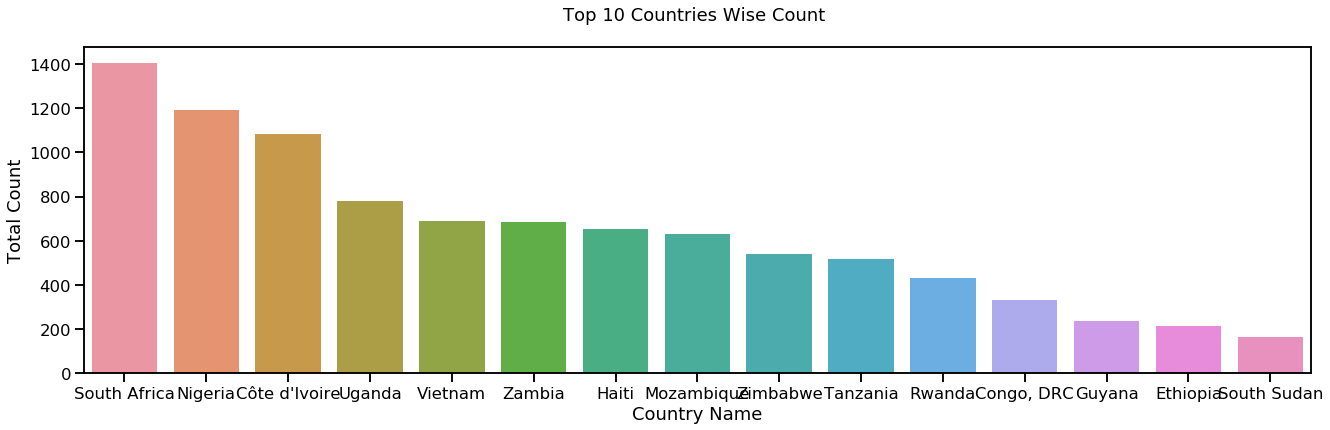

In [81]:
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
 
sn.countplot(scm_df["Country"], order = scm_df['Country'].value_counts().nlargest(15).index)

#sn.countplot(scm_df["Country"].head(5))
 
#countrywise_orders 
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

# Total Line Item Value for Top 15 Countries with graph

In [82]:
countrywise_total_LineItemValue = scm_df.groupby(['Country'])['Line Item Value'].sum().nlargest(15)
countrywise_total_LineItemValue


Country
Nigeria               350,272,104.87
Zambia                246,988,840.41
Mozambique            182,024,690.72
Tanzania              129,459,495.65
Côte d'Ivoire         120,884,500.89
South Africa          108,670,145.47
Zimbabwe              104,439,960.51
Uganda                 96,197,336.16
Rwanda                 71,127,583.08
Vietnam                56,974,405.86
Haiti                  43,502,785.90
Kenya                  33,931,560.98
Ethiopia               19,146,998.67
Cameroon               14,629,170.19
Ghana                   6,453,281.10
Name: Line Item Value, dtype: float64

Text(0.5, 0, 'Country')

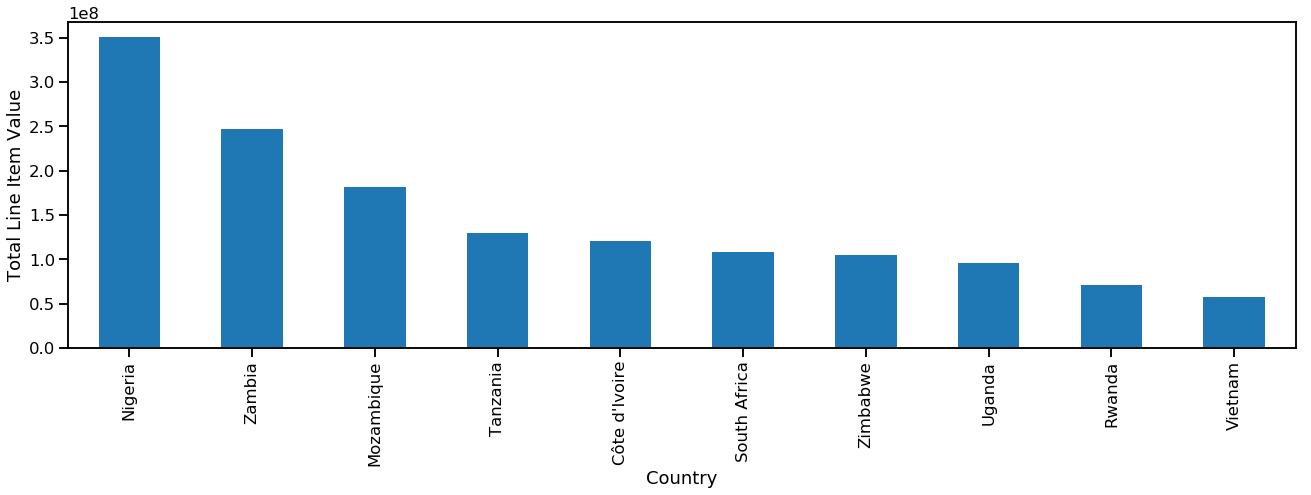

In [83]:
plt.figure(figsize=(22,6))
GraphData=scm_df.groupby(['Country'])['Line Item Value'].sum().nlargest(10)
GraphData.plot(kind='bar')
plt.ylabel('Total Line Item Value')
plt.xlabel('Country')

# Analysis of Different Shipment Modes Used

In [84]:
shimentmode_counts = scm_df['Shipment Mode'].value_counts()
shimentmode_counts

Air            6113
Truck          2830
Air Charter     650
Ocean           371
0               360
Name: Shipment Mode, dtype: int64

Text(0.5, 0, 'Shipment Mode')

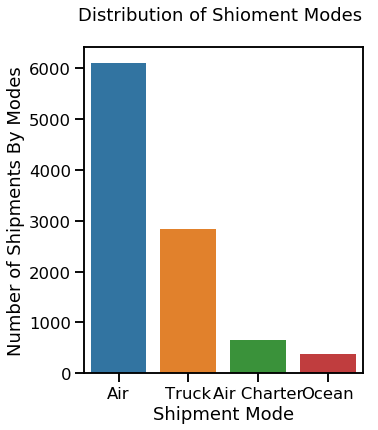

In [85]:
# First Line Designation Wise Count
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(5,6))
 
sn.countplot(scm_df['Shipment Mode'],order = scm_df['Shipment Mode'].value_counts().nlargest(4).index)
plt.title('Distribution of Shioment Modes \n')
plt.ylabel('Number of Shipments By Modes')
plt.xlabel('Shipment Mode')

# Analysis of Sub-Classification of Product Groups 

In [86]:
scm_df.head()

ID Project Code            PQ #   PO / SO #  ASN/DN #       Country  \
0   62   102-NG-T01  Pre-PQ Process    SCMS-230   ASN-144       Nigeria   
1   68   113-ZW-T01  Pre-PQ Process    SCMS-308   ASN-285      Zimbabwe   
2   69   102-NG-T01  Pre-PQ Process    SCMS-354   ASN-608       Nigeria   
3  262   116-ZA-T01  Pre-PQ Process  SCMS-14050  ASN-1251  South Africa   
4  305   123-NG-T01  Pre-PQ Process  SCMS-15550  ASN-1269       Nigeria   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              CIP           Air   
2   PMO - US  Direct Drop              CIP             0   
3   PMO - US  Direct Drop              DDP             0   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                1-Oct-07   
1               Pre-PQ Process              1/10/2007               19-Mar-07   
2               Pre-PQ Process      Date Not Captured                5-Jul-07   
3               Pre-PQ Process             11/12/2007               29-Jan-08   
4               Pre-PQ Process      Date Not Captured                2-May-08   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0               2007-01-10              10-Jan-07          HRDT   
1               2007-03-19              19-Mar-07           ARV   
2               2007-05-07               7-May-07          HRDT   
3               2008-01-29              29-Jan-08           ARV   
4               2008-02-05               5-Feb-08          HRDT   

     Sub Classification                   Vendor  \
0              HIV test          EY Laboratories   
1             Pediatric     BRISTOL-MYERS SQUIBB   
2              HIV test   ACCOUN NIGERIA LIMITED   
3             Pediatric  JSI R&T INSTITUTE, INC.   
4  HIV test - Ancillary            Orgenics, Ltd   

                                    Item Description  \
0        HIV 1/2, InstantChek HIV 1+2 Kit, 100 Tests   
1  #102198**Didanosine 200mg [Videx], tablets, 60...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3  Zidovudine 10mg/ml [Retrovir], oral solution, ...   
4    HIV, Lancet, Safety, for HIV Test kits, 100 Pcs   

                                Molecule/Test Type        Brand   Dosage  \
0                 HIV 1/2, InstantChek HIV 1+2 Kit  InstantCHEK        0   
1                                       Didanosine        Videx    200mg   
2              HIV 1/2, Determine Complete HIV Kit    Determine        0   
3                                       Zidovudine     Retrovir  10mg/ml   
4  HIV, Lancet, Safety, for HIV Test kits, 100 Pcs      Generic        0   

            Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0              Test kit                         100                  10   
1                Tablet                          60                 579   
2              Test kit                         100                1500   
3         Oral solution                         200                  40   
4  Test kit - Ancillary                         100                 650   

       Line Item Value           Pack Price           Unit Price  \
0               850.00                85.00                 0.85   
1            14,764.50                25.50                 0.42   
2           120,000.00                80.00                 0.80   
3               317.60                 7.94                 0.04   
4                 6.50                 0.01                 0.00   

           Unnamed: 28             Manufacturing Site First Line Designation  \
0                 0.00           EY Laboratories, USA                    Yes   
1                 0.00             BMS Meymac, France                    Yes   
2                 0.00  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3              

In [87]:

Sub_Classification = scm_df["Sub Classification"].value_counts().nlargest(3)
labels = (np.array(Sub_Classification.index))
sizes = (np.array((Sub_Classification  / Product_Groups.sum())*100))

trace = go.Pie(labels=labels, values=sizes, )
layout = go.Layout(title="Sub-Classification of Product Groups")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Product Group")

NameError: name 'Product_Groups' is not defined

# Percentage of Vendor INCO Terms

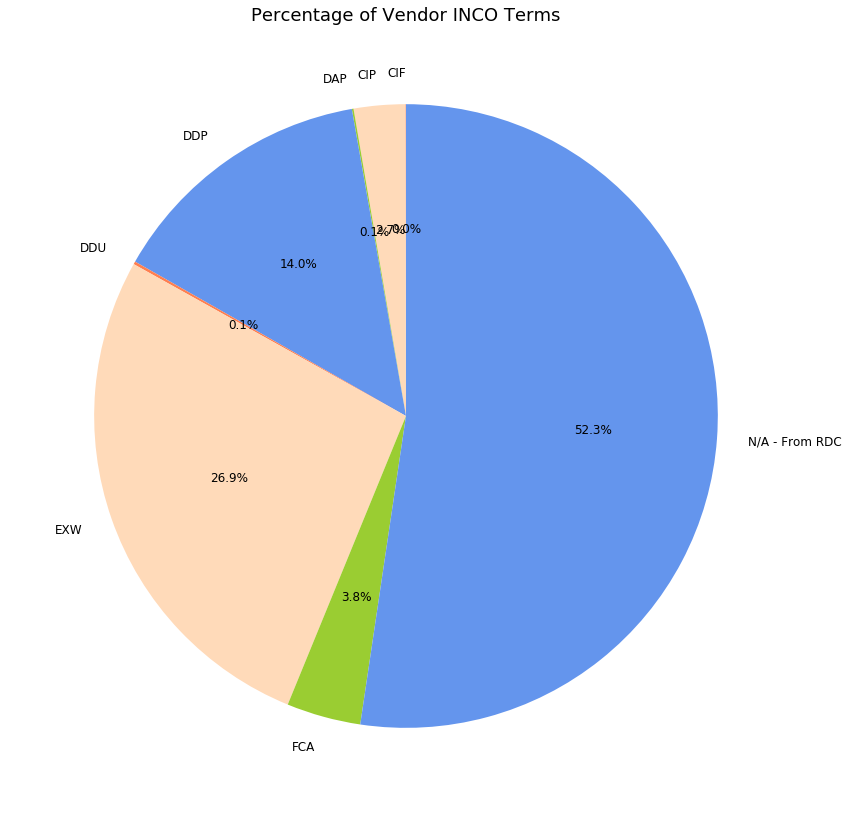

In [88]:
plt.figure(figsize=(12,12))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
#plt.pie(PartBsample.groupby(['FoodCuisineType']).NumberOfOrders.sum(),
 #   labels=PartBsample.groupby(['FoodCuisineType']).NumberOfOrders.sum().index,
    
plt.pie(scm_df.groupby(['Vendor INCO Term'])['Vendor INCO Term'].count(),
   labels=scm_df.groupby(['Vendor INCO Term'])['Vendor INCO Term'].count().index,
        
    shadow=False,
    colors=colors,
    #explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Percentage of Vendor INCO Terms')
plt.tight_layout()
plt.show()

In [89]:
scm_df.head()

ID Project Code            PQ #   PO / SO #  ASN/DN #       Country  \
0   62   102-NG-T01  Pre-PQ Process    SCMS-230   ASN-144       Nigeria   
1   68   113-ZW-T01  Pre-PQ Process    SCMS-308   ASN-285      Zimbabwe   
2   69   102-NG-T01  Pre-PQ Process    SCMS-354   ASN-608       Nigeria   
3  262   116-ZA-T01  Pre-PQ Process  SCMS-14050  ASN-1251  South Africa   
4  305   123-NG-T01  Pre-PQ Process  SCMS-15550  ASN-1269       Nigeria   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              CIP           Air   
2   PMO - US  Direct Drop              CIP             0   
3   PMO - US  Direct Drop              DDP             0   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                1-Oct-07   
1               Pre-PQ Process              1/10/2007               19-Mar-07   
2               Pre-PQ Process      Date Not Captured                5-Jul-07   
3               Pre-PQ Process             11/12/2007               29-Jan-08   
4               Pre-PQ Process      Date Not Captured                2-May-08   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0               2007-01-10              10-Jan-07          HRDT   
1               2007-03-19              19-Mar-07           ARV   
2               2007-05-07               7-May-07          HRDT   
3               2008-01-29              29-Jan-08           ARV   
4               2008-02-05               5-Feb-08          HRDT   

     Sub Classification                   Vendor  \
0              HIV test          EY Laboratories   
1             Pediatric     BRISTOL-MYERS SQUIBB   
2              HIV test   ACCOUN NIGERIA LIMITED   
3             Pediatric  JSI R&T INSTITUTE, INC.   
4  HIV test - Ancillary            Orgenics, Ltd   

                                    Item Description  \
0        HIV 1/2, InstantChek HIV 1+2 Kit, 100 Tests   
1  #102198**Didanosine 200mg [Videx], tablets, 60...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3  Zidovudine 10mg/ml [Retrovir], oral solution, ...   
4    HIV, Lancet, Safety, for HIV Test kits, 100 Pcs   

                                Molecule/Test Type        Brand   Dosage  \
0                 HIV 1/2, InstantChek HIV 1+2 Kit  InstantCHEK        0   
1                                       Didanosine        Videx    200mg   
2              HIV 1/2, Determine Complete HIV Kit    Determine        0   
3                                       Zidovudine     Retrovir  10mg/ml   
4  HIV, Lancet, Safety, for HIV Test kits, 100 Pcs      Generic        0   

            Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0              Test kit                         100                  10   
1                Tablet                          60                 579   
2              Test kit                         100                1500   
3         Oral solution                         200                  40   
4  Test kit - Ancillary                         100                 650   

       Line Item Value           Pack Price           Unit Price  \
0               850.00                85.00                 0.85   
1            14,764.50                25.50                 0.42   
2           120,000.00                80.00                 0.80   
3               317.60                 7.94                 0.04   
4                 6.50                 0.01                 0.00   

           Unnamed: 28             Manufacturing Site First Line Designation  \
0                 0.00           EY Laboratories, USA                    Yes   
1                 0.00             BMS Meymac, France                    Yes   
2                 0.00  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3              

# Analyzing Manufacturing Sites

In [90]:
Unique_Manufacturing_Sites = scm_df['Manufacturing Site'].unique()
print("All Unique Manufacturing Site \n")
print(Unique_Manufacturing_Sites)

All Unique Manufacturing Site 

['EY Laboratories, USA' 'BMS Meymac, France'
 'ABBVIE GmbH & Co.KG Wiesbaden' 'GSK Mississauga (Canada)'
 'Inverness Japan' 'Trinity Biotech, Plc' 'Roche Basel' 'GSK Ware (UK)'
 'BI, Ingelheim, Germany' 'MSD, Haarlem, NL'
 'Aspen-OSD, Port Elizabeth, SA' 'ABBVIE (Abbott) Logis. UK'
 'Not Applicable' 'Aurobindo Unit III, India' 'Cipla, Goa, India'
 'ABBVIE Ludwigshafen Germany' 'GSK Aranda' 'Pacific Biotech, Thailand'
 'ABBVIE (Abbott) France' 'GSK Cape Town Factory (South Africa)'
 "MSD Midrand, J'burg, SA" 'bioLytical Laboratories'
 'Boehringer Ing., Koropi, GR' 'Chembio Diagnostics Sys. Inc.'
 'GSK Crawley' 'BUNDI INTERNATIONAL DIAGNOSTICS LTD'
 'Gilead(Nycomed) Oranienburg DE' 'ABBVIE (Abbott) Japan Co. Ltd.'
 'MSD Elkton USA' 'Standard Diagnostics, Korea'
 'Mylan (formerly Matrix) Nashik' 'Premier Med. Corp Ltd. India'
 'Ranbaxy, Paonta Shahib, India' 'Strides, Bangalore, India.'
 'MSD Manati, Puerto Rico, (USA)' 'ABBVIE Labs North Chicago US'
 'Aler

In [91]:
print("Sum of Unique Manufacturing Sites ", len(scm_df['Manufacturing Site'].unique()))

Sum of Unique Manufacturing Sites  88


# Analysis of Per Pack Cost of Air shipments

In [92]:
ItemData=DataSet[scm_df['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",scm_df['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",scm_df['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

NameError: name 'DataSet' is not defined

# Total 6113 Shipments Made By Air 

In [93]:
total_air_shipments = scm_df[scm_df['Shipment Mode'] == 'Air']
total_air_shipments 

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
7        398   102-GY-T01  Pre-PQ Process   SCMS-18480   ASN-1502   
12       465   102-NG-T01  Pre-PQ Process   SCMS-21540   ASN-2011   
13       466   117-ET-T01  Pre-PQ Process   SCMS-21550   ASN-1741   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
20       772   131-NG-T01  Pre-PQ Process   SCMS-30502   ASN-3653   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
27      1063   116-ZA-T01  Pre-PQ Process   SCMS-40810   ASN-3634   
28      1065   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
29      1066   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
30      1067   116-ZA-T01  Pre-PQ Process   SCMS-41060   ASN-3624   
31      1068   116-ZA-T01  Pre-PQ Process   SCMS-41070   ASN-3625   
32      1070   116-ZA-T01  Pre-PQ Process   SCMS-41140   ASN-3752   
33      1077   116-ZA-T01  Pre-PQ Process   SCMS-41462   ASN-4361   
35      1079   116-ZA-T01  Pre-PQ Process   SCMS-41464   ASN-4634   
37      1084   116-ZA-T01  Pre-PQ Process   SCMS-41581   ASN-4196   
38      1085   116-ZA-T01  Pre-PQ Process   SCMS-41589   ASN-4358   
39      1086   116-ZA-T01  Pre-PQ Process   SCMS-41584   ASN-4385   
46      1303   117-ET-T01  Pre-PQ Process     SCMS-284    ASN-168   
47      1350   104-CI-T01  Pre-PQ Process     SCMS-698    ASN-727   
50      1531   100-KZ-T01  Pre-PQ Process   SCMS-14770   ASN-1061   
52      1643   104-CI-T01  Pre-PQ Process   SCMS-18420   ASN-1469   
53      1660   113-ZW-T01  Pre-PQ Process   SCMS-18870   ASN-2435   
60      1730   102-NG-T01  Pre-PQ Process   SCMS-21580   ASN-1797   
71      2148   113-ZW-T01  Pre-PQ Process   SCMS-32660   ASN-3228   
76      2429   116-ZA-T01  Pre-PQ Process   SCMS-40780   ASN-3607   
77      2430   116-ZA-T01  Pre-PQ Process   SCMS-40790   ASN-3575   
...      ...          ...             ...          ...        ...   
10287  67372   144-BW-T30        FPQ-4167   SCMS-54120   ASN-8574   
10288  69198   144-BW-T30        FPQ-4167   SCMS-54100   ASN-7209   
10289  70212   144-BW-T30        FPQ-4167   SCMS-54070   ASN-7749   
10290  73089   105-GY-T30       FPQ-10249  SCMS-153870  ASN-17103   
10291  75595   122-HT-T30        FPQ-8671  SCMS-131030  ASN-13447   
10292  82901   151-NG-T30        FPQ-5023     SO-36505    DN-1918   
10293  83370   154-NG-T30        FPQ-3815     SO-32274    DN-1364   
10295  84705   101-CD-T30        FPQ-8840     SO-41384    DN-2525   
10296  84707   101-CD-T30        FPQ-8840     SO-41386    DN-2527   
10298  86236   154-NG-T30        FPQ-3815     SO-32271    DN-1312   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10305  11079   151-NG-T30  Pre-PQ Process     SO-35330    DN-1615   
10306  11282   112-NG-T01  Pre-PQ Process     SO-19430    DN-1063   
10307  12543   114-UG-T01  Pre-PQ Process     SO-17911    DN-1094   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  55053   105-GY-T30       FPQ-12057  SCMS-189040  ASN-19842   
10314  55520   117-ET-T30        FPQ-9096  SCMS-133390  ASN-13875   
10315  61882   161-ZA-T30        FPQ-5303   SCMS-68950   ASN-7130   
10316  63296   144-BW-T30        FPQ-4487   SCMS-57521   ASN-8573   
10317  82447   101-CD-T30        FPQ-8840     SO-41382    DN-2530   
10319  8

In [94]:
print("Total number of air shipments made is ", len(total_air_shipments))

Total number of air shipments made is  6113


# Analysis of Pack Price 

In [95]:
#avg_pack_price = scm_df['Pack Price'].head().mean()
avg_pack_price = scm_df['Pack Price'].mean()
print("Average Pack Price is ",  avg_pack_price)

Average Pack Price is  21.910241185587015


In [96]:
highest_pack_price = scm_df['Pack Price'].max()
print("Highest Pack Price is ",  highest_pack_price)

Highest Pack Price is  1345.64


In [97]:
scm_df['Pack Price'].head()

0                  85.00
1                  25.50
2                  80.00
3                   7.94
4                   0.01
Name: Pack Price, dtype: float64

# Top 10 Manufacturing Site for all Shipment Mode with Graph


In [98]:
TopTenManufacturingSite=DataSet.groupby('Manufacturing Site').size().nlargest(10)
TopTenManufacturingSite

NameError: name 'DataSet' is not defined

In [99]:
    #OR the same result can be drawn from the following code
    TopFiveManufacturingSite1 = scm_df['Manufacturing Site'].value_counts().nlargest(5)
    TopFiveManufacturingSite1

Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Name: Manufacturing Site, dtype: int64

Text(0.5, 0, 'Manufacturing Site Name')

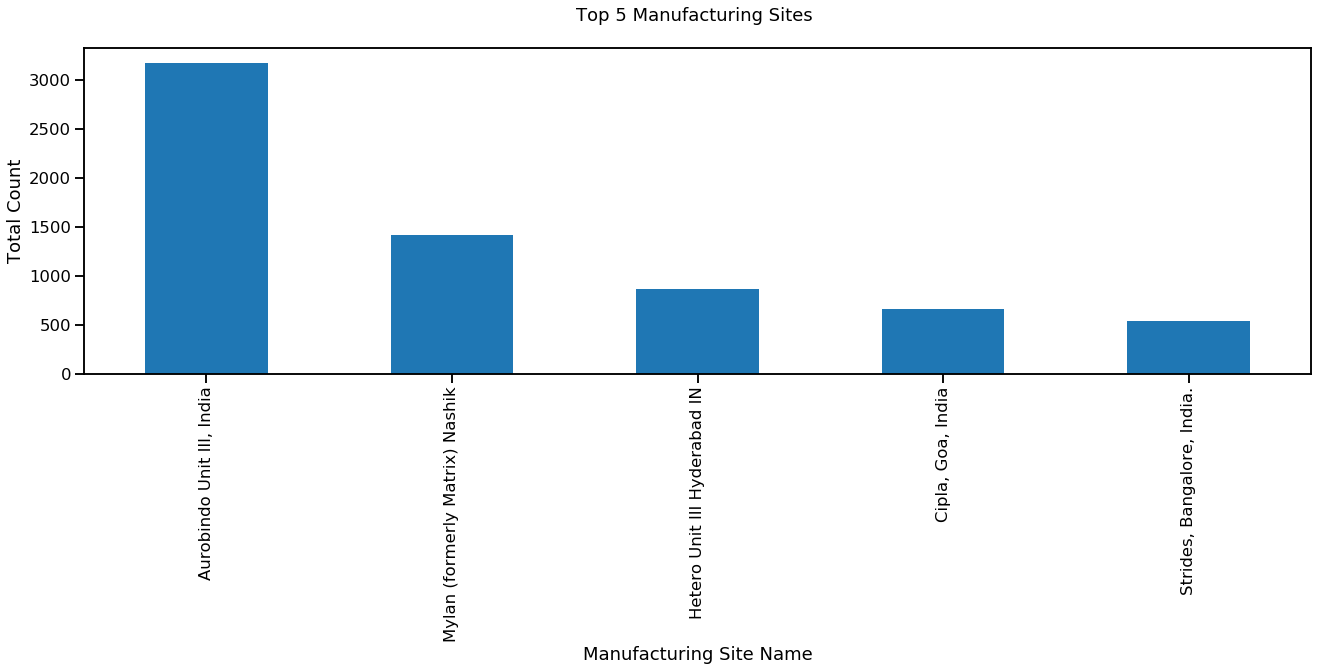

In [100]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite1.plot(kind='bar')
plt.title('Top 5 Manufacturing Sites \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

In [101]:
scm_df.head(5)

ID Project Code            PQ #   PO / SO #  ASN/DN #       Country  \
0   62   102-NG-T01  Pre-PQ Process    SCMS-230   ASN-144       Nigeria   
1   68   113-ZW-T01  Pre-PQ Process    SCMS-308   ASN-285      Zimbabwe   
2   69   102-NG-T01  Pre-PQ Process    SCMS-354   ASN-608       Nigeria   
3  262   116-ZA-T01  Pre-PQ Process  SCMS-14050  ASN-1251  South Africa   
4  305   123-NG-T01  Pre-PQ Process  SCMS-15550  ASN-1269       Nigeria   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              CIP           Air   
2   PMO - US  Direct Drop              CIP             0   
3   PMO - US  Direct Drop              DDP             0   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                1-Oct-07   
1               Pre-PQ Process              1/10/2007               19-Mar-07   
2               Pre-PQ Process      Date Not Captured                5-Jul-07   
3               Pre-PQ Process             11/12/2007               29-Jan-08   
4               Pre-PQ Process      Date Not Captured                2-May-08   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0               2007-01-10              10-Jan-07          HRDT   
1               2007-03-19              19-Mar-07           ARV   
2               2007-05-07               7-May-07          HRDT   
3               2008-01-29              29-Jan-08           ARV   
4               2008-02-05               5-Feb-08          HRDT   

     Sub Classification                   Vendor  \
0              HIV test          EY Laboratories   
1             Pediatric     BRISTOL-MYERS SQUIBB   
2              HIV test   ACCOUN NIGERIA LIMITED   
3             Pediatric  JSI R&T INSTITUTE, INC.   
4  HIV test - Ancillary            Orgenics, Ltd   

                                    Item Description  \
0        HIV 1/2, InstantChek HIV 1+2 Kit, 100 Tests   
1  #102198**Didanosine 200mg [Videx], tablets, 60...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3  Zidovudine 10mg/ml [Retrovir], oral solution, ...   
4    HIV, Lancet, Safety, for HIV Test kits, 100 Pcs   

                                Molecule/Test Type        Brand   Dosage  \
0                 HIV 1/2, InstantChek HIV 1+2 Kit  InstantCHEK        0   
1                                       Didanosine        Videx    200mg   
2              HIV 1/2, Determine Complete HIV Kit    Determine        0   
3                                       Zidovudine     Retrovir  10mg/ml   
4  HIV, Lancet, Safety, for HIV Test kits, 100 Pcs      Generic        0   

            Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0              Test kit                         100                  10   
1                Tablet                          60                 579   
2              Test kit                         100                1500   
3         Oral solution                         200                  40   
4  Test kit - Ancillary                         100                 650   

       Line Item Value           Pack Price           Unit Price  \
0               850.00                85.00                 0.85   
1            14,764.50                25.50                 0.42   
2           120,000.00                80.00                 0.80   
3               317.60                 7.94                 0.04   
4                 6.50                 0.01                 0.00   

           Unnamed: 28             Manufacturing Site First Line Designation  \
0                 0.00           EY Laboratories, USA                    Yes   
1                 0.00             BMS Meymac, France                    Yes   
2                 0.00  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3              

# Analysis of Fulfillment

In [102]:
scm_df['Fulfill Via'].value_counts()

From RDC       5404
Direct Drop    4920
Name: Fulfill Via, dtype: int64

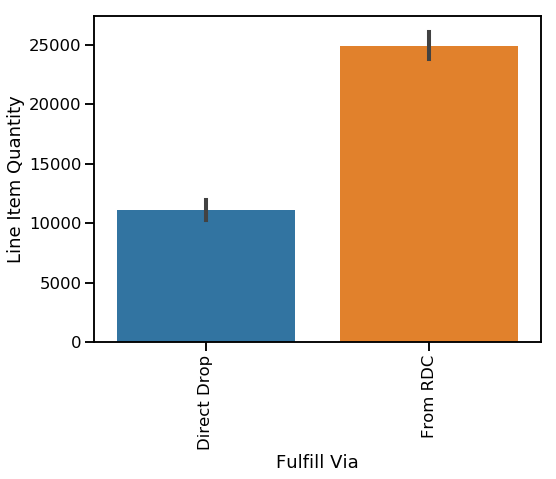

In [103]:
plt.subplots(figsize = (8,6))
plt.xticks(rotation = 90)
sn.barplot('Fulfill Via','Line Item Quantity', data = scm_df)
plt.show()

In [104]:
scm_df['Line Item Value'].sum()


1627584457.29

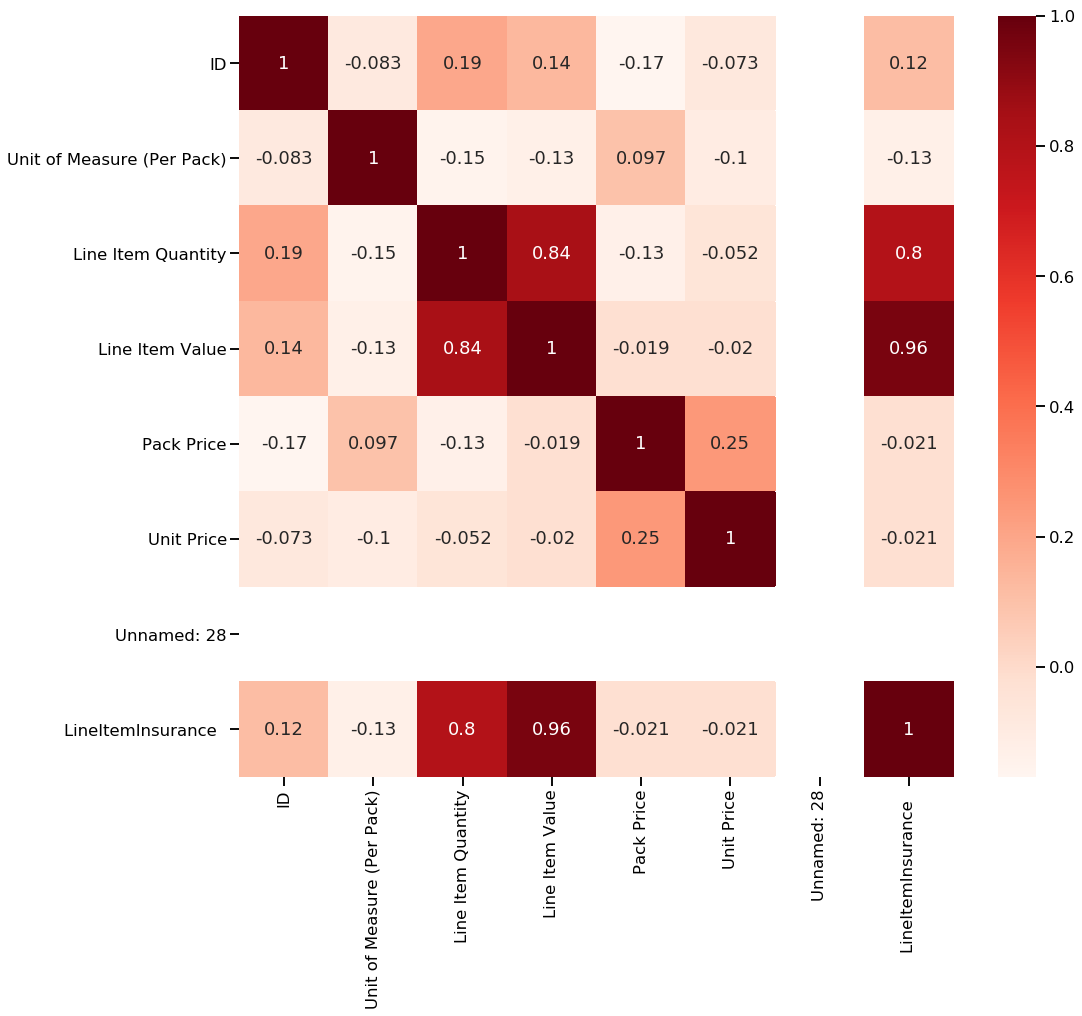

In [105]:
plt.figure(figsize=(16,14))
sns.heatmap(scm_df.corr(),annot=True, square=False, cmap='Reds')

# Analysis of Sub Classification of Product Groups

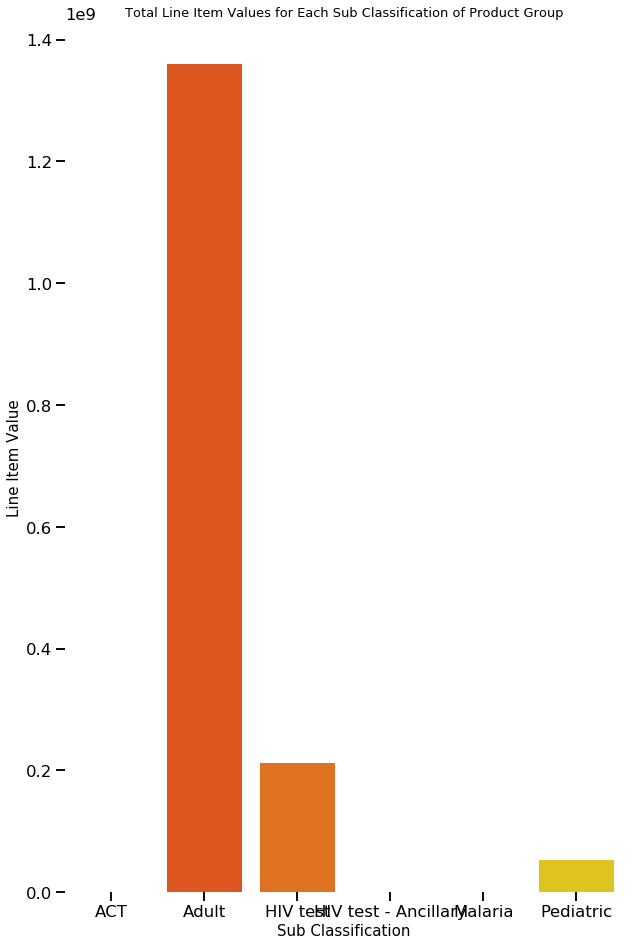

In [106]:
fig=plt.figure(figsize=(10,16))
plt.title('Total Line Item Values for Each Sub Classification of Product Group',fontdict={'fontsize':13})
sns.barplot(y='Line Item Value', x='Sub Classification', data=scm_df.groupby('Sub Classification').sum()['Line Item Value'].reset_index(),palette='autumn');
plt.ylabel('Line Item Value',fontdict={'fontsize':15})
plt.xlabel('Sub Classification',fontdict={'fontsize':15})
sns.despine(bottom = True, left = True);

In [107]:
scm_df

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
2         69   102-NG-T01  Pre-PQ Process     SCMS-354    ASN-608   
3        262   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   
5        343   116-ZA-T01  Pre-PQ Process   SCMS-16600   ASN-1520   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
7        398   102-GY-T01  Pre-PQ Process   SCMS-18480   ASN-1502   
8        400   117-ET-T01  Pre-PQ Process   SCMS-18430   ASN-1465   
9        422   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
10       423   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
12       465   102-NG-T01  Pre-PQ Process   SCMS-21540   ASN-2011   
13       466   117-ET-T01  Pre-PQ Process   SCMS-21550   ASN-1741   
14       531   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2783   
15       532   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
16       533   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
17       598   116-ZA-T01  Pre-PQ Process   SCMS-25540   ASN-2295   
18       646   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
20       772   131-NG-T01  Pre-PQ Process   SCMS-30502   ASN-3653   
21       835   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
22       836   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3892   
23       837   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
24       838   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
25       839   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
27      1063   116-ZA-T01  Pre-PQ Process   SCMS-40810   ASN-3634   
28      1065   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
29      1066   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
...      ...          ...             ...          ...        ...   
10294  84539   151-NG-T30        FPQ-4537     SO-35041    DN-1701   
10295  84705   101-CD-T30        FPQ-8840     SO-41384    DN-2525   
10296  84707   101-CD-T30        FPQ-8840     SO-41386    DN-2527   
10297  84931   151-NG-T30       FPQ-13293     SO-47300    DN-3720   
10298  86236   154-NG-T30        FPQ-3815     SO-32271    DN-1312   
10299  86284   151-NG-T30        FPQ-4537     SO-35120    DN-1741   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10302  10576   104-CI-T01  Pre-PQ Process       SO-781     DN-245   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10304  11077   151-NG-T30  Pre-PQ Process     SO-35150    DN-1594   
10305  11079   151-NG-T30  Pre-PQ Process     SO-35330    DN-1615   
10306  11282   112-NG-T01  Pre-PQ Process     SO-19430    DN-1063   
10307  12543   114-UG-T01  Pre-PQ Process     SO-17911    DN-1094   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  55053   105-GY-T30       FPQ-12057  SCMS-189040  ASN-19842   
10314  55520   117-ET-T30        FPQ-9096  SCMS-133390  ASN-13875   
10315  61882   161-ZA-T30        FPQ-5303   SCMS-68950   ASN-7130   
10316  63296   144-BW-T30        FPQ-4487   SCMS-57521   ASN-8573   
10317  82447   101-CD-T30        FPQ-8840     SO-41382    DN-2530   
10318  82850   110-ZM-T30        FPQ-4029     SO-34620    DN-1566   
10319  84142   101-CD-T30        FPQ-8840     SO-41383    DN-2524   
10320  8

In [108]:
#Line Item Insurance: Y/N

scm_df['Line Item Insurance Y/N'] = [1 if x>0 else 0 for x in scm_df['LineItemInsurance]]
#scm_df['Line Item Insurance Y/N']
##Discount Y/N
#fod['discount y/n'] = [1 if x>0 else 0 for x in (fod['BasePrice']- fod['CheckOutPrice'])]

SyntaxError: EOL while scanning string literal (<ipython-input-108-941e8cf7bc16>, line 3)

In [ ]:
scm_df.info()

In [ ]:
#Sort /Arrange data and reset index
scm_df=scm_df.sort_values(['Line Item Value', 'Pack Price']).reset_index()
scm_df

In [ ]:
scm_df[['Project Code']].nunique()

# Analysis of Line Item Values and Line Item Quantities

In [ ]:
totalLIV = scm_df['Line Item Value'].sum(axis=0,skipna=False)
totalLIV

In [ ]:
Filter = scm_df['Project Code'] == '102-ZW-T30'
scm_df[Filter].head()

In [109]:
pcdLIV = scm_df[['Project Code', 'Line Item Value']].groupby('Project Code').agg(sum)
pcdLIV.head()

Line Item Value
Project Code                     
100-BJ-T30             679,693.48
100-BW-T01              40,416.00
100-BZ-T30                 630.00
100-CI-T01           2,218,824.75
100-DO-T30             304,872.12

In [110]:
pcdLIQ = scm_df[['Project Code', 'Line Item Quantity']].groupby('Project Code').agg(sum)
pcdLIQ.head()

Line Item Quantity
Project Code                    
100-BJ-T30                134245
100-BW-T01                   768
100-BZ-T30                   300
100-CI-T01                174161
100-DO-T30                 18604

In [111]:
pcdLIVsorted = scm_df[['Project Code', 'Line Item Value']].groupby('Project Code').agg(sum).sort_values(by=['Line Item Value'],
                    ascending=False).reset_index()
pcdLIVsorted.head()

Project Code      Line Item Value
0   151-NG-T30       248,576,305.21
1   110-ZM-T30       168,229,439.44
2   111-MZ-T30       153,069,123.79
3   161-ZA-T30        96,452,057.08
4   104-CI-T30        96,335,878.52

In [112]:
pcdLIVsorted = scm_df[['Project Code', 'Line Item Quantity']].groupby('Project Code').agg(sum).sort_values(by=['Line Item Quantity'], 
                                                        ascending=False).reset_index()
pcdLIVsorted.head()

Project Code  Line Item Quantity
0   151-NG-T30            30015631
1   161-ZA-T30            21903047
2   110-ZM-T30            21043641
3   111-MZ-T30            16187365
4   113-ZW-T30            11345867

In [113]:
SC_PG_LIV = scm_df.groupby(['Sub Classification','Product Group'])['Line Item Value'].sum().sort_values(ascending=False).
reset_index().head(20)
SC_PG_LIV

SyntaxError: invalid syntax (<ipython-input-113-6a874d84c9bb>, line 1)

In [114]:
SC_PG_LIQ = scm_df.groupby(['Sub Classification','Product Group'])['Line Item Quantity'].sum().sort_values(ascending=False).
reset_index().head(20)
SC_PG_LIQ

SyntaxError: invalid syntax (<ipython-input-114-266af8ee1d14>, line 1)

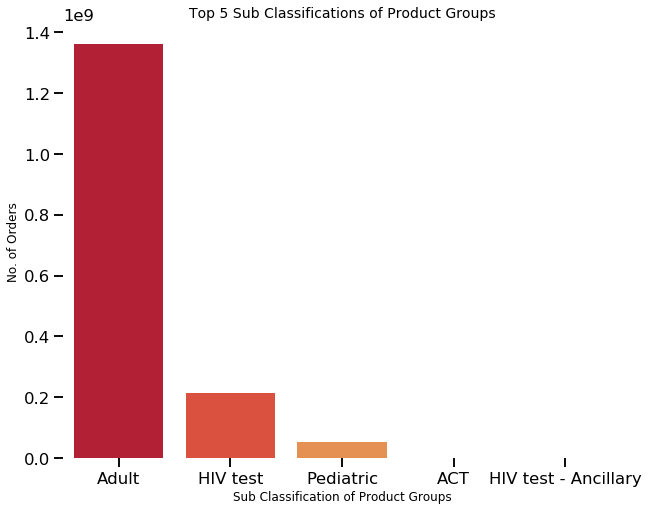

In [115]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 5 Sub Classifications of Product Groups',fontdict={'fontsize':14})
sns.barplot(y='Line Item Value', x='Sub Classification', data=scm_df.groupby(['Sub Classification','Product Group'])
            ['Line Item Value'].sum().sort_values( ascending=False).reset_index().head(5),palette='YlOrRd_r')
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Sub Classification of Product Groups',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

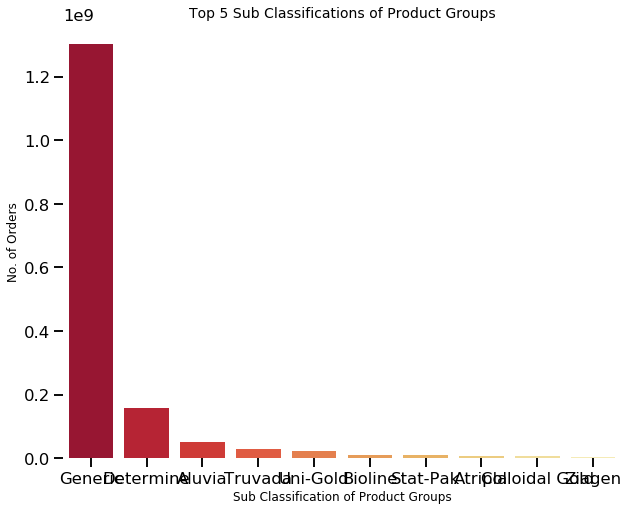

In [116]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 5 Sub Classifications of Product Groups',fontdict={'fontsize':14})
sns.barplot(y='Line Item Value', x='Brand', data=scm_df.groupby(['Brand','Product Group'])['Line Item Value']
            .sum().sort_values( ascending=False).reset_index().head(10),palette='YlOrRd_r')
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Sub Classification of Product Groups',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

In [117]:
scm_df['delivery_year'] =scm_df['Delivered to Client Date'].dt.year 
scm_df['delivery_year'].head(100)
LIVByYear = scm_df[['delivery_year', 'Line Item Value']].groupby('delivery_year').agg(sum)
.sort_values(by=['Line Item Value'], ascending=True).reset_index().head(20)
LIVByYear

SyntaxError: invalid syntax (<ipython-input-117-454ebaa555cb>, line 4)

In [ ]:
scm_df['delivery_year'] =scm_df['Delivered to Client Date'].dt.year 
scm_df['delivery_year'].head(100)
LIQByYear = scm_df[['delivery_year', 'Line Item Quantity']].groupby('delivery_year').agg(sum)
.sort_values(by=['Line Item Quantity'], ascending=True).reset_index().head(20)
LIQByYear

In [ ]:
scm_df['delivery_year'] =scm_df['Delivered to Client Date'].dt.year 
scm_df['delivery_year'].head(100)

fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern Line Item Value',fontdict={'fontsize':14})

sns.pointplot(x=scm_df.groupby('delivery_year').sum().reset_index()['delivery_year'],y=scm_df.groupby('delivery_year')
              .sum().reset_index()['Line Item Value'],color='coral')
#plt.xticks(range(0, 150, 10), list(np.arange(0,160,10)))
plt.ylabel('Line Item Value',fontdict={'fontsize':12})
plt.xlabel('Year',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

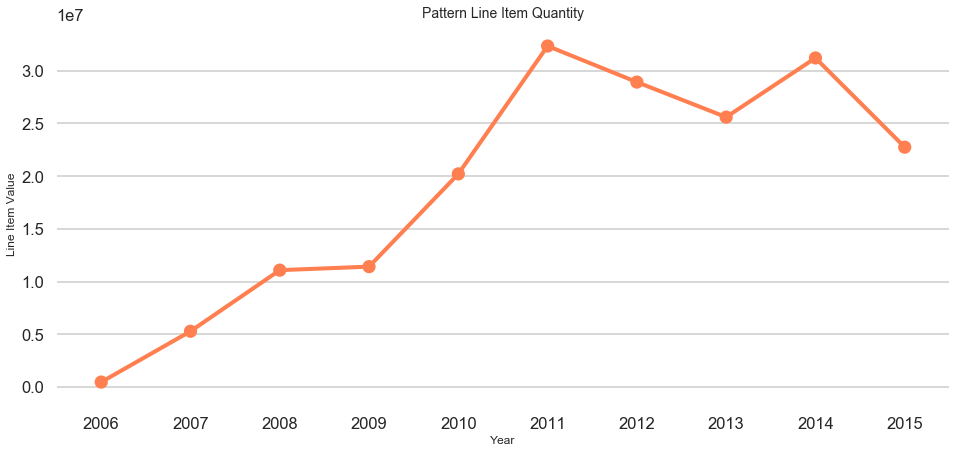

In [118]:
scm_df['delivery_year'] =scm_df['Delivered to Client Date'].dt.year 
scm_df['delivery_year'].head(100)

fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern Line Item Quantity',fontdict={'fontsize':14})

sns.pointplot(x=scm_df.groupby('delivery_year').sum().reset_index()['delivery_year'],y=scm_df.groupby('delivery_year').
              sum().reset_index()['Line Item Quantity'],color='coral')
#plt.xticks(range(0, 150, 10), list(np.arange(0,160,10)))
plt.ylabel('Line Item Value',fontdict={'fontsize':12})
plt.xlabel('Year',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

In [119]:
scm_df.groupby(['Product Group'])['Line Item Value'].sum()

Product Group
ACT              664,380.94
ANTM             274,176.56
ARV        1,413,220,072.88
HRDT         213,344,761.81
MRDT              81,065.10
Name: Line Item Value, dtype: float64

In [120]:
scm_df.groupby(['Product Group'])['Line Item Quantity'].sum()

Product Group
ACT        134286
ANTM        21023
ARV     185008389
HRDT      4098414
MRDT         2978
Name: Line Item Quantity, dtype: int64

In [121]:
scm_df[['Product Group','Line Item Quantity']].groupby('Product Group').agg(sum).sort_values(by=['Line Item Quantity'],
                                                                                             ascending=True).reset_index().head(20) 


Product Group  Line Item Quantity
0          MRDT                2978
1          ANTM               21023
2           ACT              134286
3          HRDT             4098414
4           ARV           185008389

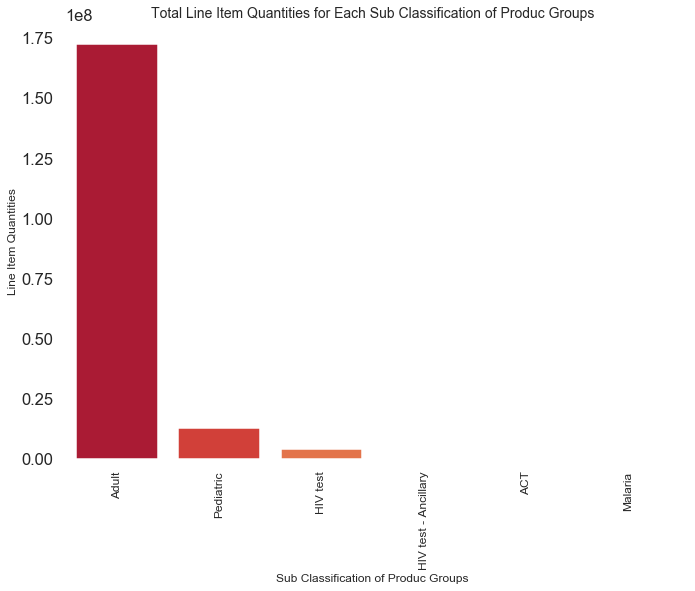

In [122]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Line Item Quantities for Each Sub Classification of Produc Groups',fontdict={'fontsize':14})
sns.barplot(y='Line Item Quantity', x='Sub Classification', data=scm_df.groupby('Sub Classification')['Line Item Quantity'].sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Line Item Quantities',fontdict={'fontsize':12})
plt.xlabel('Sub Classification of Produc Groups',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

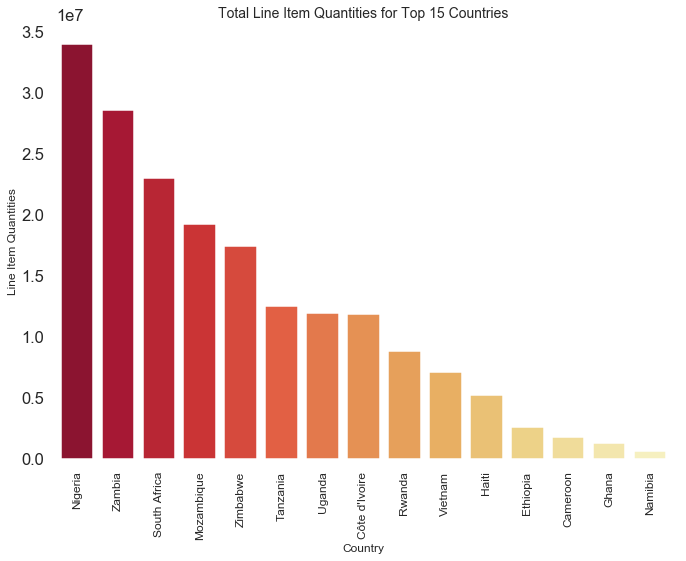

In [123]:
    fig=plt.figure(figsize=(11,8))
    sns.set_style("white")

    plt.xticks(rotation=90,fontsize=12)
    plt.title('Total Line Item Quantities for Top 15 Countries',fontdict={'fontsize':14})
    sns.barplot(y='Line Item Quantity', x='Country', data=scm_df.groupby('Country')['Line Item Quantity']
                .sum().sort_values(ascending=False).head(15).reset_index(),palette='YlOrRd_r');
    plt.ylabel('Line Item Quantities',fontdict={'fontsize':12})
    plt.xlabel('Country',fontdict={'fontsize':12})
    sns.despine(bottom = True, left = True);

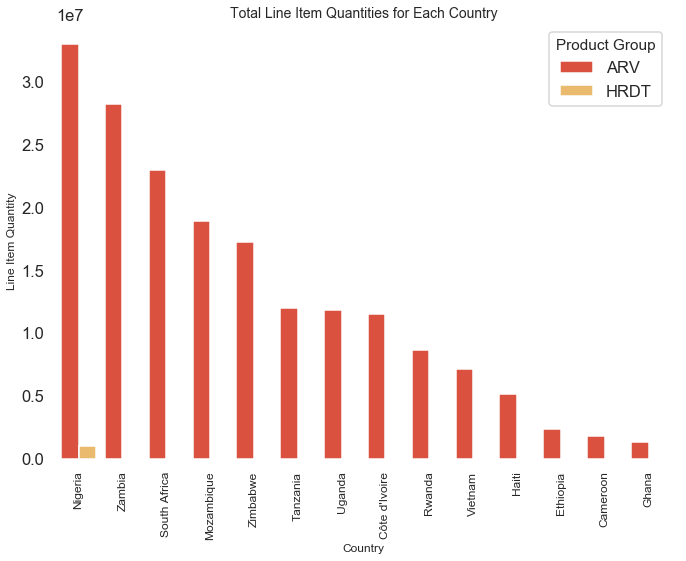

In [124]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Line Item Quantities for Each Country',fontdict={'fontsize':14})
sns.barplot(y='Line Item Quantity', x='Country', data=scm_df.groupby(['Product Group','Country'])
            ['Line Item Quantity'].sum().sort_values(ascending=False).head(15).reset_index(), hue= 'Product Group',palette='YlOrRd_r')
plt.ylabel('Line Item Quantity',fontdict={'fontsize':12})
plt.xlabel('Country',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

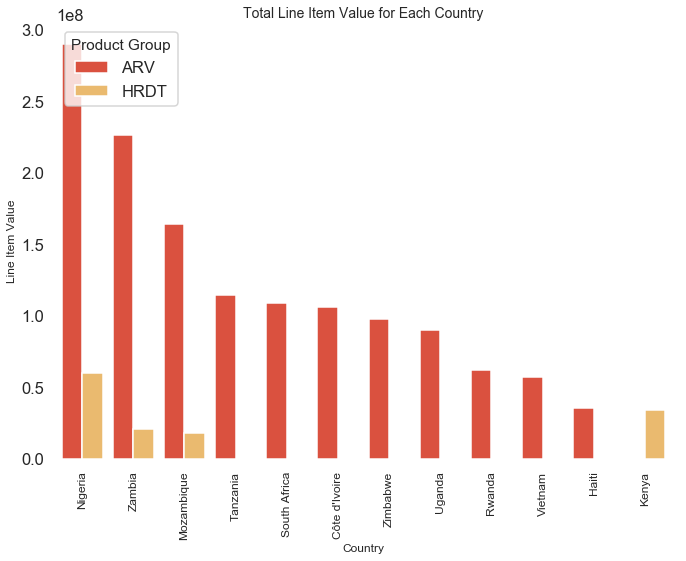

In [125]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Line Item Value for Each Country',fontdict={'fontsize':14})
sns.barplot(y='Line Item Value', x='Country', data=scm_df.groupby(['Product Group','Country'])['Line Item Value']
            .sum().sort_values(ascending=False).head(15).reset_index(), hue= 'Product Group',palette='YlOrRd_r')
plt.ylabel('Line Item Value',fontdict={'fontsize':12})
plt.xlabel('Country',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

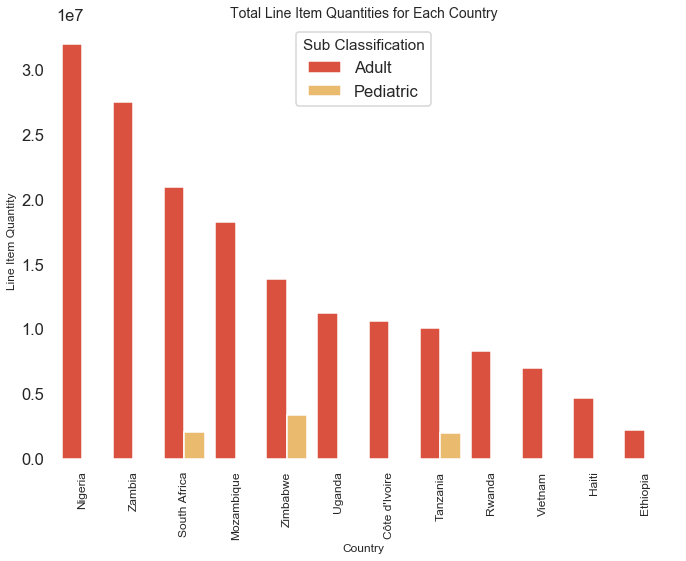

In [126]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Line Item Quantities for Each Country',fontdict={'fontsize':14})
sns.barplot(y='Line Item Quantity', x='Country', data=scm_df.groupby(['Sub Classification','Country'])['Line Item Quantity']
            .sum().sort_values(ascending=False).head(15).reset_index(), hue= 'Sub Classification',palette='YlOrRd_r')
plt.ylabel('Line Item Quantity',fontdict={'fontsize':12})
plt.xlabel('Country',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

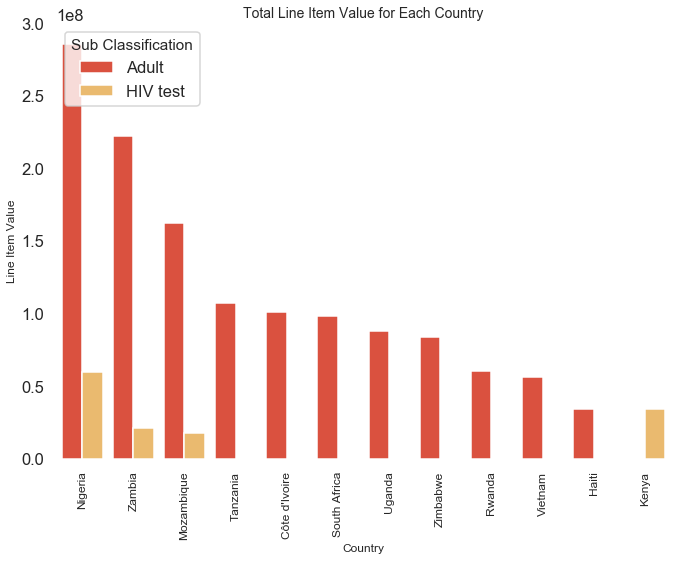

In [127]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Line Item Value for Each Country',fontdict={'fontsize':14})
sns.barplot(y='Line Item Value', x='Country', data=scm_df.groupby(['Sub Classification','Country'])
            ['Line Item Value'].sum().sort_values(ascending=False).head(15).reset_index(), hue= 'Sub Classification',palette='YlOrRd_r')
plt.ylabel('Line Item Value',fontdict={'fontsize':12})
plt.xlabel('Country',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

In [128]:
brandwiseLIV =scm_df.groupby('Brand')['Line Item Value'].sum().sort_values(ascending=False).reset_index()
brandwiseLIV


Brand      Line Item Value
0           Generic     1,302,754,741.20
1         Determine       158,113,743.55
2            Aluvia        50,017,034.72
3           Truvada        28,975,886.65
4          Uni-Gold        22,175,901.11
5           Bioline        11,039,610.90
6          Stat-Pak         8,910,472.69
7           Atripla         7,459,200.00
8    Colloidal Gold         7,325,764.50
9            Ziagen         5,126,634.11
10          Kaletra         3,561,589.13
11         Invirase         2,111,704.31
12         Videx EC         1,924,757.72
13         Crixivan         1,876,519.72
14         OraQuick         1,606,702.50
15         Trizivir         1,465,997.98
16           Viread         1,435,290.77
17            Genie         1,316,838.65
18  Stocrin/Sustiva         1,296,129.93
19            Videx           999,436.55
20           Norvir           978,613.51
21   First Response           974,783.50
22         Capillus           920,936.25
23         Viracept           655,956.30
24           Epivir           653,042.79
25          Coartem           603,630.94
26         Viramune           582,019.13
27        Isentress           466,311.33
28         Prezista           462,167.86
29        Multispot           401,119.85
30         Retrovir           365,776.89
31        Clearview           187,945.00
32            Zerit           158,163.40
33          Reyataz           144,110.22
34        Intelence           131,288.54
35      DoubleCheck           120,486.72
36            INSTi            81,224.40
37            Bundi            73,837.50
38        CareStart            50,520.60
39          Paramax            30,450.00
40       ImmunoComb            19,855.00
41              LAV            10,919.90
42          Hexagon             8,926.40
43           Reveal             3,652.00
44      InstantCHEK             1,975.00
45         Visitect             1,375.00
46         Combivir               935.27
47        Pepti-LAV               477.30

In [129]:
#OR

brandwiseLIQ = scm_df[['Brand', 'Line Item Quantity']].groupby('Brand').agg(sum).sort_values(by='Line Item Quantity', ascending= False).reset_index() 
brandwiseLIQ

Brand  Line Item Quantity
0           Generic           181128211
1         Determine             1975901
2            Aluvia             1598672
3           Truvada             1101723
4          Uni-Gold              692025
5           Bioline              535106
6            Ziagen              463485
7          Stat-Pak              368725
8    Colloidal Gold              299879
9           Atripla              148000
10          Kaletra              109251
11           Epivir               94848
12  Stocrin/Sustiva               92956
13         Videx EC               89073
14            Videx               79235
15           Viread               77638
16           Norvir               65506
17   First Response               50829
18            Zerit               41213
19         Crixivan               37581
20         Viramune               33639
21            INSTi               28857
22         Retrovir               27309
23         Trizivir               25012
24         Invirase               23309
25            Genie               14667
26          Coartem               14286
27        Isentress                7697
28         Prezista                6805
29         Viracept                6792
30         Capillus                6538
31         OraQuick                4724
32        Intelence                2901
33        Clearview                2423
34          Reyataz                2358
35        CareStart                2159
36      DoubleCheck                2136
37            Bundi                1969
38          Paramax                 812
39        Multispot                 316
40       ImmunoComb                 203
41           Reveal                  88
42          Hexagon                  80
43         Combivir                  48
44         Visitect                  44
45              LAV                  34
46      InstantCHEK                  25
47        Pepti-LAV                   2

In [130]:
scm_df.head()

ID Project Code            PQ #   PO / SO #  ASN/DN #       Country  \
0   62   102-NG-T01  Pre-PQ Process    SCMS-230   ASN-144       Nigeria   
1   68   113-ZW-T01  Pre-PQ Process    SCMS-308   ASN-285      Zimbabwe   
2   69   102-NG-T01  Pre-PQ Process    SCMS-354   ASN-608       Nigeria   
3  262   116-ZA-T01  Pre-PQ Process  SCMS-14050  ASN-1251  South Africa   
4  305   123-NG-T01  Pre-PQ Process  SCMS-15550  ASN-1269       Nigeria   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              CIP           Air   
2   PMO - US  Direct Drop              CIP             0   
3   PMO - US  Direct Drop              DDP             0   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                1-Oct-07   
1               Pre-PQ Process              1/10/2007               19-Mar-07   
2               Pre-PQ Process      Date Not Captured                5-Jul-07   
3               Pre-PQ Process             11/12/2007               29-Jan-08   
4               Pre-PQ Process      Date Not Captured                2-May-08   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0               2007-01-10              10-Jan-07          HRDT   
1               2007-03-19              19-Mar-07           ARV   
2               2007-05-07               7-May-07          HRDT   
3               2008-01-29              29-Jan-08           ARV   
4               2008-02-05               5-Feb-08          HRDT   

     Sub Classification                   Vendor  \
0              HIV test          EY Laboratories   
1             Pediatric     BRISTOL-MYERS SQUIBB   
2              HIV test   ACCOUN NIGERIA LIMITED   
3             Pediatric  JSI R&T INSTITUTE, INC.   
4  HIV test - Ancillary            Orgenics, Ltd   

                                    Item Description  \
0        HIV 1/2, InstantChek HIV 1+2 Kit, 100 Tests   
1  #102198**Didanosine 200mg [Videx], tablets, 60...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3  Zidovudine 10mg/ml [Retrovir], oral solution, ...   
4    HIV, Lancet, Safety, for HIV Test kits, 100 Pcs   

                                Molecule/Test Type        Brand   Dosage  \
0                 HIV 1/2, InstantChek HIV 1+2 Kit  InstantCHEK        0   
1                                       Didanosine        Videx    200mg   
2              HIV 1/2, Determine Complete HIV Kit    Determine        0   
3                                       Zidovudine     Retrovir  10mg/ml   
4  HIV, Lancet, Safety, for HIV Test kits, 100 Pcs      Generic        0   

            Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0              Test kit                         100                  10   
1                Tablet                          60                 579   
2              Test kit                         100                1500   
3         Oral solution                         200                  40   
4  Test kit - Ancillary                         100                 650   

       Line Item Value           Pack Price           Unit Price  \
0               850.00                85.00                 0.85   
1            14,764.50                25.50                 0.42   
2           120,000.00                80.00                 0.80   
3               317.60                 7.94                 0.04   
4                 6.50                 0.01                 0.00   

           Unnamed: 28             Manufacturing Site First Line Designation  \
0                 0.00           EY Laboratories, USA                    Yes   
1                 0.00             BMS Meymac, France                    Yes   
2                 0.00  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3              

# Analysis of Brands

In [131]:
tempscm_df = scm_df[scm_df['Brand'] != 'Generic']
tempscm_df 

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
2         69   102-NG-T01  Pre-PQ Process     SCMS-354    ASN-608   
3        262   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
5        343   116-ZA-T01  Pre-PQ Process   SCMS-16600   ASN-1520   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
8        400   117-ET-T01  Pre-PQ Process   SCMS-18430   ASN-1465   
9        422   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
10       423   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
13       466   117-ET-T01  Pre-PQ Process   SCMS-21550   ASN-1741   
14       531   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2783   
15       532   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
16       533   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
17       598   116-ZA-T01  Pre-PQ Process   SCMS-25540   ASN-2295   
18       646   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
20       772   131-NG-T01  Pre-PQ Process   SCMS-30502   ASN-3653   
21       835   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
22       836   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3892   
23       837   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
24       838   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
25       839   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
30      1067   116-ZA-T01  Pre-PQ Process   SCMS-41060   ASN-3624   
31      1068   116-ZA-T01  Pre-PQ Process   SCMS-41070   ASN-3625   
36      1080   116-ZA-T01  Pre-PQ Process   SCMS-41480   ASN-5055   
37      1084   116-ZA-T01  Pre-PQ Process   SCMS-41581   ASN-4196   
38      1085   116-ZA-T01  Pre-PQ Process   SCMS-41589   ASN-4358   
40      1111   116-ZA-T01  Pre-PQ Process   SCMS-47390   ASN-4402   
...      ...          ...             ...          ...        ...   
10272   3294   114-UG-T01  Pre-PQ Process   SCMS-27190   ASN-2391   
10273   3470   114-UG-T01  Pre-PQ Process   SCMS-32250   ASN-3001   
10274   9530   100-HT-T01  Pre-PQ Process   SCMS-15490   ASN-4374   
10275  19335   102-SD-T30        FPQ-8264  SCMS-121850  ASN-13536   
10276  27675   102-SD-T30        FPQ-7321  SCMS-107770  ASN-10900   
10277  32316   102-SD-T30        FPQ-8264  SCMS-121842  ASN-12830   
10278  39133   109-TZ-T30       FPQ-11919  SCMS-205480  ASN-22109   
10279  39769   102-SD-T30        FPQ-8264  SCMS-121852  ASN-13538   
10280  42851   102-SD-T30        FPQ-8264  SCMS-121843  ASN-12831   
10281  44092   102-GY-T30        FPQ-6501   SCMS-89530   ASN-9004   
10282  47236   102-SD-T30        FPQ-7103  SCMS-100520  ASN-10315   
10283  49085   102-SD-T30        FPQ-8264  SCMS-121840  ASN-12828   
10284  60994   102-SD-T30        FPQ-8264  SCMS-121853  ASN-13539   
10285  64367   102-SD-T30        FPQ-8264  SCMS-121851  ASN-13537   
10286  65120   105-GY-T30       FPQ-12235  SCMS-190770  ASN-20330   
10287  67372   144-BW-T30        FPQ-4167   SCMS-54120   ASN-8574   
10288  69198   144-BW-T30        FPQ-4167   SCMS-54100   ASN-7209   
10289  70212   144-BW-T30        FPQ-4167   SCMS-54070   ASN-7749   
10290  73089   105-GY-T30       FPQ-10249  SCMS-153870  ASN-17103   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10302  10576   104-CI-T01  Pre-PQ Process       SO-781     DN-245   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  3

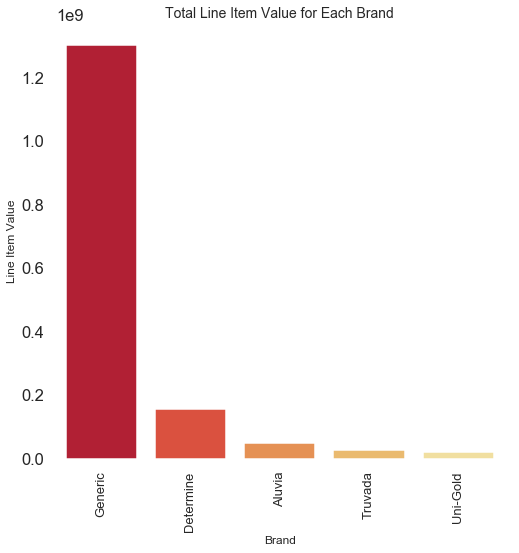

In [132]:
#salesdata.drop('CC Exp Date.1', axis =1, inplace = True)
#condition= scm['Brand' == 'Generic]
#df.where(cond=condition,inplace=False)

#scm_df.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')


fig=plt.figure(figsize=(8,8))
sns.set_style("white")
plt.xticks(fontsize=13)
plt.title('Total Line Item Value for Each Brand',fontdict={'fontsize':14})

sns.barplot(y='Line Item Value', x='Brand', data=scm_df[['Brand', 'Line Item Value']].groupby('Brand').agg(sum)
            .sort_values(by='Line Item Value', ascending= False).head(5).reset_index(),palette='YlOrRd_r')


plt.ylabel('Line Item Value',fontdict={'fontsize':12})
plt.xlabel('Brand',fontdict={'fontsize':12})
plt.xticks(rotation=90)
sns.despine(bottom = True, left = True);

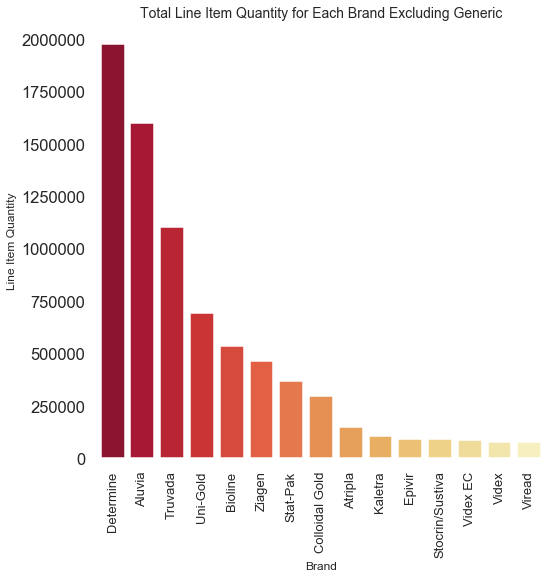

In [133]:
tempscm_df = scm_df[scm_df['Brand'] != 'Generic']
tempscm_df 

fig=plt.figure(figsize=(8,8))
sns.set_style("white")
plt.xticks(fontsize=13)
plt.title('Total Line Item Quantity for Each Brand Excluding Generic',fontdict={'fontsize':14})

sns.barplot(y='Line Item Quantity', x='Brand', data=tempscm_df[['Brand', 'Line Item Quantity']].groupby('Brand')
            .agg(sum).sort_values(by='Line Item Quantity', ascending= False).head(15).reset_index(),palette='YlOrRd_r')

plt.ylabel('Line Item Quantity',fontdict={'fontsize':12})
plt.xlabel('Brand',fontdict={'fontsize':12})
plt.xticks(rotation=90)
sns.despine(bottom = True, left = True);

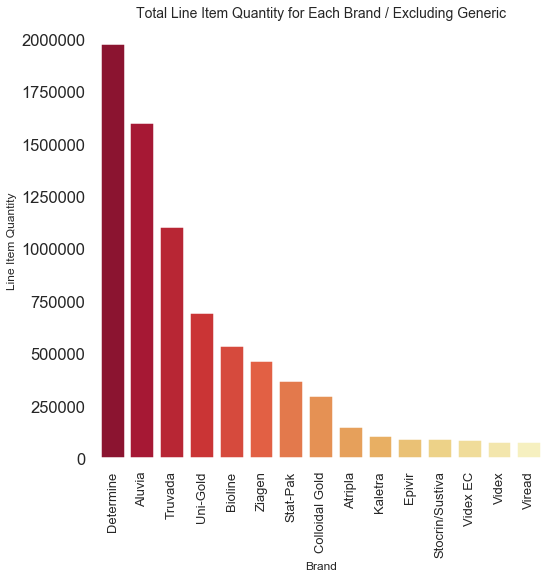

In [134]:
tempscm_df = scm_df[scm_df['Brand'] != 'Generic']
tempscm_df 

fig=plt.figure(figsize=(8,8))
sns.set_style("white")
plt.xticks(fontsize=13)
plt.title('Total Line Item Quantity for Each Brand / Excluding Generic',fontdict={'fontsize':14})

sns.barplot(y='Line Item Quantity', x='Brand', data=tempscm_df[['Brand', 'Line Item Quantity']].groupby('Brand')
            .agg(sum).sort_values(by='Line Item Quantity', ascending= False).head(15).reset_index(),palette='YlOrRd_r')

plt.ylabel('Line Item Quantity',fontdict={'fontsize':12})
plt.xlabel('Brand',fontdict={'fontsize':12})
plt.xticks(rotation=90)
sns.despine(bottom = True, left = True);


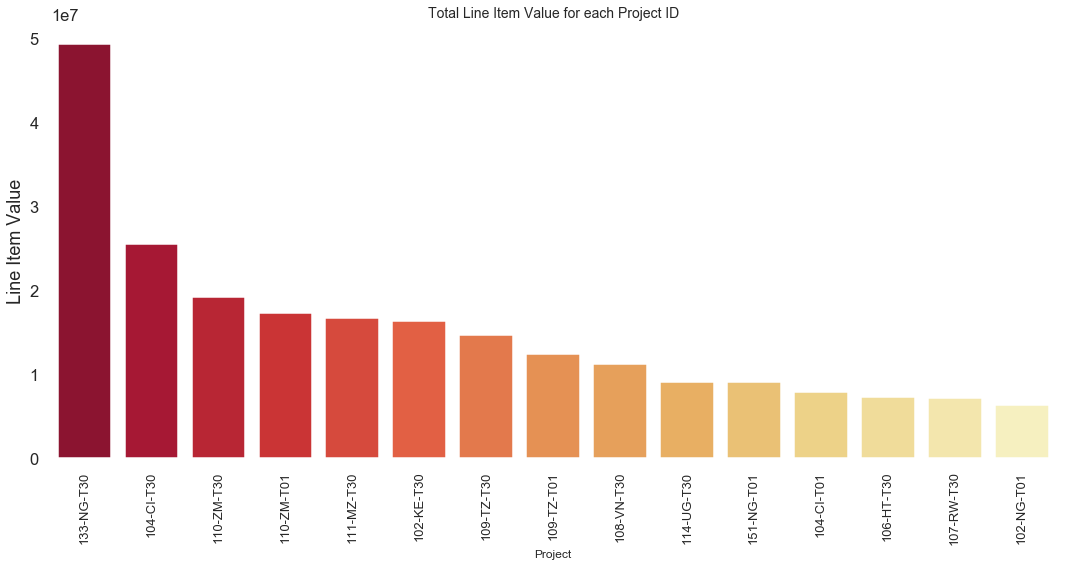

In [135]:
tempscm_df = scm_df[scm_df['Brand'] != 'Generic']
tempscm_df 


fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Line Item Value for each Project ID',fontdict={'fontsize':14})
sns.barplot(y='Line Item Value', x='Project Code', data=tempscm_df.groupby('Project Code')['Line Item Value'].sum()
            .sort_values(ascending=False).head(15).reset_index(),palette='YlOrRd_r')
#,order=list(PartBsample.groupby('FoodItemCode').NumberOfOrders.sum().sort_values(ascending=False)
#.reset_index()
#[FoodItemCoLine Item Value',fontdict={'fontsize':12})
plt.xlabel('Project',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

In [136]:
#Top 10 Countries Having Projects
scm_df = scm_df.dropna()
scm_df 

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
0         62   102-NG-T01  Pre-PQ Process     SCMS-230    ASN-144   
1         68   113-ZW-T01  Pre-PQ Process     SCMS-308    ASN-285   
2         69   102-NG-T01  Pre-PQ Process     SCMS-354    ASN-608   
3        262   116-ZA-T01  Pre-PQ Process   SCMS-14050   ASN-1251   
4        305   123-NG-T01  Pre-PQ Process   SCMS-15550   ASN-1269   
5        343   116-ZA-T01  Pre-PQ Process   SCMS-16600   ASN-1520   
6        361   125-HT-T01  Pre-PQ Process   SCMS-14080   ASN-1318   
7        398   102-GY-T01  Pre-PQ Process   SCMS-18480   ASN-1502   
8        400   117-ET-T01  Pre-PQ Process   SCMS-18430   ASN-1465   
9        422   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
10       423   116-ZA-T01  Pre-PQ Process   SCMS-19800   ASN-1665   
11       459   116-ZA-T01  Pre-PQ Process   SCMS-21460   ASN-1667   
12       465   102-NG-T01  Pre-PQ Process   SCMS-21540   ASN-2011   
13       466   117-ET-T01  Pre-PQ Process   SCMS-21550   ASN-1741   
14       531   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2783   
15       532   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
16       533   116-ZA-T01  Pre-PQ Process   SCMS-23500   ASN-2293   
17       598   116-ZA-T01  Pre-PQ Process   SCMS-25540   ASN-2295   
18       646   116-ZA-T01  Pre-PQ Process   SCMS-26820   ASN-2488   
19       712   119-NA-T01  Pre-PQ Process   SCMS-28840   ASN-2450   
20       772   131-NG-T01  Pre-PQ Process   SCMS-30502   ASN-3653   
21       835   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
22       836   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3892   
23       837   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
24       838   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
25       839   116-ZA-T01  Pre-PQ Process   SCMS-33320   ASN-3553   
26       849   102-GY-T01  Pre-PQ Process   SCMS-33930   ASN-3209   
27      1063   116-ZA-T01  Pre-PQ Process   SCMS-40810   ASN-3634   
28      1065   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
29      1066   116-ZA-T01  Pre-PQ Process   SCMS-41040   ASN-3623   
...      ...          ...             ...          ...        ...   
10294  84539   151-NG-T30        FPQ-4537     SO-35041    DN-1701   
10295  84705   101-CD-T30        FPQ-8840     SO-41384    DN-2525   
10296  84707   101-CD-T30        FPQ-8840     SO-41386    DN-2527   
10297  84931   151-NG-T30       FPQ-13293     SO-47300    DN-3720   
10298  86236   154-NG-T30        FPQ-3815     SO-32271    DN-1312   
10299  86284   151-NG-T30        FPQ-4537     SO-35120    DN-1741   
10300    796   102-BW-T01  Pre-PQ Process   SCMS-31370   ASN-2796   
10301   5551   100-HT-T01  Pre-PQ Process   SCMS-15480   ASN-1403   
10302  10576   104-CI-T01  Pre-PQ Process       SO-781     DN-245   
10303  10744   112-NG-T01  Pre-PQ Process     SO-12790     DN-916   
10304  11077   151-NG-T30  Pre-PQ Process     SO-35150    DN-1594   
10305  11079   151-NG-T30  Pre-PQ Process     SO-35330    DN-1615   
10306  11282   112-NG-T01  Pre-PQ Process     SO-19430    DN-1063   
10307  12543   114-UG-T01  Pre-PQ Process     SO-17911    DN-1094   
10308  13020   122-HT-T30        FPQ-8671  SCMS-131040  ASN-13448   
10309  23718   144-BW-T30        FPQ-4487   SCMS-57522   ASN-6033   
10310  24063   109-TZ-T30       FPQ-11881  SCMS-182810  ASN-19486   
10311  37251   102-SD-T30        FPQ-6991  SCMS-100301  ASN-10451   
10312  38827   102-GY-T30        FPQ-5497   SCMS-71640   ASN-6866   
10313  55053   105-GY-T30       FPQ-12057  SCMS-189040  ASN-19842   
10314  55520   117-ET-T30        FPQ-9096  SCMS-133390  ASN-13875   
10315  61882   161-ZA-T30        FPQ-5303   SCMS-68950   ASN-7130   
10316  63296   144-BW-T30        FPQ-4487   SCMS-57521   ASN-8573   
10317  82447   101-CD-T30        FPQ-8840     SO-41382    DN-2530   
10318  82850   110-ZM-T30        FPQ-4029     SO-34620    DN-1566   
10319  84142   101-CD-T30        FPQ-8840     SO-41383    DN-2524   
10320  8

In [137]:
ItemCount = scm_df["Country"].value_counts().head(20)
ItemCount
#print(sum(ItemCount))

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Rwanda            430
Congo, DRC        333
Guyana            237
Ethiopia          216
South Sudan       164
Kenya             111
Burundi            98
Namibia            95
Cameroon           75
Botswana           70
Name: Country, dtype: int64

Now, to delete added columns

# Insights Drawn From the Above 

There are 142 projects carried out in 43 countries in the period

There are 6233 Purchase Orders handled in this data.

South Africa, Nigeria and Côte d'Ivoire are the top three countries to those the supplies were shipped

In terms of Line Item Value, the highest ranked countries included Nigeria, Zambia, Mozambique, Tanzania and Côte d'Ivoire

There were 683 shipments sent to Zambia which is 

Bulk of the supplies were sent by air worth 6113 dollars, followed by road transport 2830 dollars and 371 dollars by sea

Analysis of Sub-Classification of Product Groups shows that 65% of the products shipped were belonged to Adult group, 19% Pediatric, while 15% were from the HIV test group 

All of the top 5 manufacturing sites are based in India

Around 25000 Line Items were shipped From RDC and around 11000 Line Items were shipped via Direct Drop
Total number of 430 shipments sent to Rwanda with the highest Line Item Value of $ 2,826,230.40.

“SCMS from RDC” ranks as the top vendor with 5404 shipments followed by Orgenics, Ltd. with 754 shipments and S. BUYS WHOLESALER with 715 shipments.     


98 Shipments in the year 2010 to Haiti

There are 1955 shipments with "Pediatric" Sub-Classification


216 Shipments To Ethiopia


Total 7053 Shipments with   'Line Item Insurance (USD)' > 10

Total 6113 Shipments Made By Air


